In [33]:
from collections import Counter
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import os
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LogisticRegressionCV, LassoCV, MultiTaskLassoCV, ElasticNetCV, MultiTaskElasticNetCV
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')



def set_fig_size(width=18,height=10):
    fig,ax=plt.subplots(1,1)
    fig.set_size_inches(width,height)
    

def set_font_size(size=18):
    font = {'family' : 'verdana',
            'size'   : size}
    rc('font', **font)
    
def make_big(f=18,w=18,h=10):
    set_font_size(size=f)
    set_fig_size(width=w,height=h)

The attachment contains:
1. Data dictionary 

2. Training dataset for model building 

3. Testing dataset for submission 

## Problem statement: 

Given is the hourly rental data of an e-scooter rental company. The goal is to predict the total number of e-scooters rented per hour. We recommend using Python for this assignment and are free to use any packages and IDE.  Submissions are evaluated based on how the candidate is able to explore the data using charts, correlation matrix, etc.; and prediction using various modeling methods, the Root Mean Squared Logarithmic Error (RMSLE) as potential evaluation metrics.  

 

## Some guidance: 

Pls submit your analysis/code in Python Notebook, you can show the following results:

1. data pre-processing, feature generation

2. data exploration analysis and visualization

3. modeling - algorithms choices and optimization 

4. final model performance analysis, feature importance 

5. Based on the parameters provided in the testing data, you can use the trained model above (or retrain the model with different set of variables) to predict counts, and add the "count" column in the testing data and submit it.

## Data Description

datetime - hourly date + timestamp 
 
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [7]:
df = pd.read_csv('training_data.csv').drop(columns=['Unnamed: 0'])
df.describe().T



count        mean         std   min      25%      50%  \
season      8708.0    2.514929    1.117485  1.00   2.0000    3.000   
holiday     8708.0    0.029054    0.167967  0.00   0.0000    0.000   
workingday  8708.0    0.684543    0.464724  0.00   0.0000    1.000   
weather     8708.0    1.419040    0.635637  1.00   1.0000    1.000   
temp        8708.0   20.232568    7.768970  0.82  13.9400   20.500   
atemp       8708.0   23.651105    8.458119  0.76  16.6650   24.240   
humidity    8708.0   61.781350   19.313038  0.00  46.0000   62.000   
windspeed   8708.0   12.848379    8.157084  0.00   7.0015   12.998   
casual      8708.0   35.962563   50.103873  0.00   4.0000   16.000   
registered  8708.0  155.166973  150.397856  0.00  36.0000  118.000   
count       8708.0  191.129536  180.674085  1.00  42.0000  145.000   

                   75%       max  
season        4.000000    4.0000  
holiday       0.000000    1.0000  
workingday    1.000000    1.0000  
weather       2.000000    4.0000  
temp         26.240000   41.0000  
atemp        31.060000   45.4550  
humidity     77.000000  100.0000  
windspeed    17.498725   56.9969  
casual       49.000000  367.0000  
registered  222.000000  886.0000  
count       283.000000  977.0000

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.023694   -0.006080  0.015364  0.253267  0.260547   
holiday     0.023694  1.000000   -0.254820 -0.010776  0.002996 -0.002293   
workingday -0.006080 -0.254820    1.000000  0.040086  0.029400  0.024527   
weather     0.015364 -0.010776    0.040086  1.000000 -0.052387 -0.052974   
temp        0.253267  0.002996    0.029400 -0.052387  1.000000  0.985248   
atemp       0.260547 -0.002293    0.024527 -0.052974  0.985248  1.000000   
humidity    0.198741  0.001392   -0.003860  0.412188 -0.062023 -0.041475   
windspeed  -0.156544  0.003474    0.007291  0.008978 -0.026653 -0.065143   
casual      0.092786  0.049245   -0.324122 -0.139385  0.470176  0.465651   
registered  0.160494 -0.022615    0.113787 -0.109506  0.323658  0.318756   
count       0.159331 -0.005169    0.004835 -0.129810  0.399809  0.394473   

            humidity  windspeed    casual  registered     count  
season      0.198741 

<AxesSubplot:>

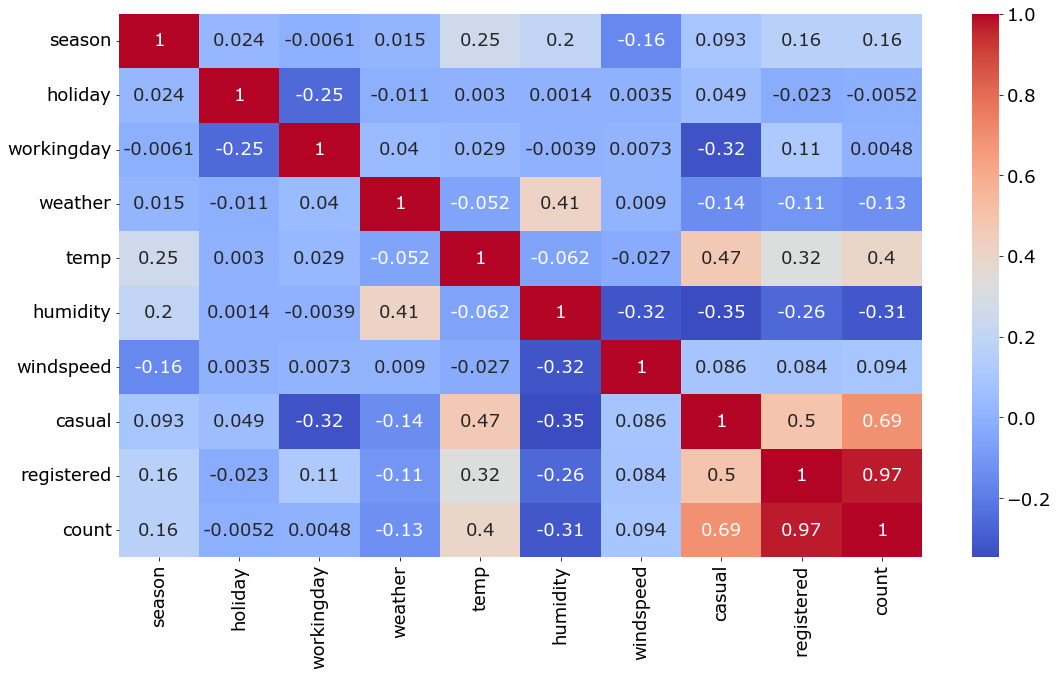

In [8]:
print(df.corr())

set_font_size(size=10)
set_font_size(size=18)

set_fig_size()
dd = df.drop(columns='atemp')

sns.heatmap(dd.corr(), annot=True, cmap='coolwarm')

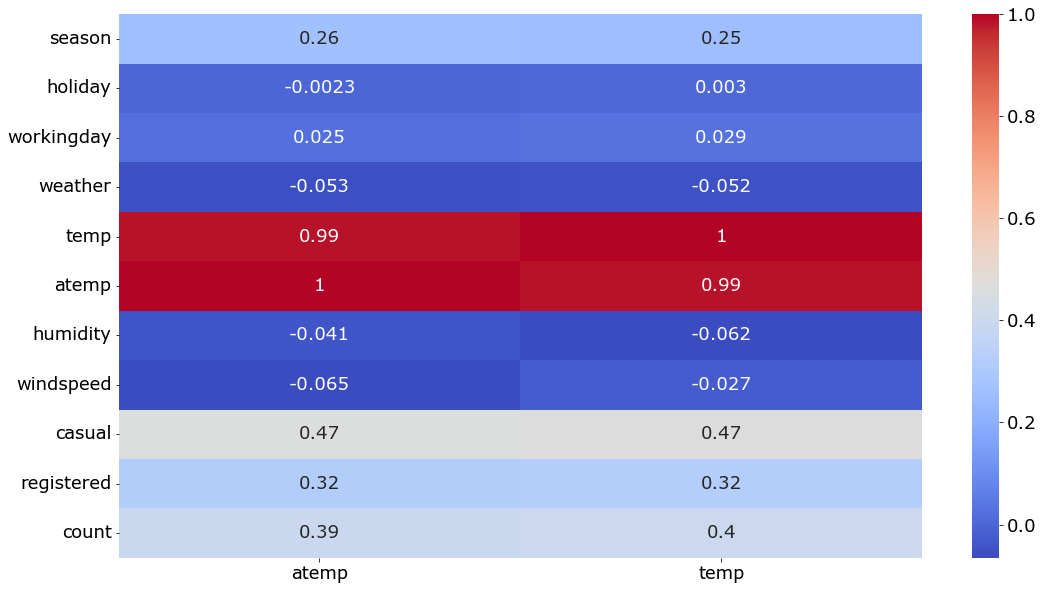

In [9]:
corr = df.corr()
set_fig_size()
set_font_size()
sns.heatmap(corr[['atemp','temp']], annot=True, cmap='coolwarm')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '0.76'),
  Text(1, 0, '1.515'),
  Text(2, 0, '2.275'),
  Text(3, 0, '3.03'),
  Text(4, 0, '3.79'),
  Text(5, 0, '4.545'),
  Text(6, 0, '5.305'),
  Text(7, 0, '6.06'),
  Text(8, 0, '6.82'),
  Text(9, 0, '7.575'),
  Text(10, 0, '8.335'),
  Text(11, 0, '9.09'),
  Text(12, 0, '9.85'),
  Text(13, 0, '10.605'),
  Text(14, 0, '11.365'),
  Text(15, 0, '12.12'),
  Text(16, 0, '12.88'),
  Text(17, 0, '13.635'),
  Text(18, 0, '14.395'),
  Text(19, 0, '15.15'),
  Text(20, 0, '15.91'),
  Text(21, 0, '16.665'),
  Text(22, 0, '17.425'),
  Text(23, 0, '18.18'),
  Text(24, 0, '18.94'),
  Text(25, 0, '19.695'),
  Text(26, 0, '20.455'),
  Text(27, 0, '21.21'),
  Text(28, 0, '21.97'),
  Text(29, 0, '22.725'),
  Text(30, 0, 

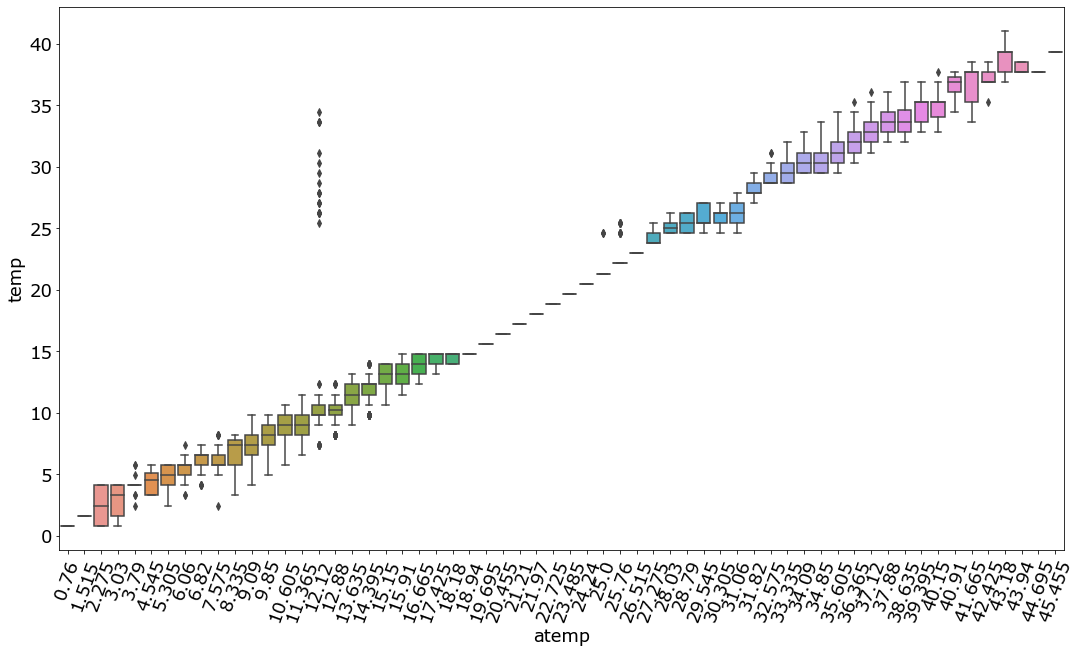

In [10]:
make_big()
sns.boxplot(x='atemp', y='temp', data=df)
plt.xticks(rotation=70)


## drop atemp

* it is virtually the same as temp

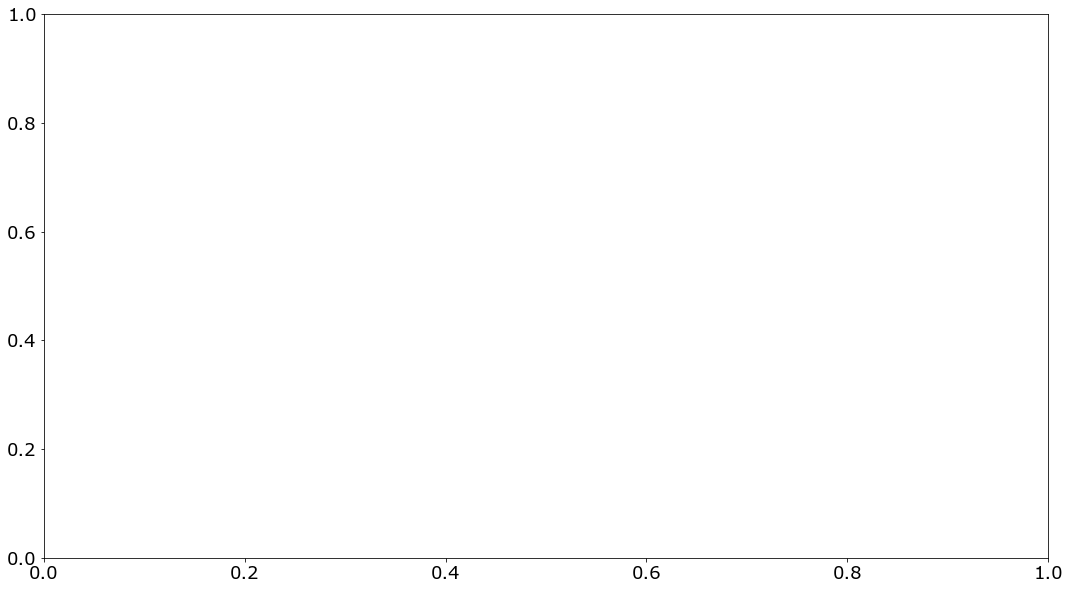

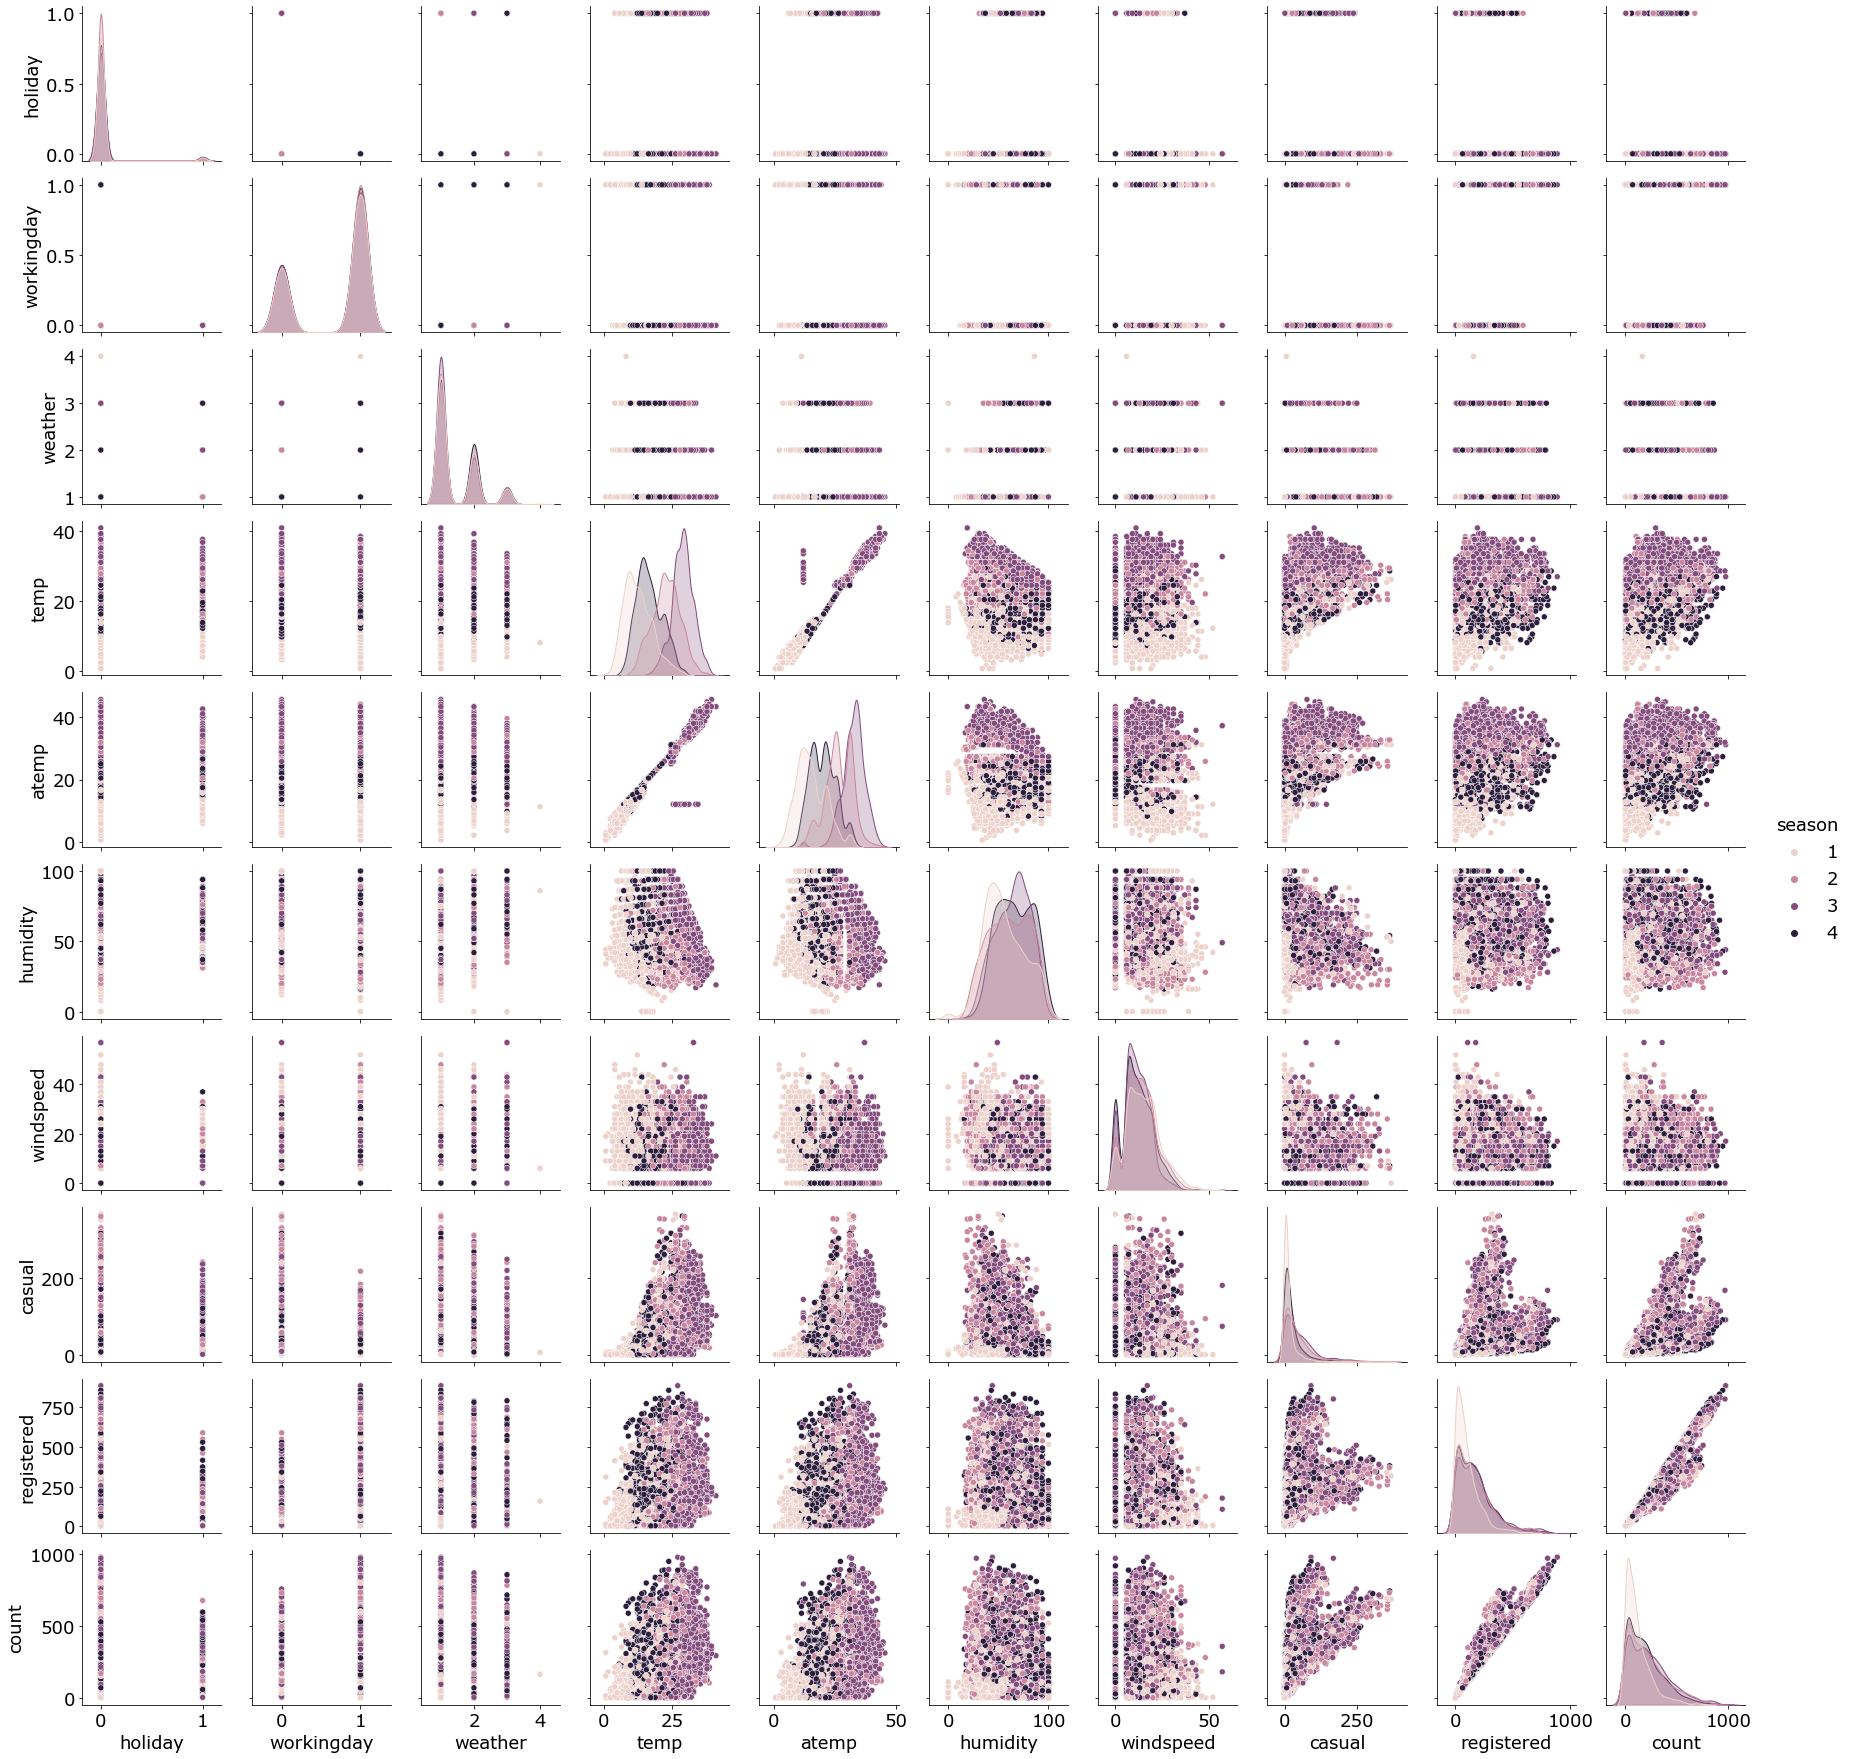

In [11]:
make_big()
sns.pairplot(df, hue='season')

## dropping atemp

Atemp has corrupted values and is otherwise highly correlted with temp.


In [12]:
df = df.sort_values(by='datetime').reset_index(drop=True)
new_cols = list(df.columns[1:])+[df.columns[0]]
dd = df[new_cols]
print(new_cols)
dd = dd.drop(columns='atemp')
dd

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'datetime']


season  holiday  workingday  weather   temp  humidity  windspeed  \
0          1        0           0        1   9.84        81     0.0000   
1          1        0           0        1   9.84        75     0.0000   
2          1        0           0        1   9.02        80     0.0000   
3          1        0           0        1   8.20        86     0.0000   
4          1        0           0        1   9.84        75     0.0000   
...      ...      ...         ...      ...    ...       ...        ...   
8703       4        0           1        1  15.58        50    23.9994   
8704       4        0           1        1  15.58        50    26.0027   
8705       4        0           1        1  14.76        57    15.0013   
8706       4        0           1        1  13.94        61    15.0013   
8707       4        0           1        1  13.94        61     6.0032   

      casual  registered  count             datetime  
0          3          13     16  2011-01-01 00:00:00  
1          0           1      1  2011-01-01 04:00:00  
2          2           0      2  2011-01-01 06:00:00  
3          1           2      3  2011-01-01 07:00:00  
4          1           7      8  2011-01-01 08:00:00  
...      ...         ...    ...                  ...  
8703      23         546    569  2012-12-19 18:00:00  
8704       7         329    336  2012-12-19 19:00:00  
8705      10         231    241  2012-12-19 20:00:00  
8706       4         164    168  2012-12-19 21:00:00  
8707      12         117    129  2012-12-19 22:00:00  

[8708 rows x 11 columns]

In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

{'y': 'casual', 'x': 'workingday', 'hue': 'hour'}


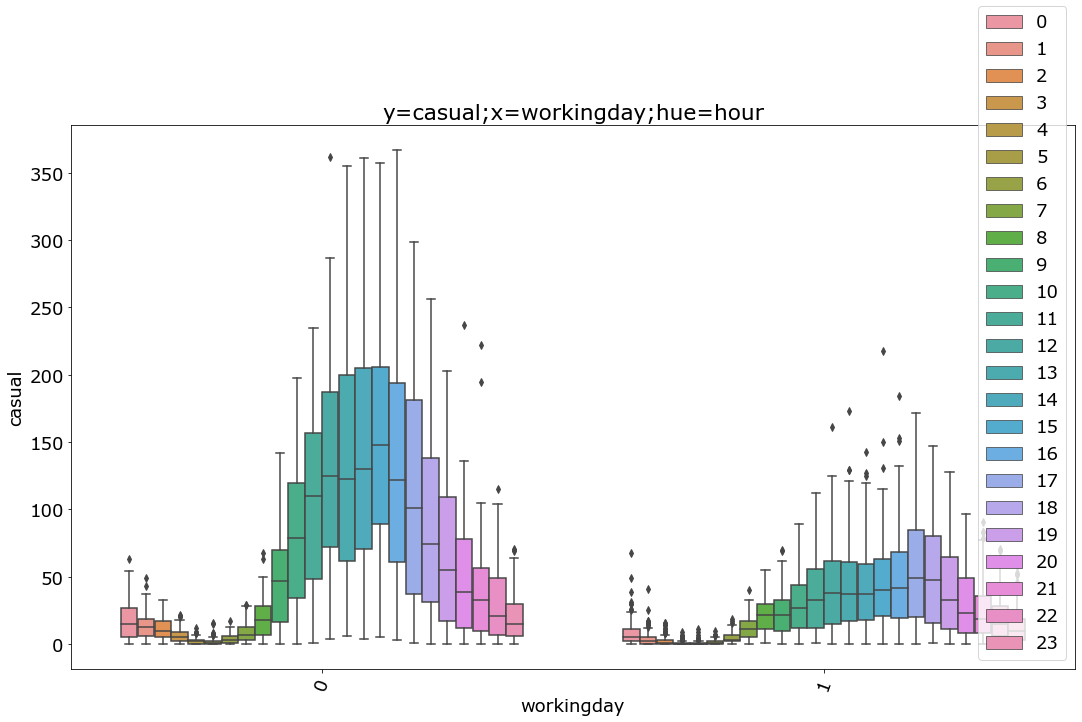

{'y': 'registered', 'x': 'workingday', 'hue': 'hour'}


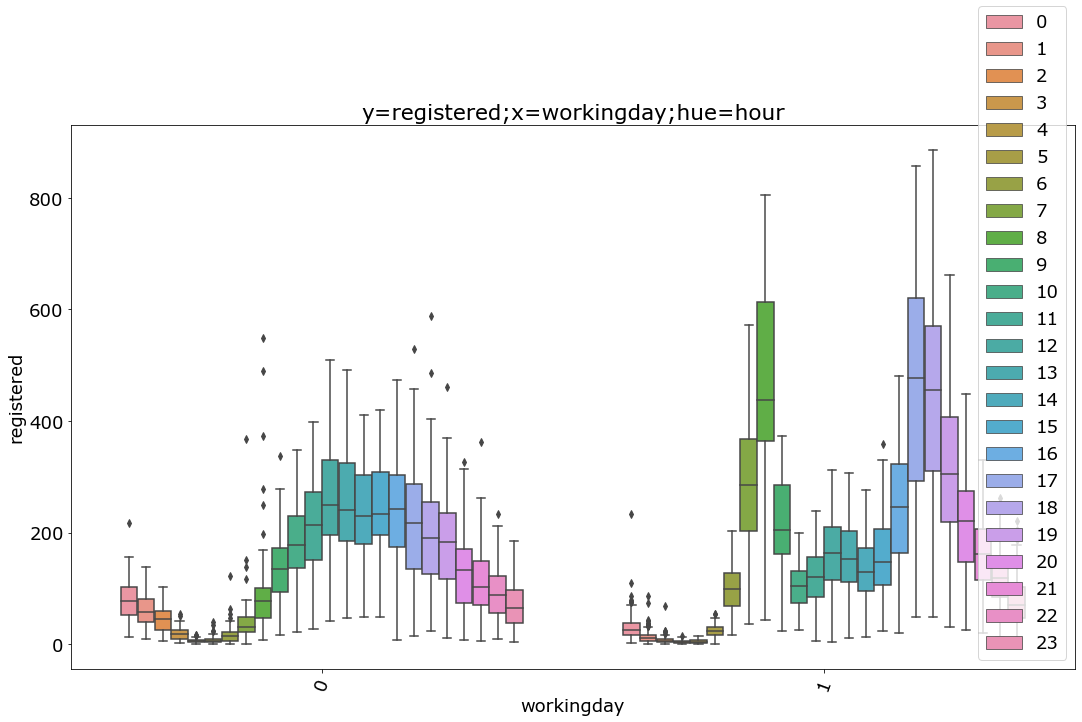

{'y': 'casual', 'x': 'weekday', 'hue': 'hour'}


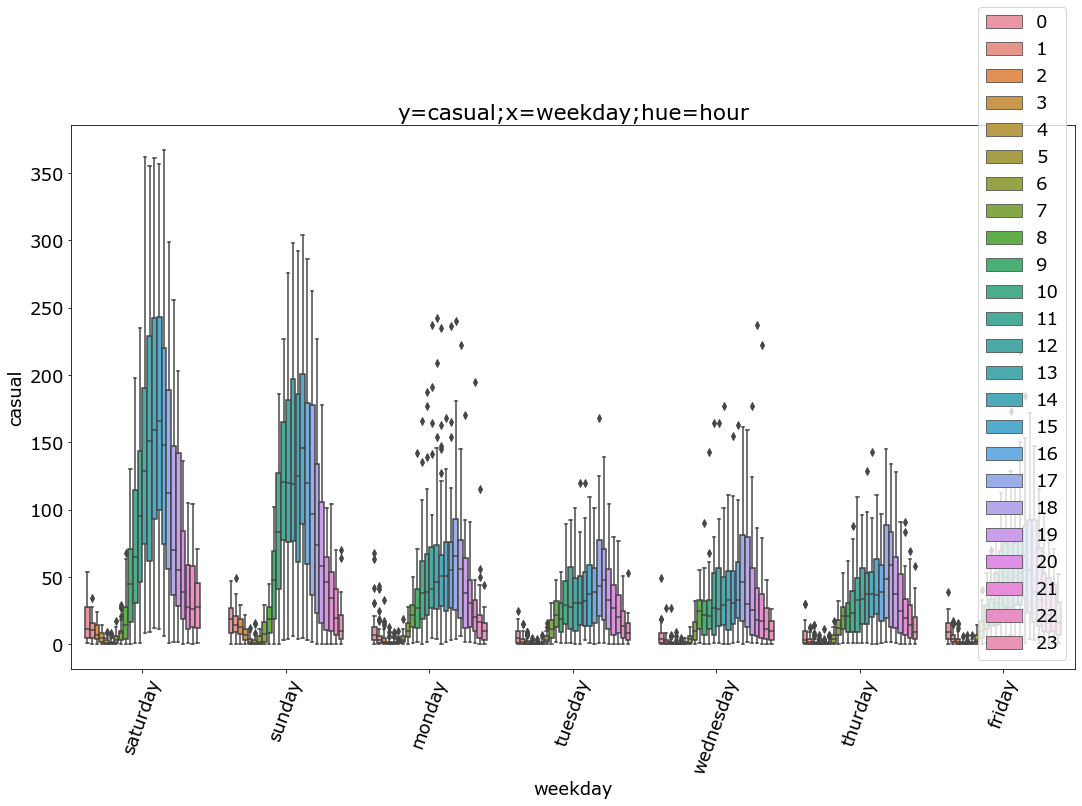

{'y': 'registered', 'x': 'weekday', 'hue': 'hour'}


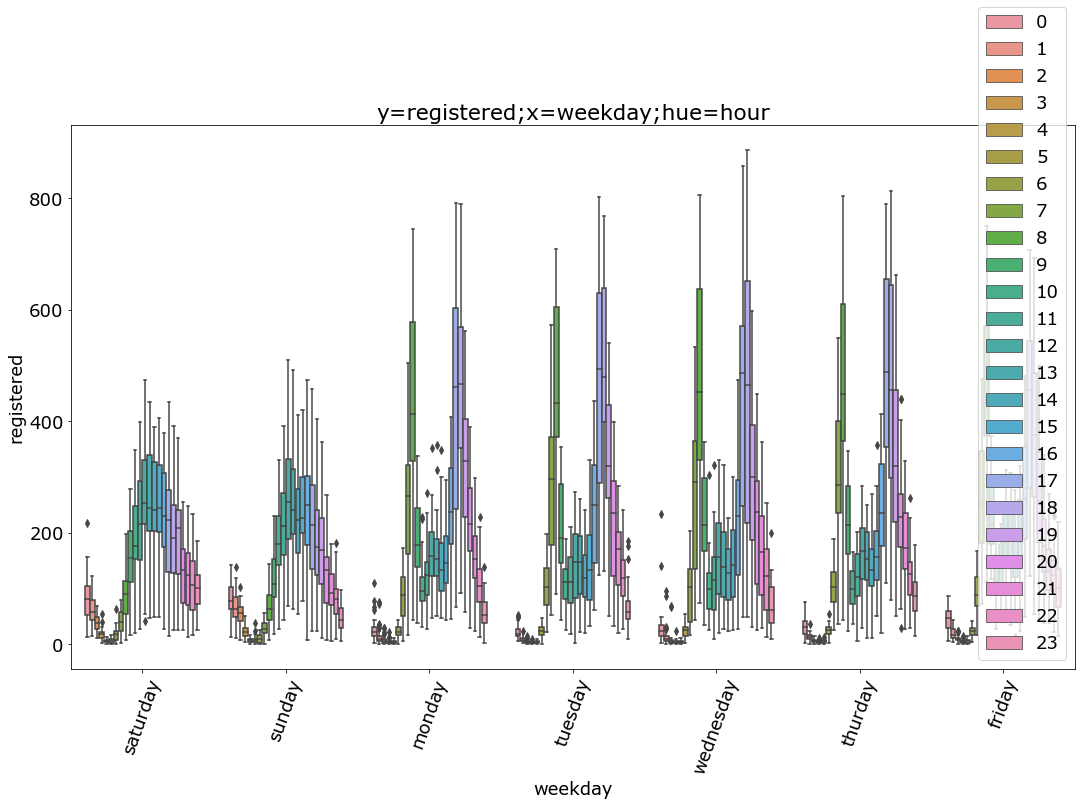

{'y': 'casual', 'x': 'temp_cat', 'hue': 'hour'}


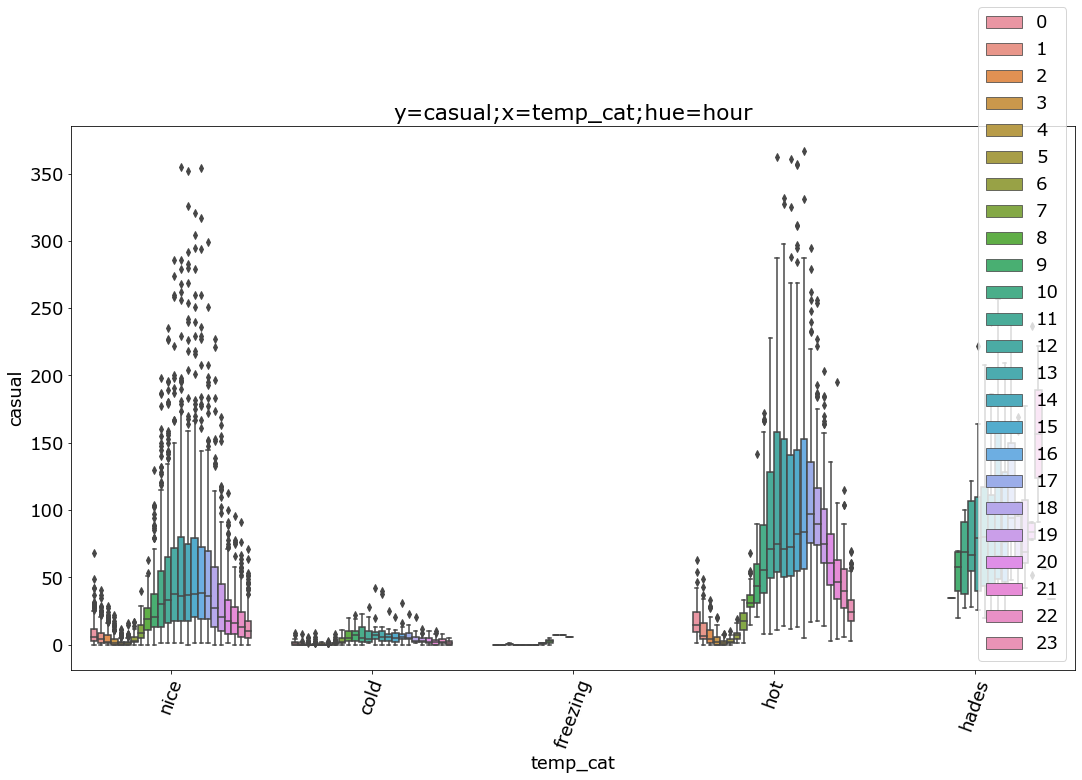

{'y': 'registered', 'x': 'temp_cat', 'hue': 'hour'}


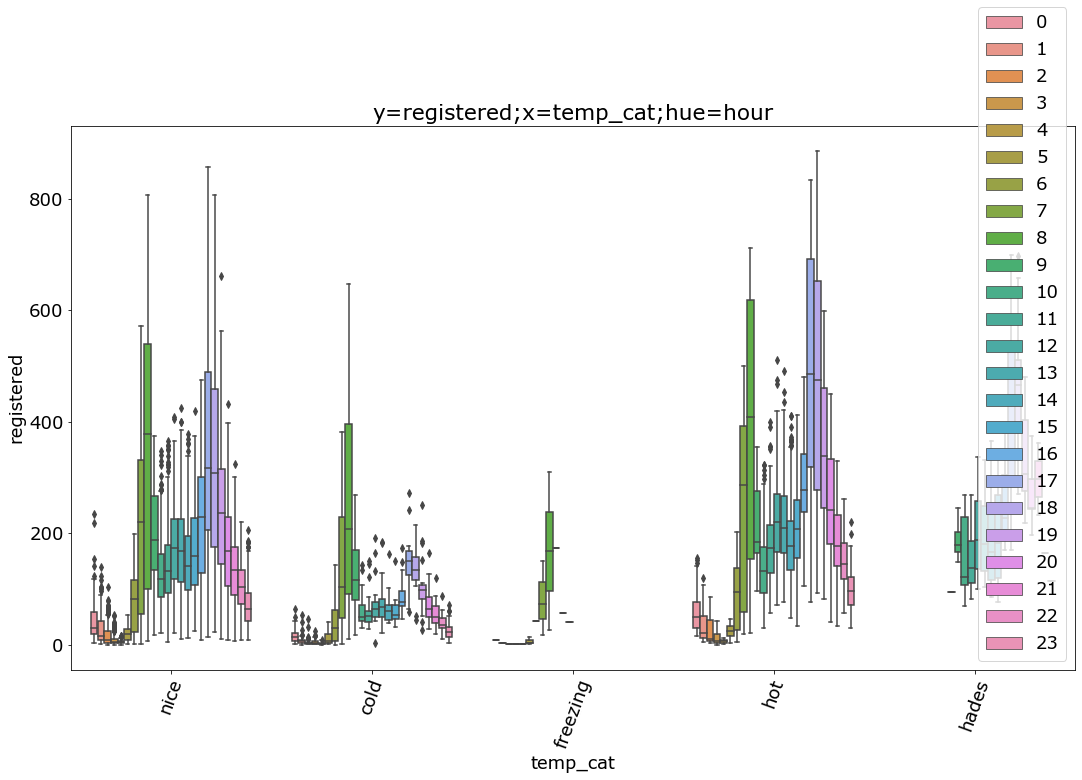

{'y': 'casual', 'x': 'temp', 'hue': 'hour'}


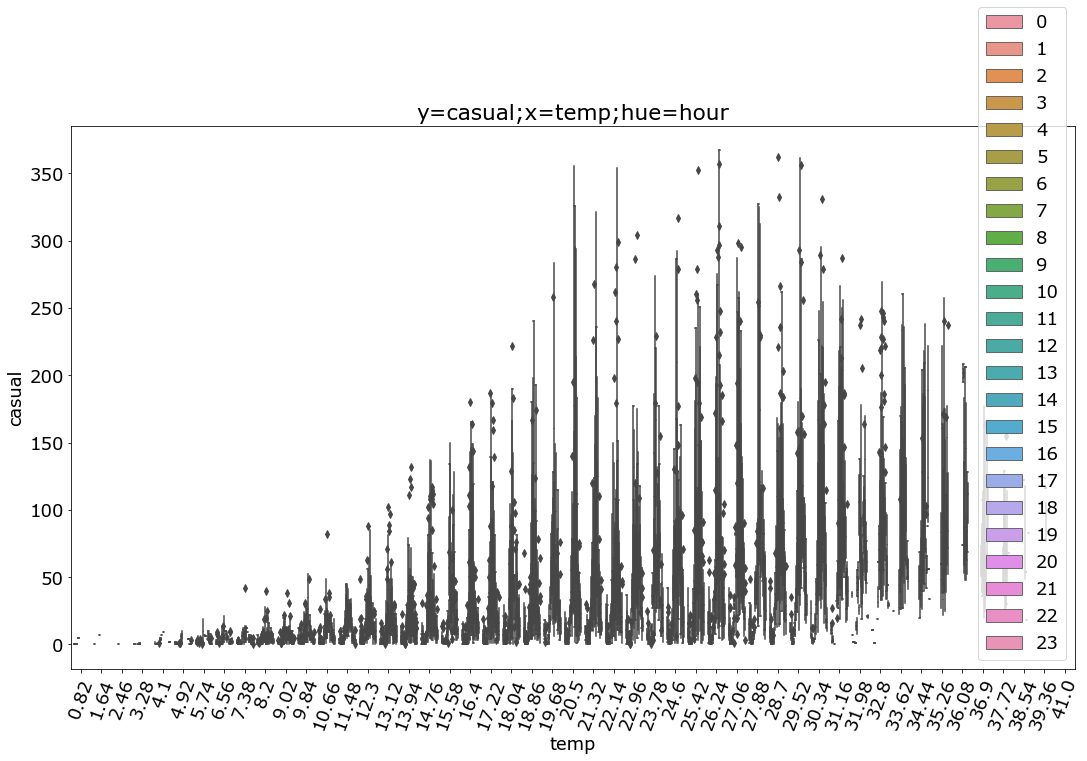

{'y': 'registered', 'x': 'temp', 'hue': 'hour'}


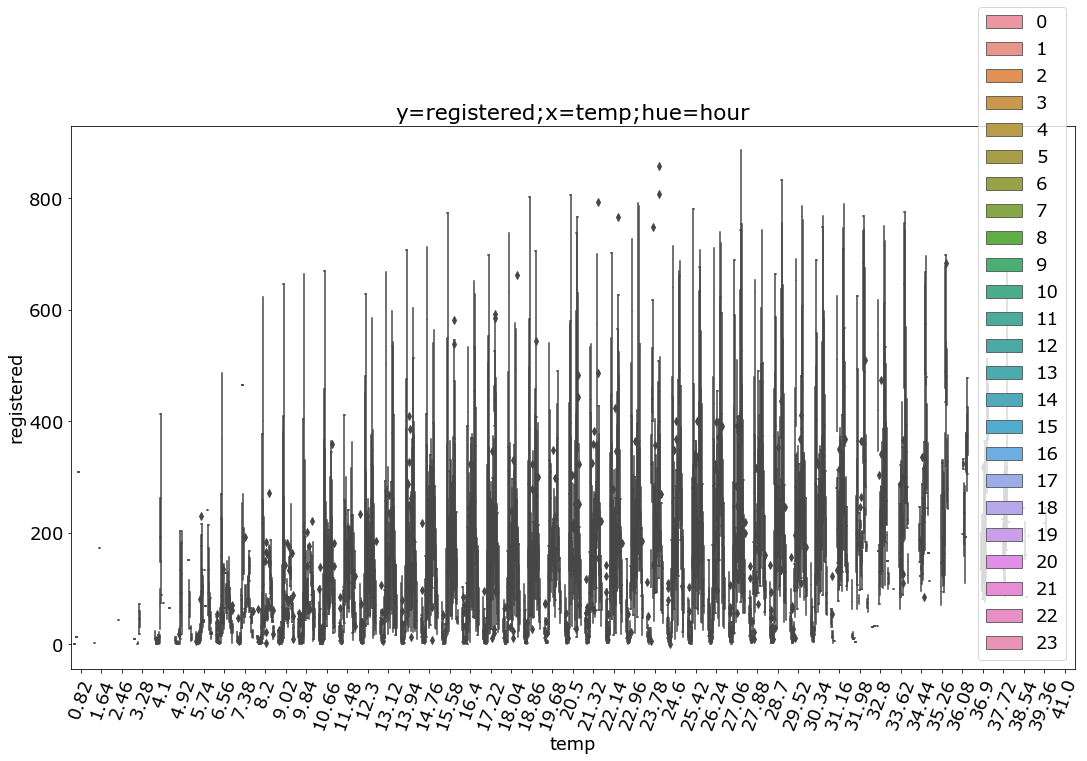

{'y': 'casual', 'x': 'holiday', 'hue': 'hour'}


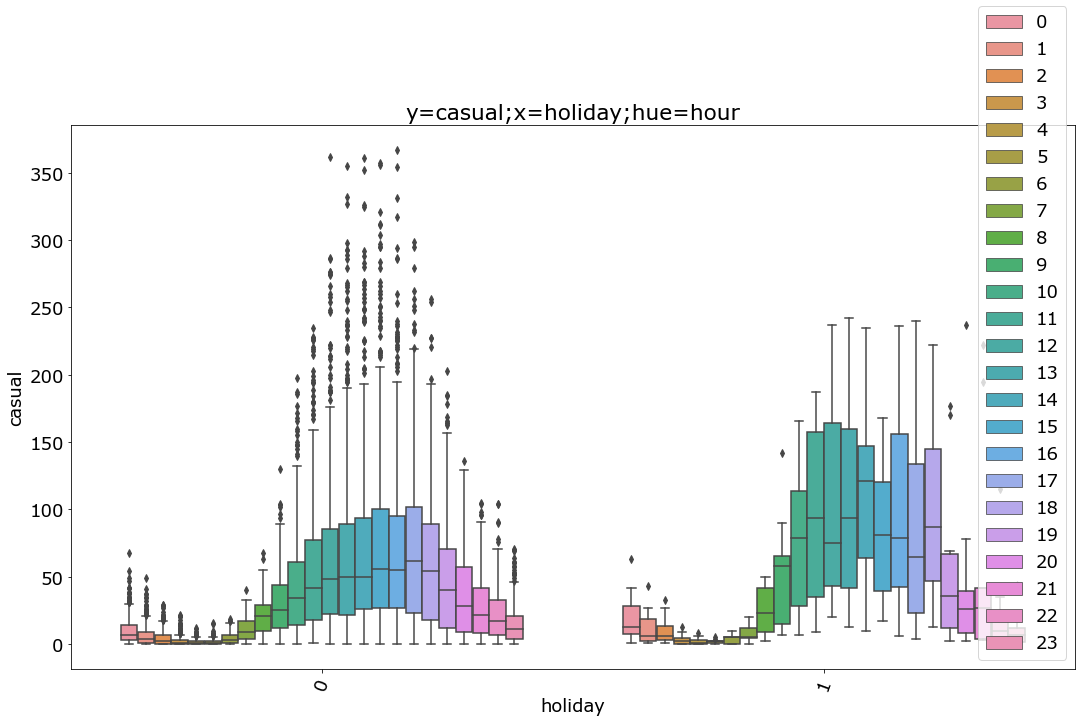

{'y': 'registered', 'x': 'holiday', 'hue': 'hour'}


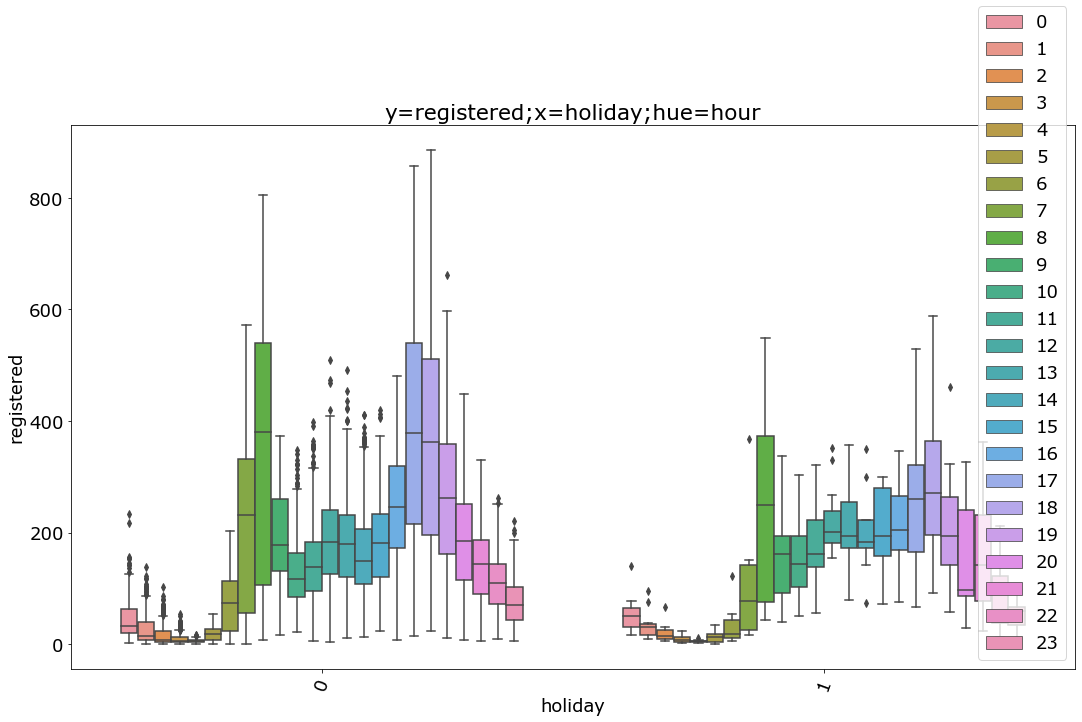

{'y': 'casual', 'x': 'temp_cat', 'hue': 'hour'}


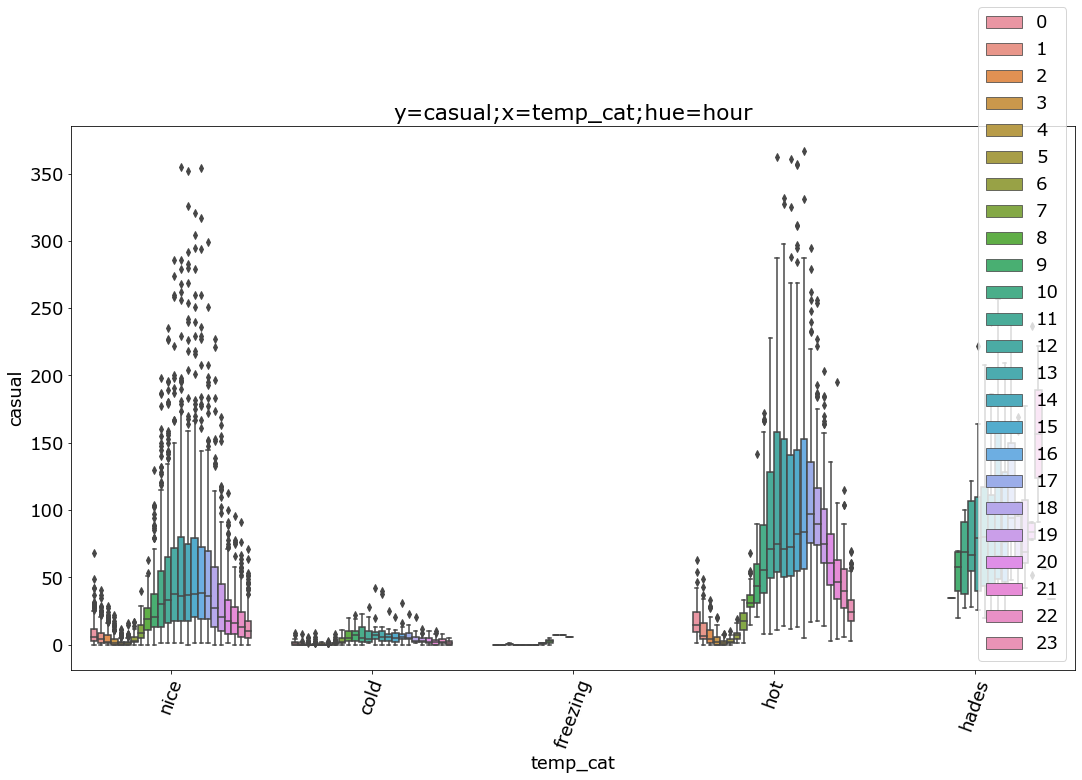

{'y': 'registered', 'x': 'temp_cat', 'hue': 'hour'}


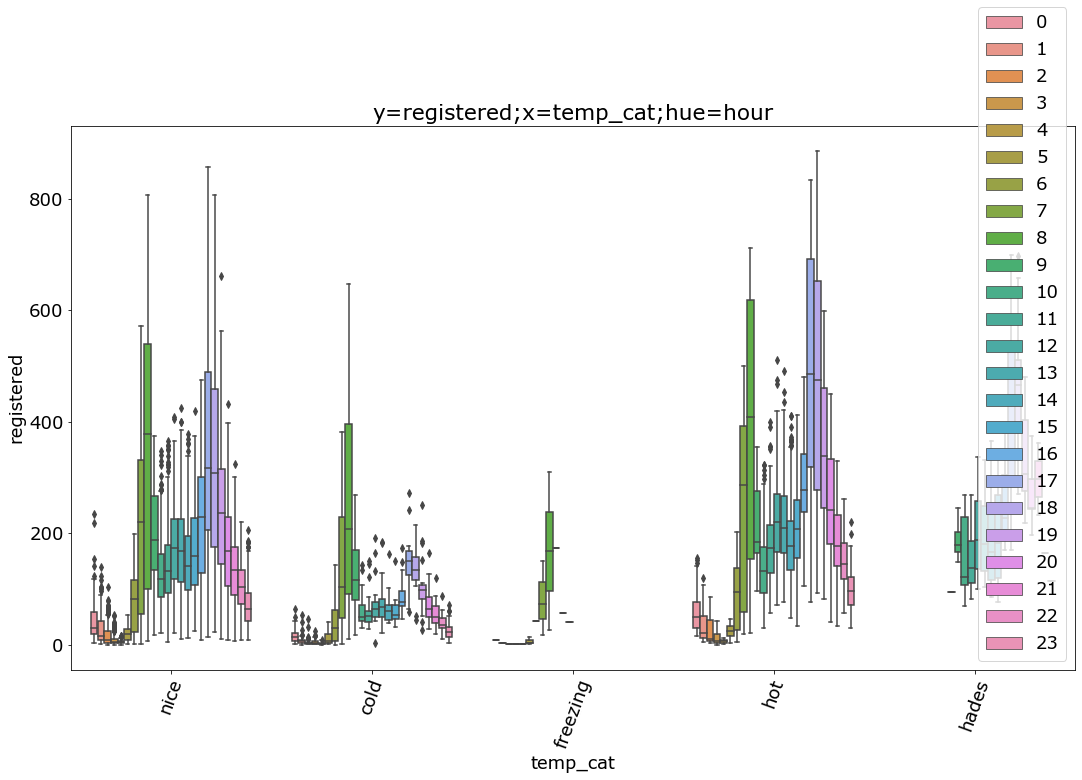

{'y': 'casual', 'x': 'workingday', 'hue': 'temp_cat'}


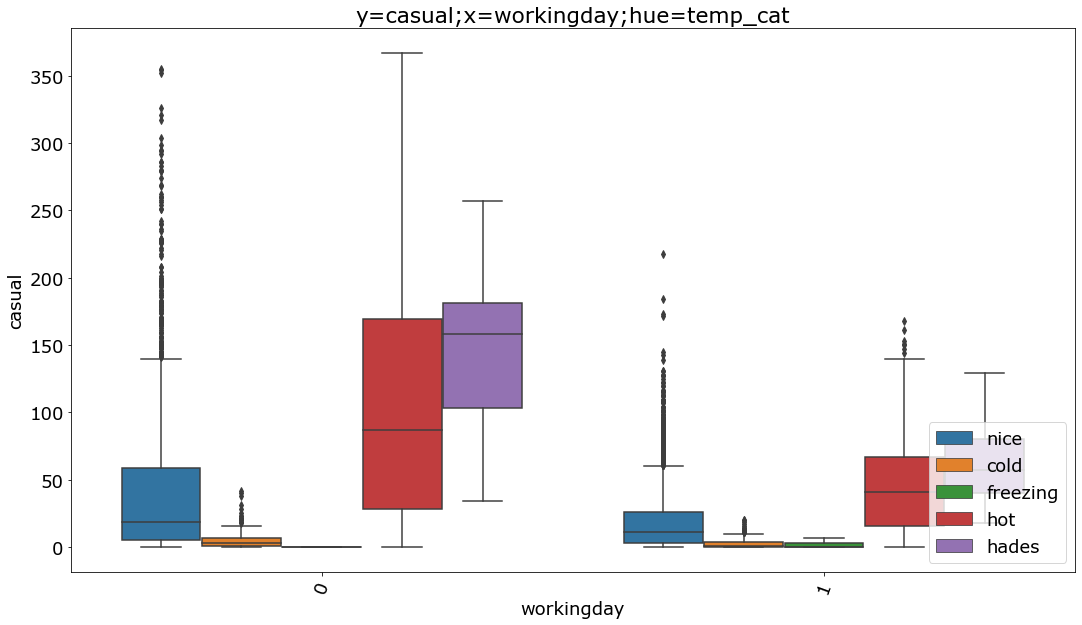

{'y': 'registered', 'x': 'workingday', 'hue': 'temp_cat'}


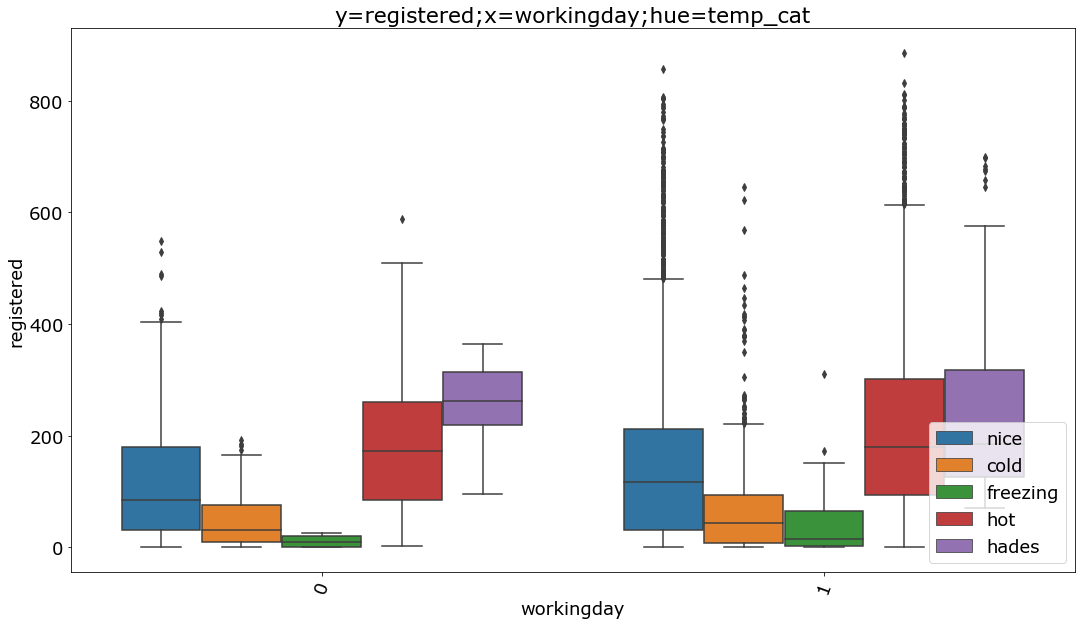

{'y': 'casual', 'x': 'weekday', 'hue': 'temp_cat'}


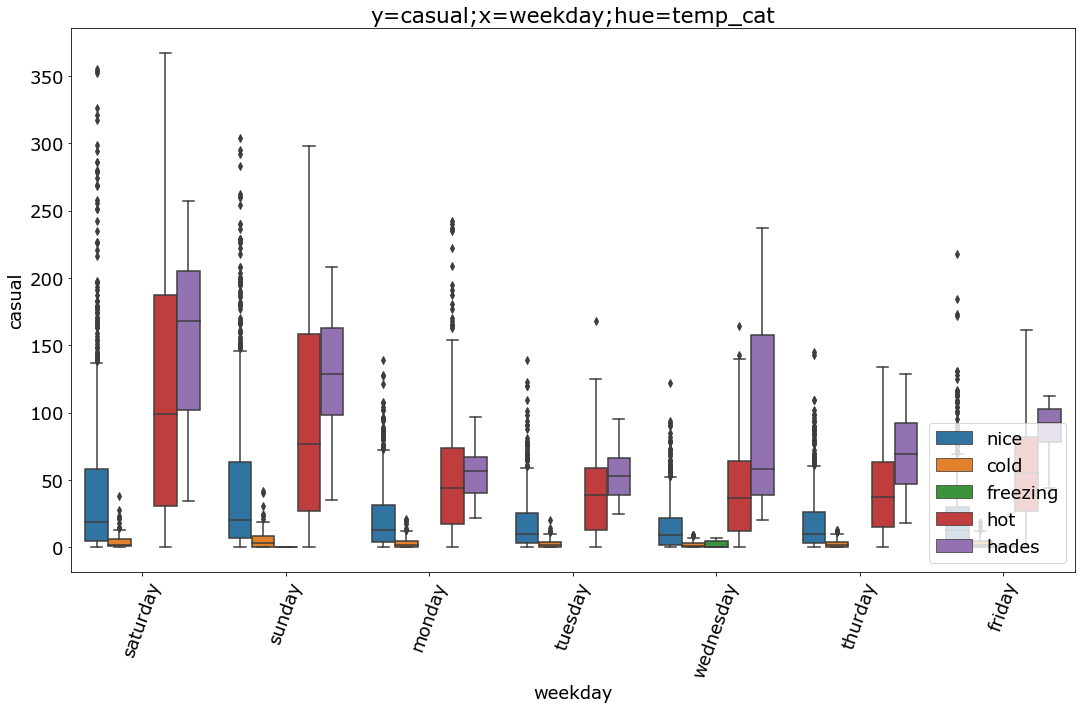

{'y': 'registered', 'x': 'weekday', 'hue': 'temp_cat'}


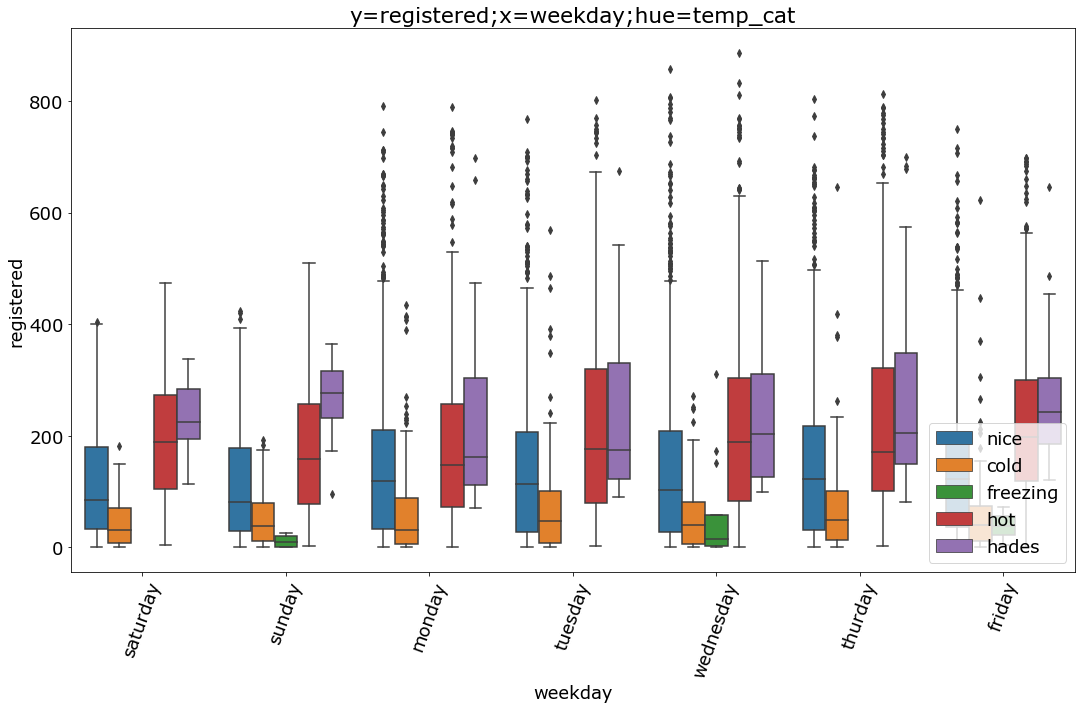

{'y': 'casual', 'x': 'temp', 'hue': 'temp_cat'}


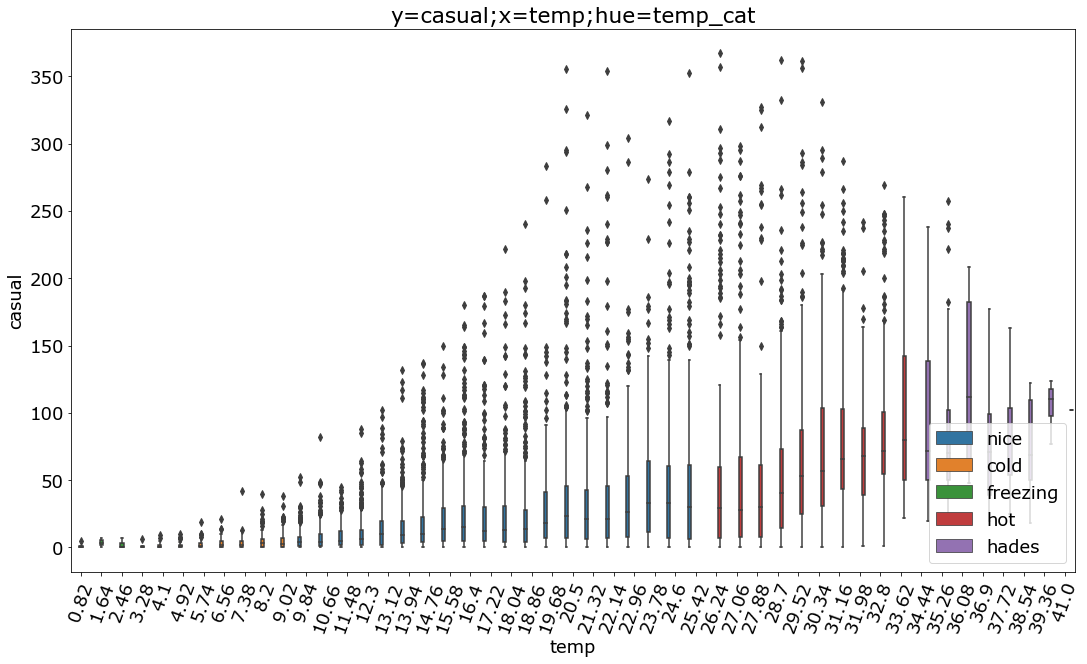

{'y': 'registered', 'x': 'temp', 'hue': 'temp_cat'}


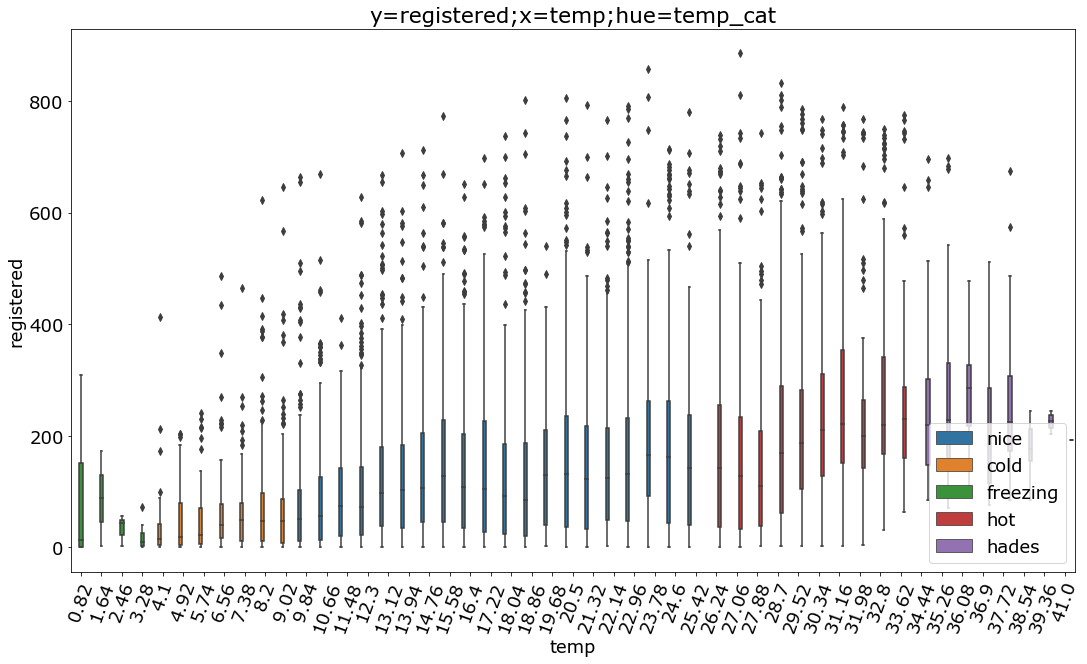

{'y': 'casual', 'x': 'holiday', 'hue': 'temp_cat'}


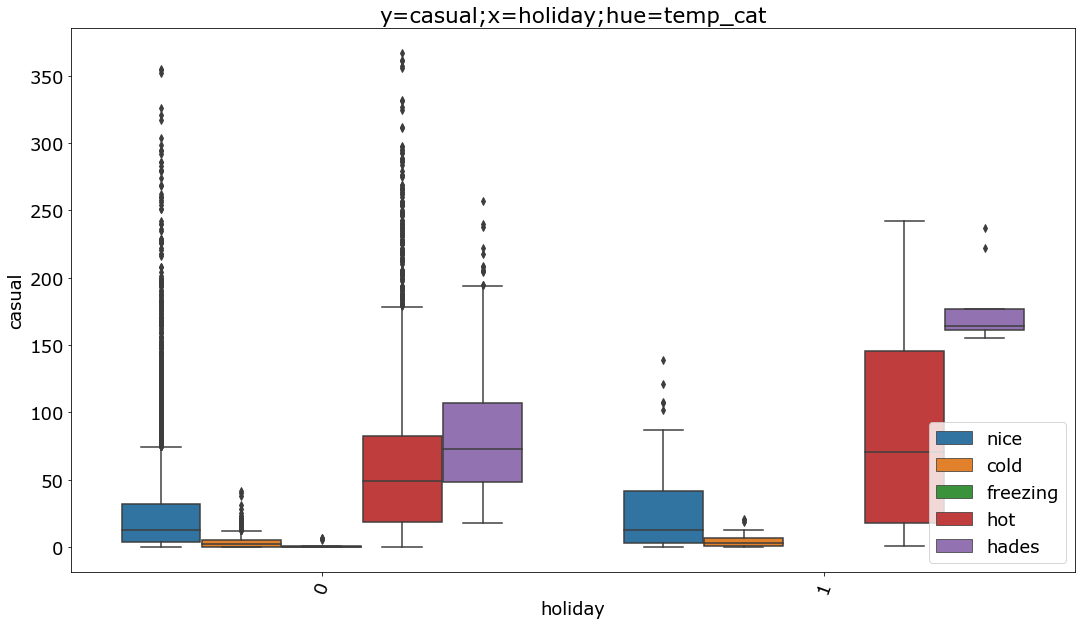

{'y': 'registered', 'x': 'holiday', 'hue': 'temp_cat'}


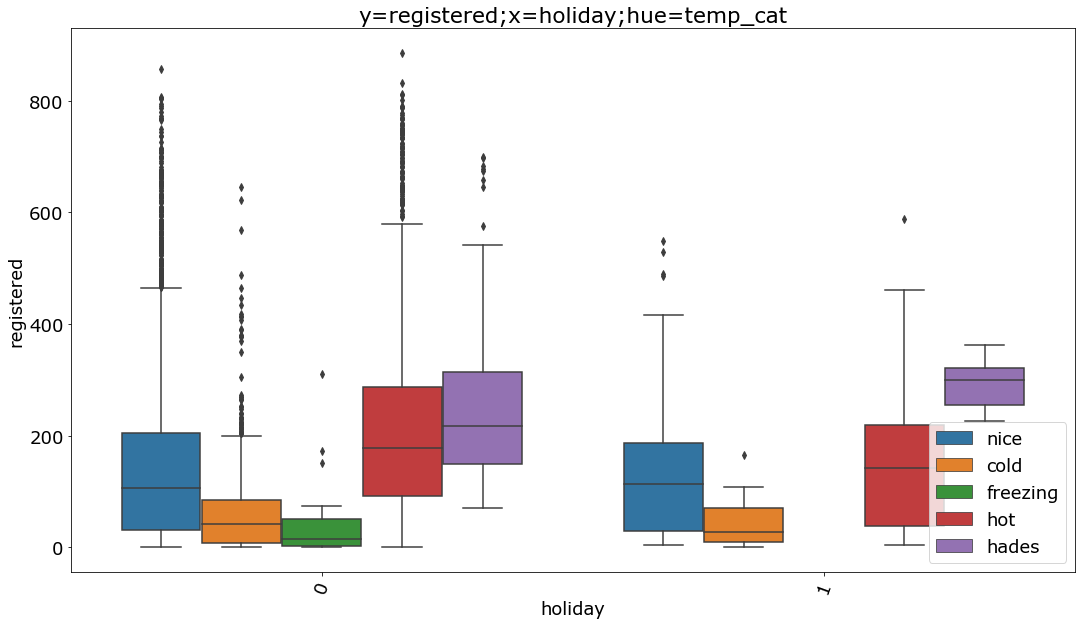

{'y': 'casual', 'x': 'workingday', 'hue': 'weekday'}


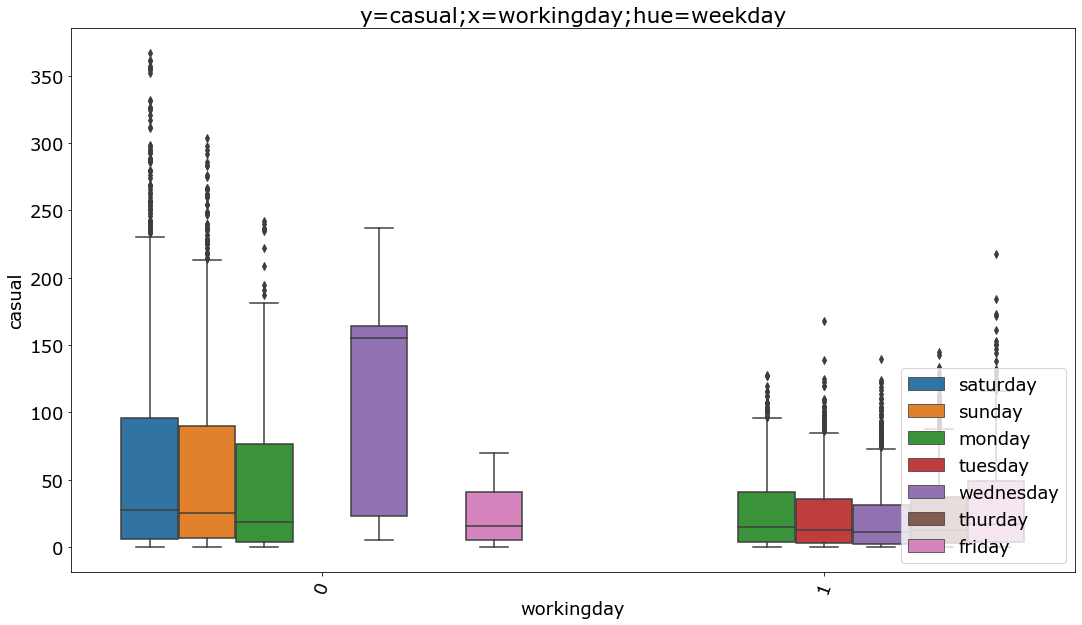

{'y': 'registered', 'x': 'workingday', 'hue': 'weekday'}


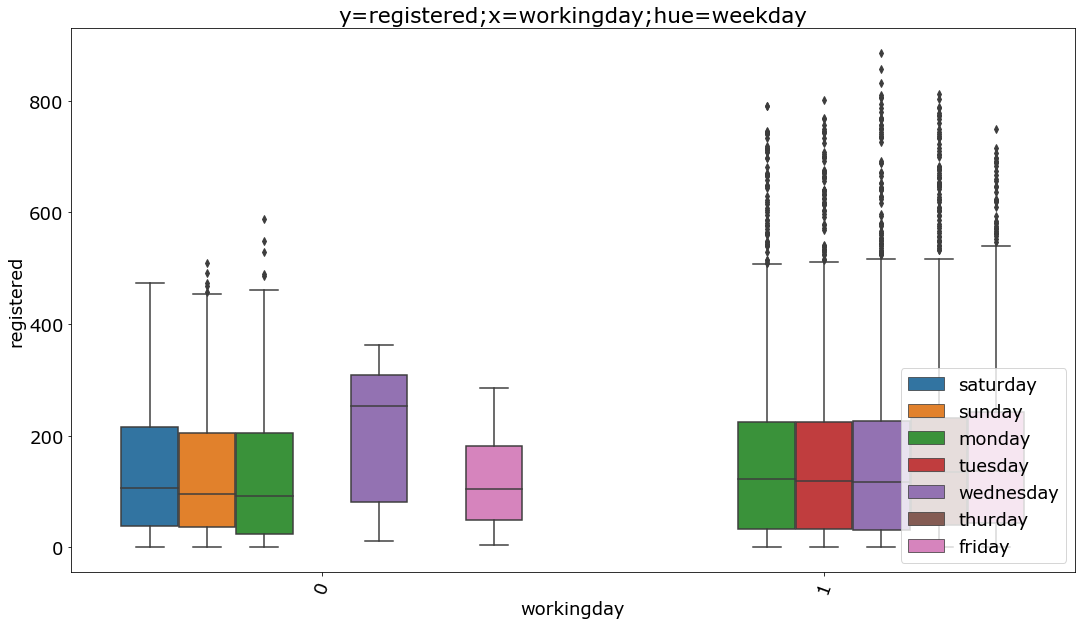

{'y': 'casual', 'x': 'temp_cat', 'hue': 'weekday'}


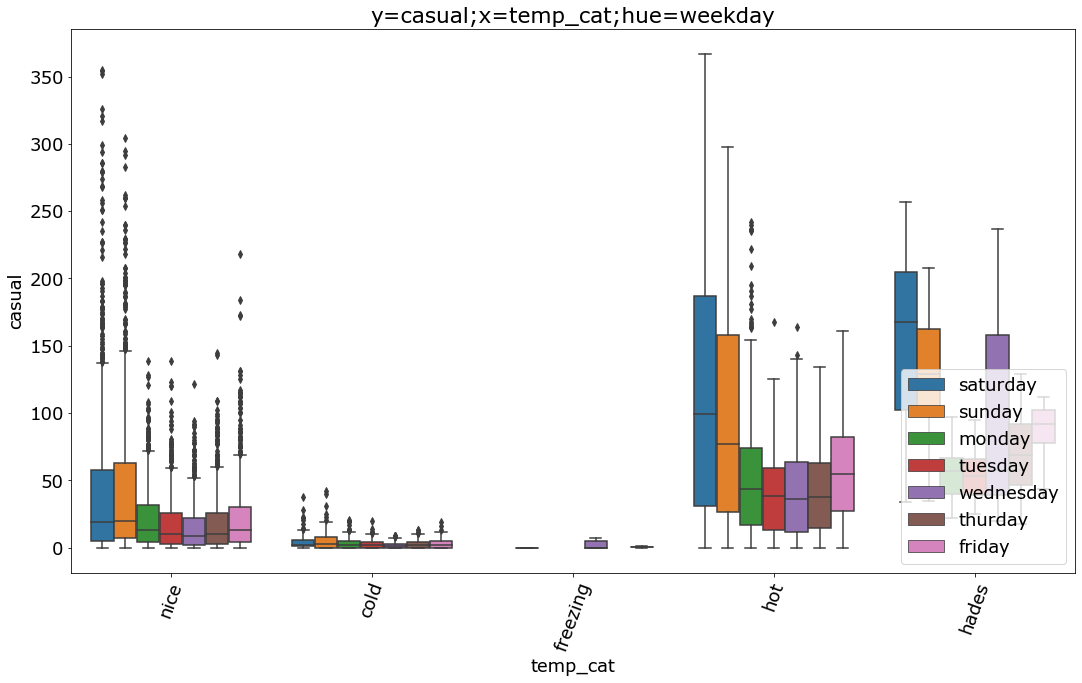

{'y': 'registered', 'x': 'temp_cat', 'hue': 'weekday'}


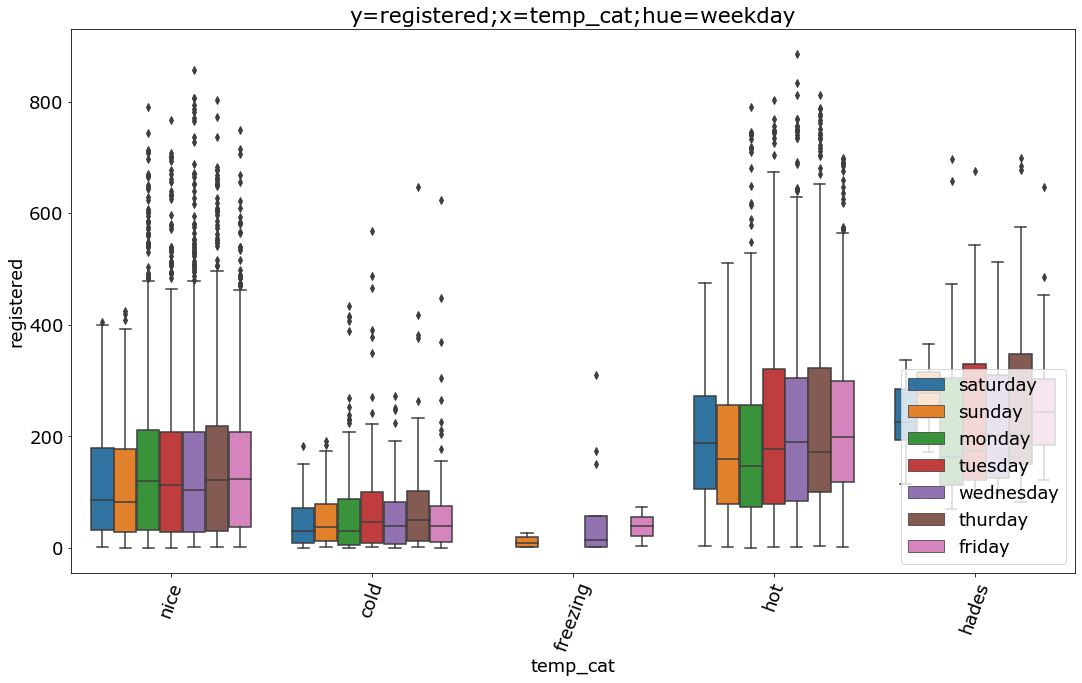

{'y': 'casual', 'x': 'temp', 'hue': 'weekday'}


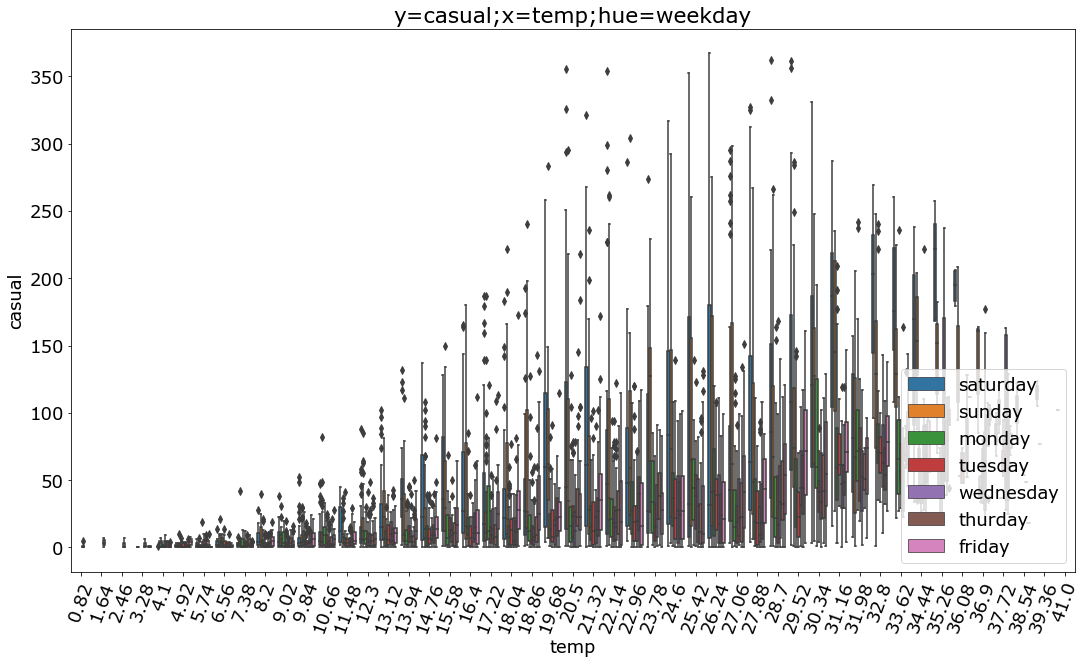

{'y': 'registered', 'x': 'temp', 'hue': 'weekday'}


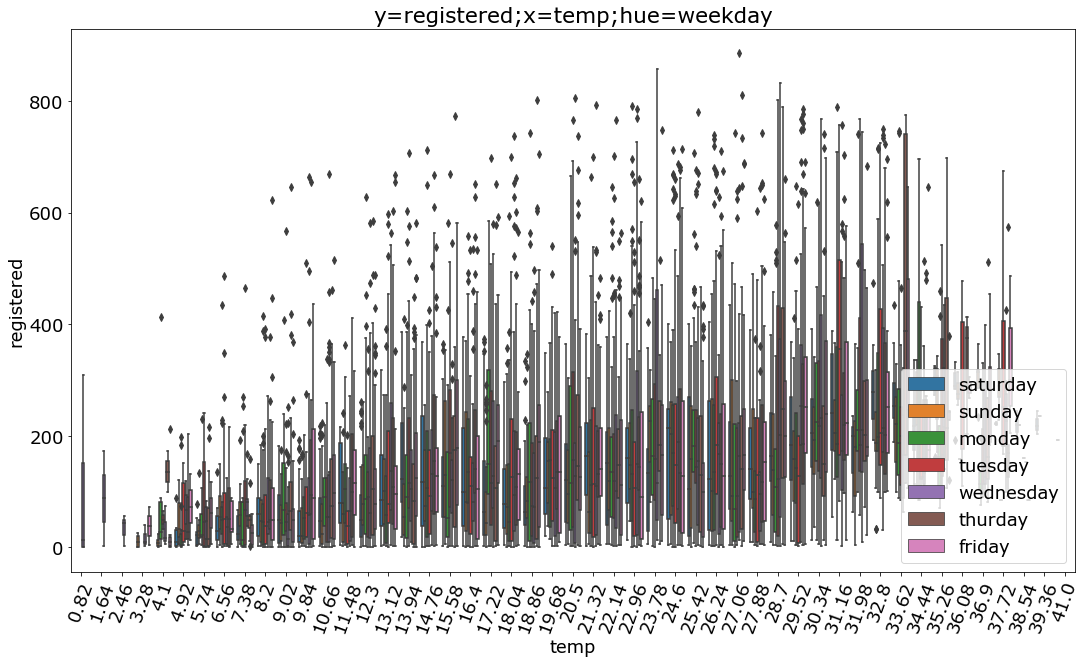

{'y': 'casual', 'x': 'holiday', 'hue': 'weekday'}


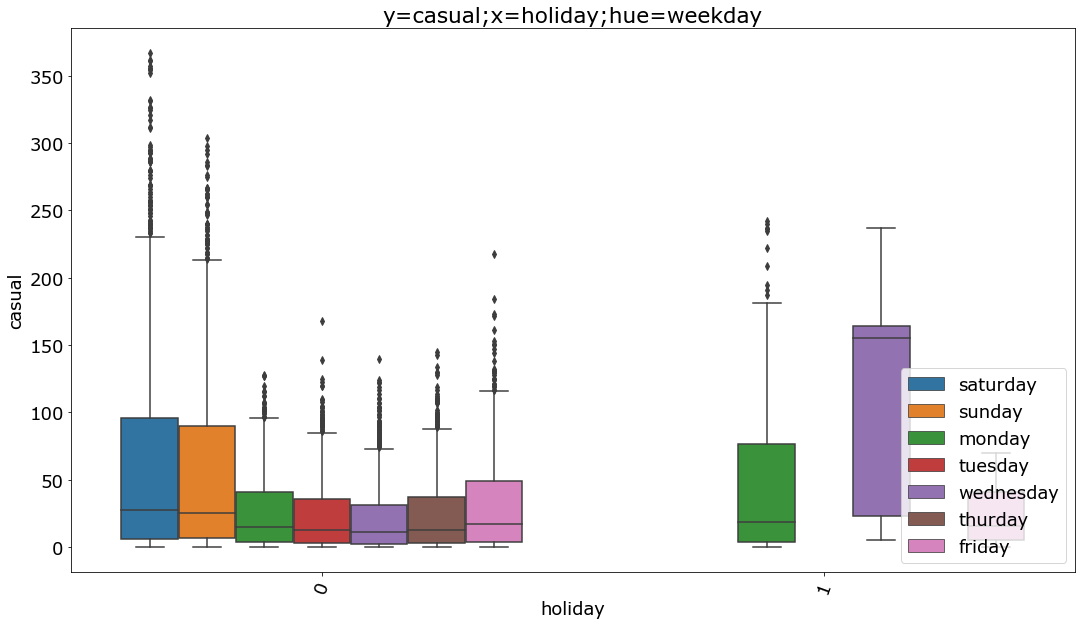

{'y': 'registered', 'x': 'holiday', 'hue': 'weekday'}


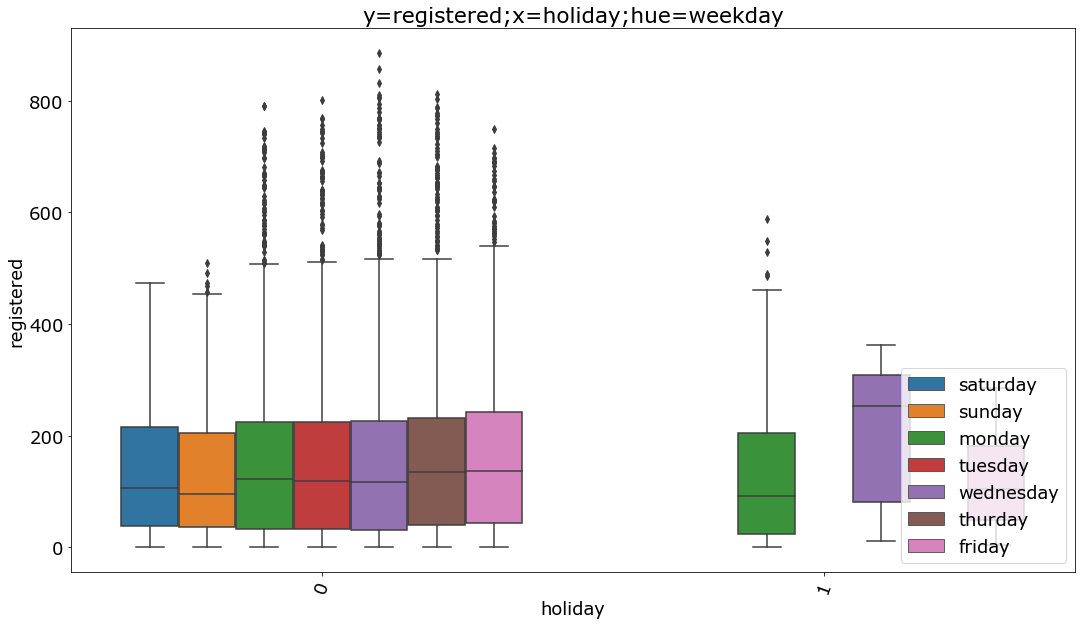

{'y': 'casual', 'x': 'temp_cat', 'hue': 'weekday'}


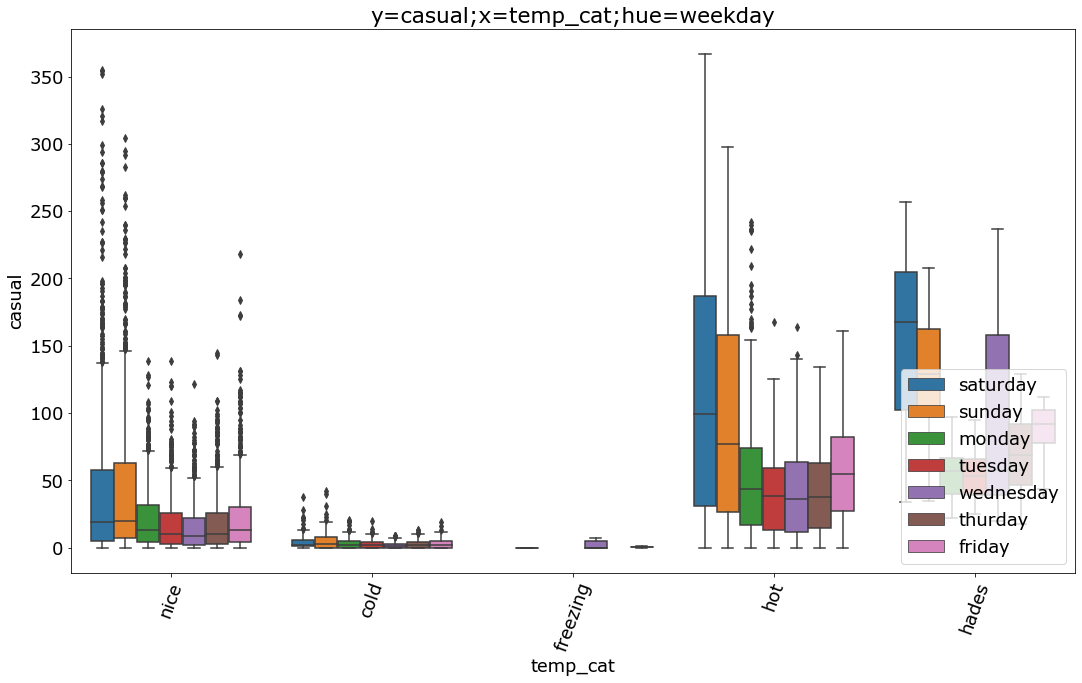

{'y': 'registered', 'x': 'temp_cat', 'hue': 'weekday'}


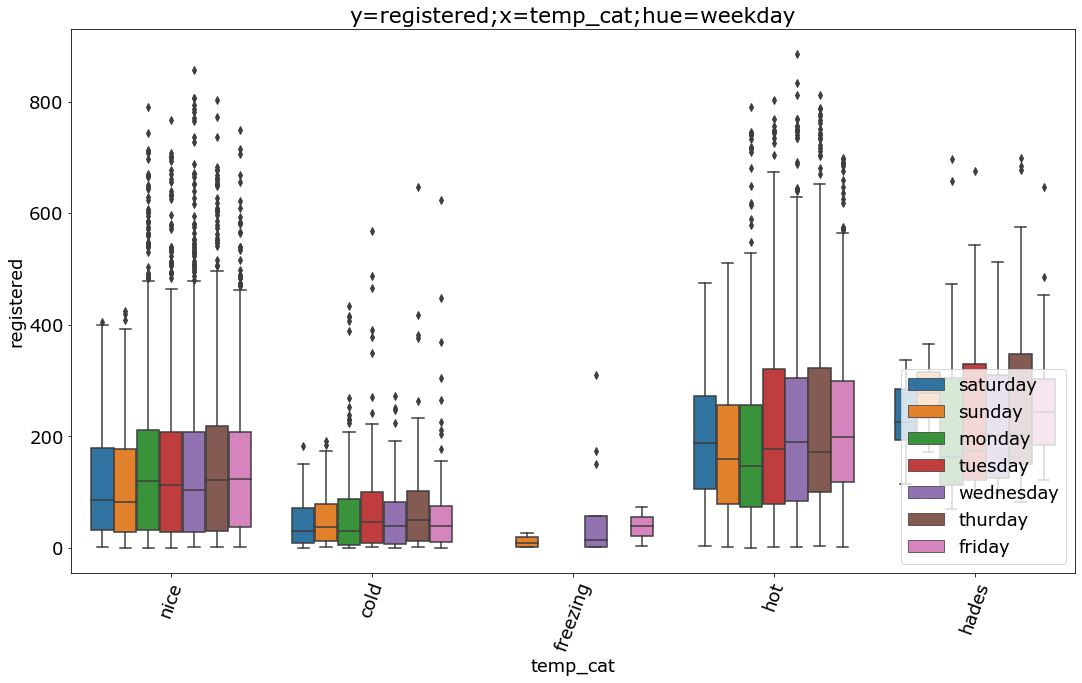

{'y': 'casual', 'x': 'workingday', 'hue': 'month'}


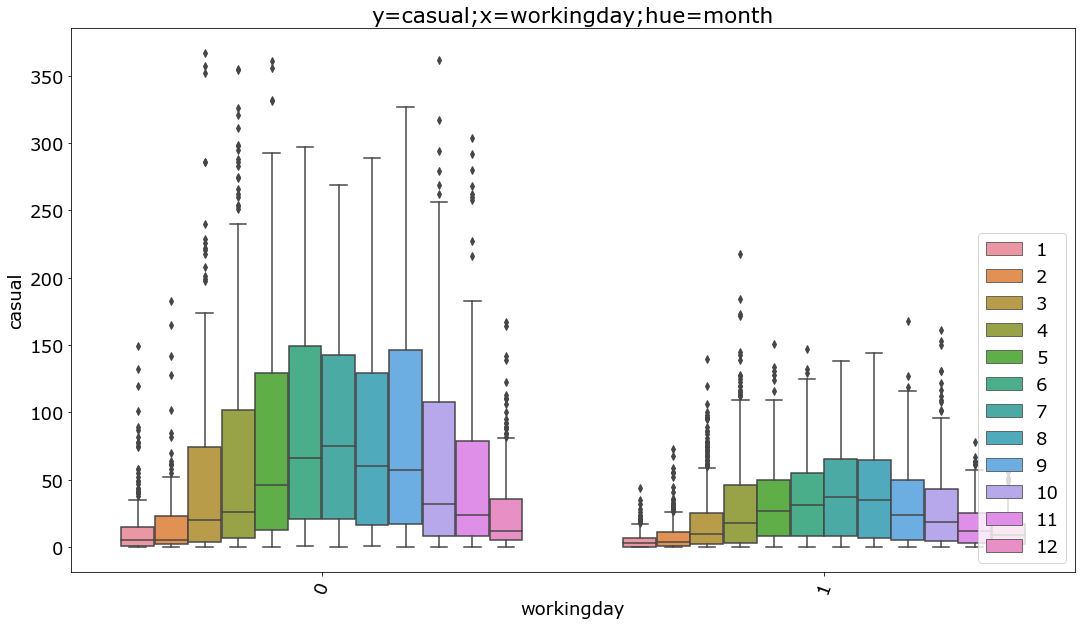

{'y': 'registered', 'x': 'workingday', 'hue': 'month'}


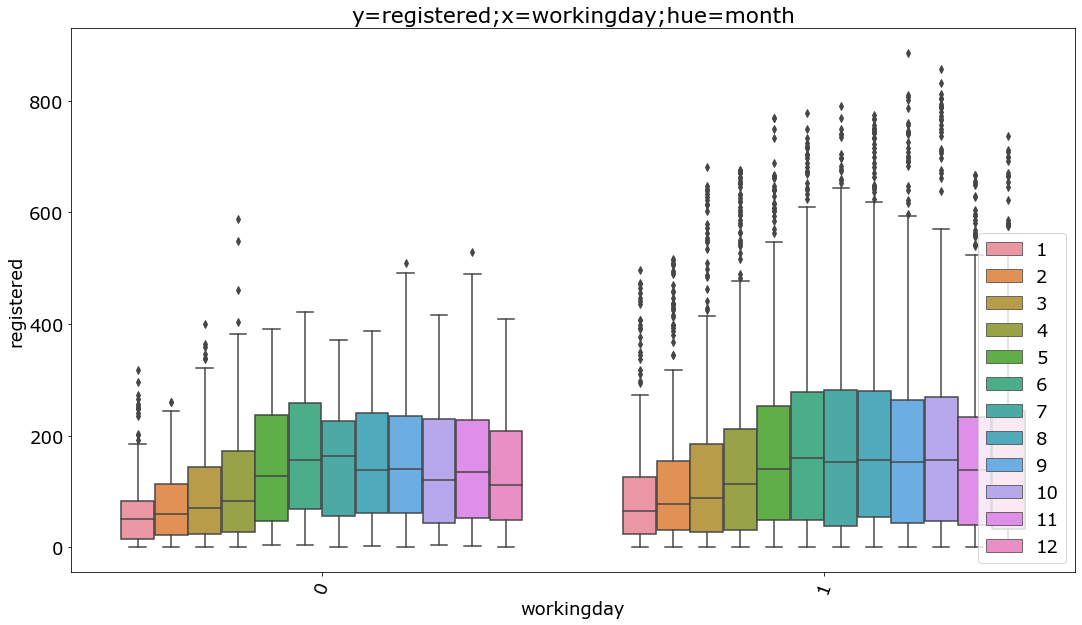

{'y': 'casual', 'x': 'weekday', 'hue': 'month'}


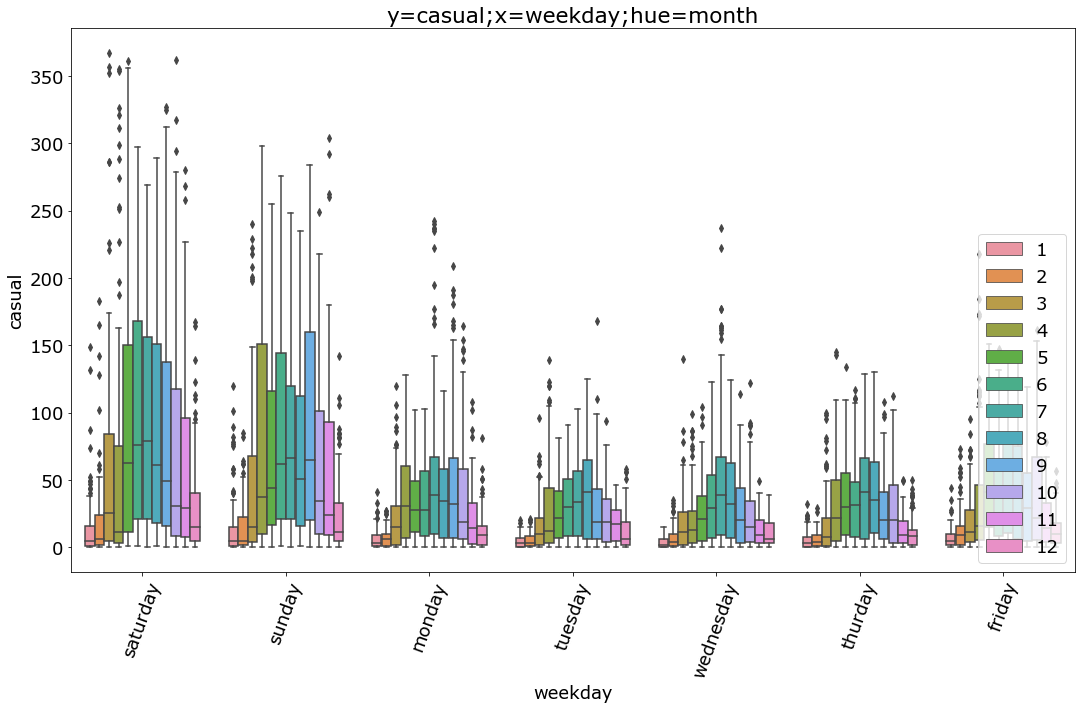

{'y': 'registered', 'x': 'weekday', 'hue': 'month'}


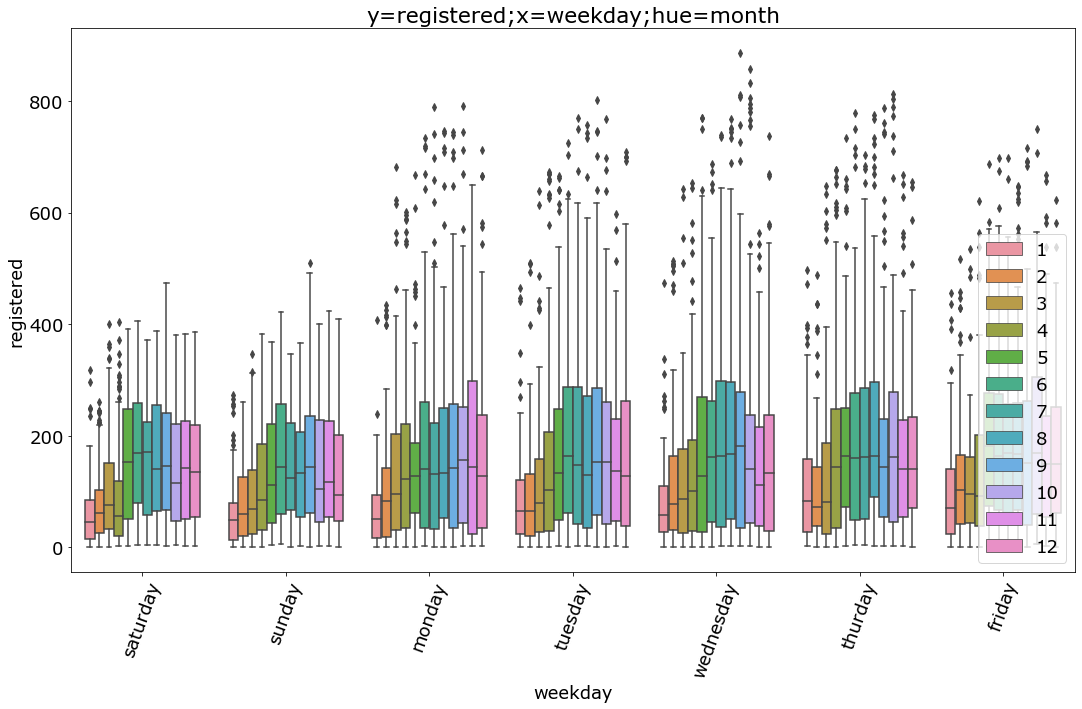

{'y': 'casual', 'x': 'temp_cat', 'hue': 'month'}


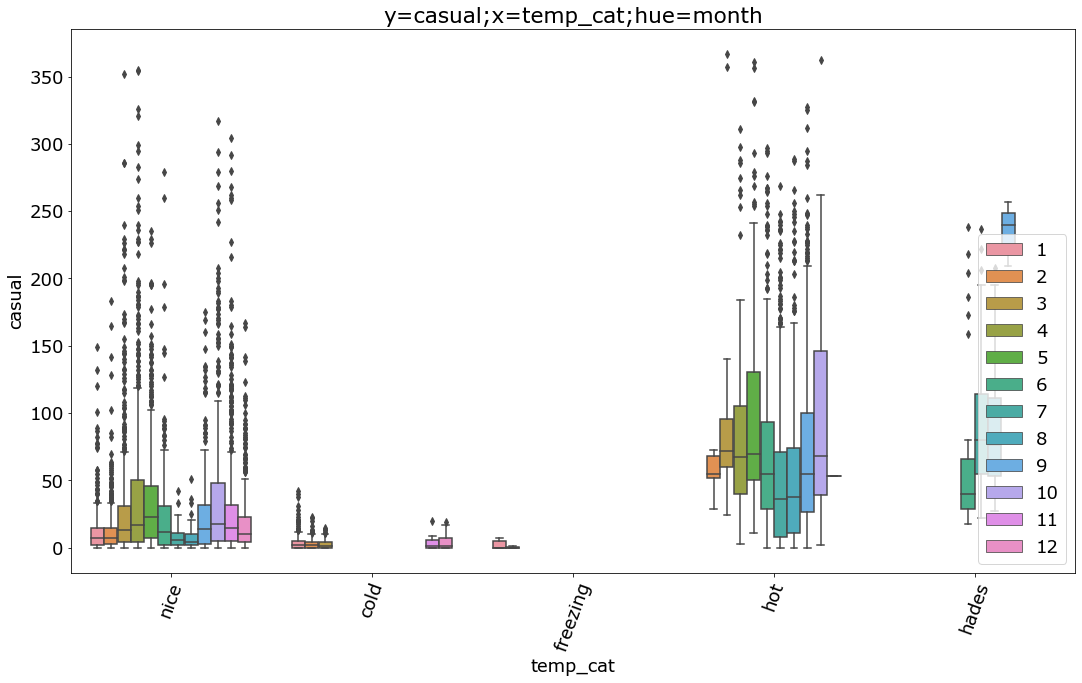

{'y': 'registered', 'x': 'temp_cat', 'hue': 'month'}


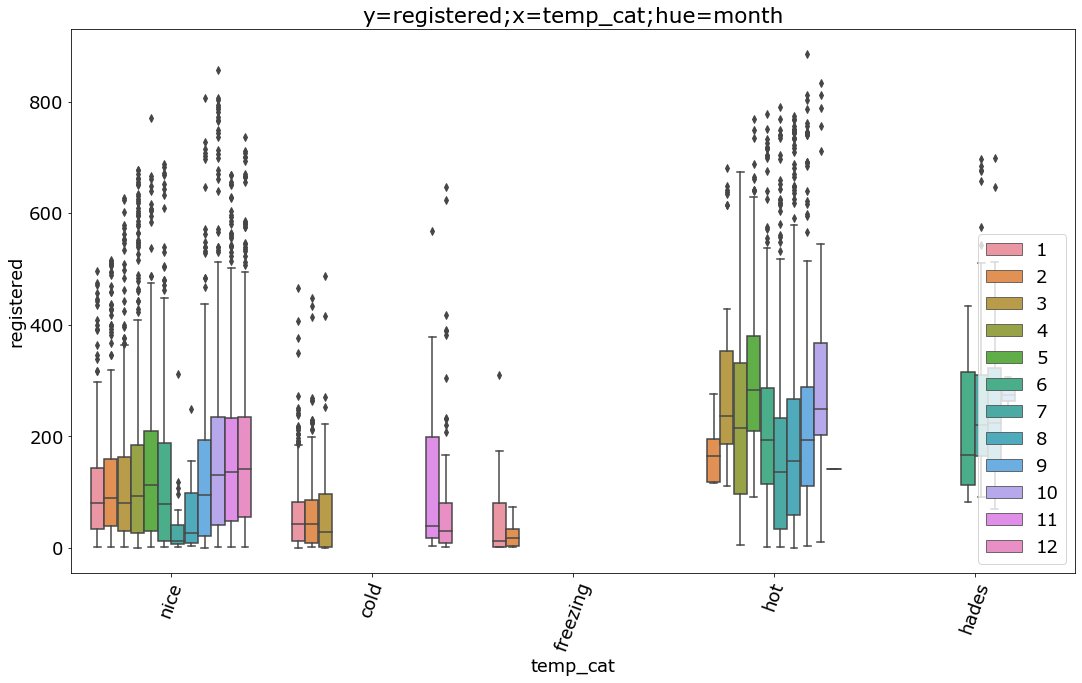

{'y': 'casual', 'x': 'temp', 'hue': 'month'}


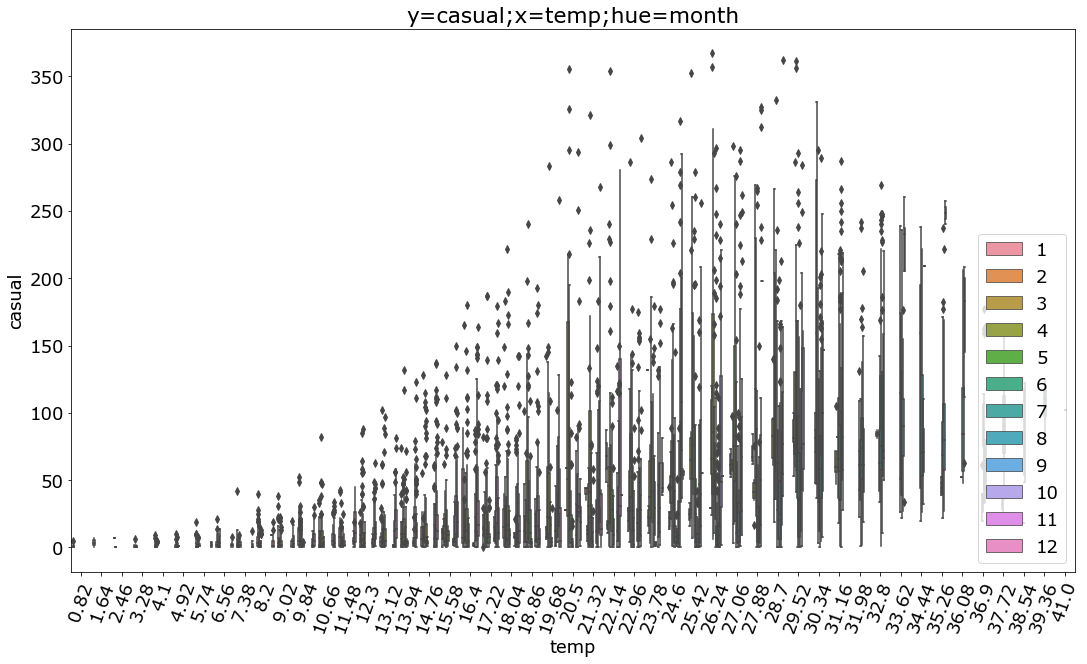

{'y': 'registered', 'x': 'temp', 'hue': 'month'}


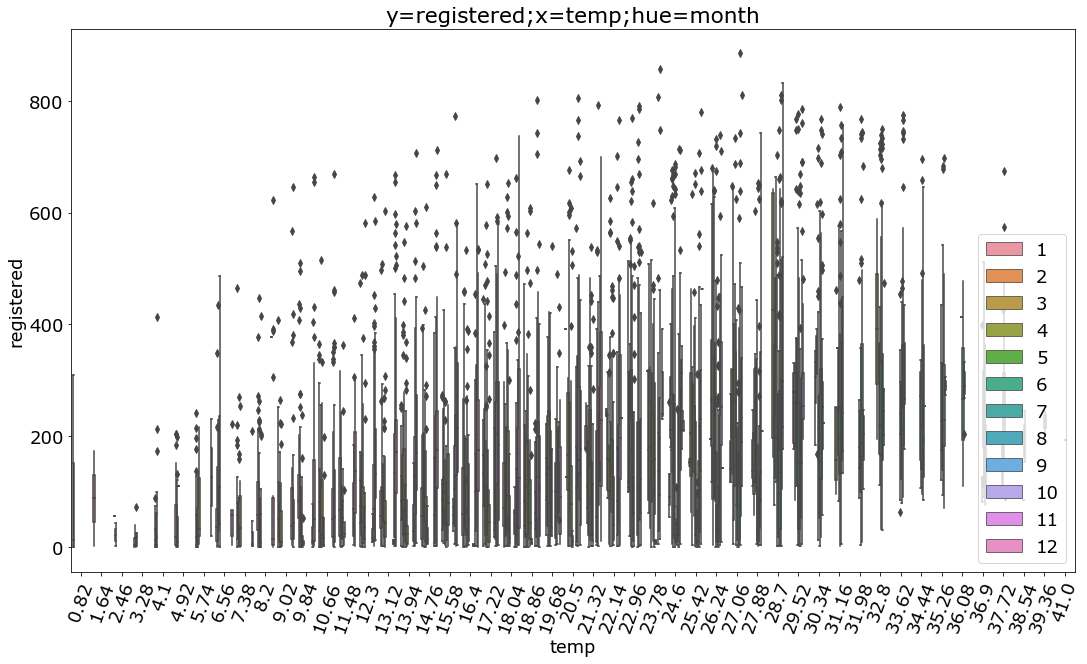

{'y': 'casual', 'x': 'holiday', 'hue': 'month'}


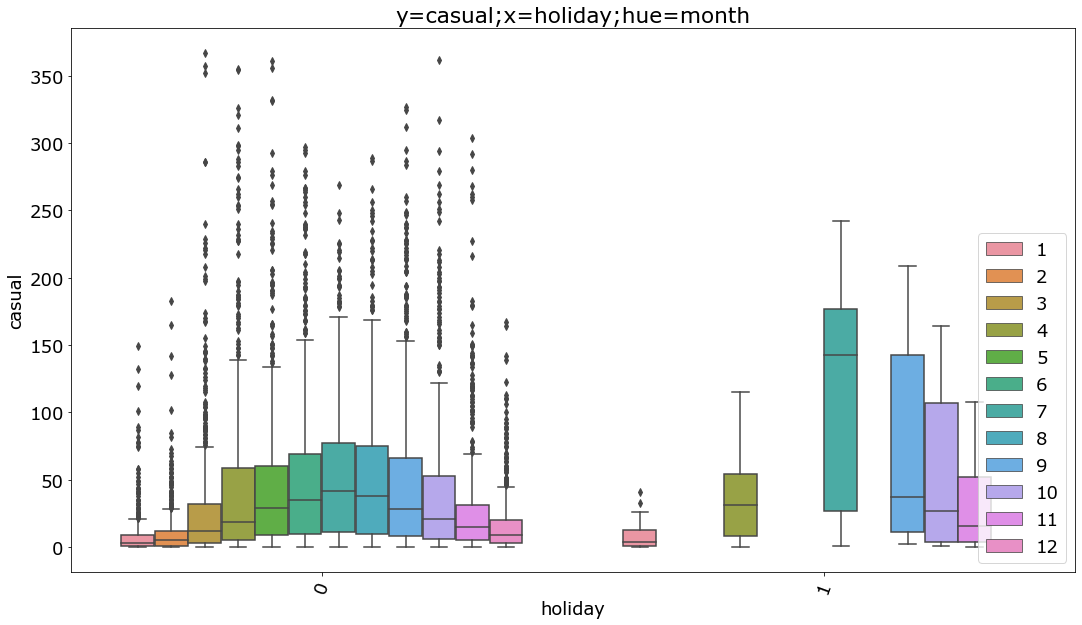

{'y': 'registered', 'x': 'holiday', 'hue': 'month'}


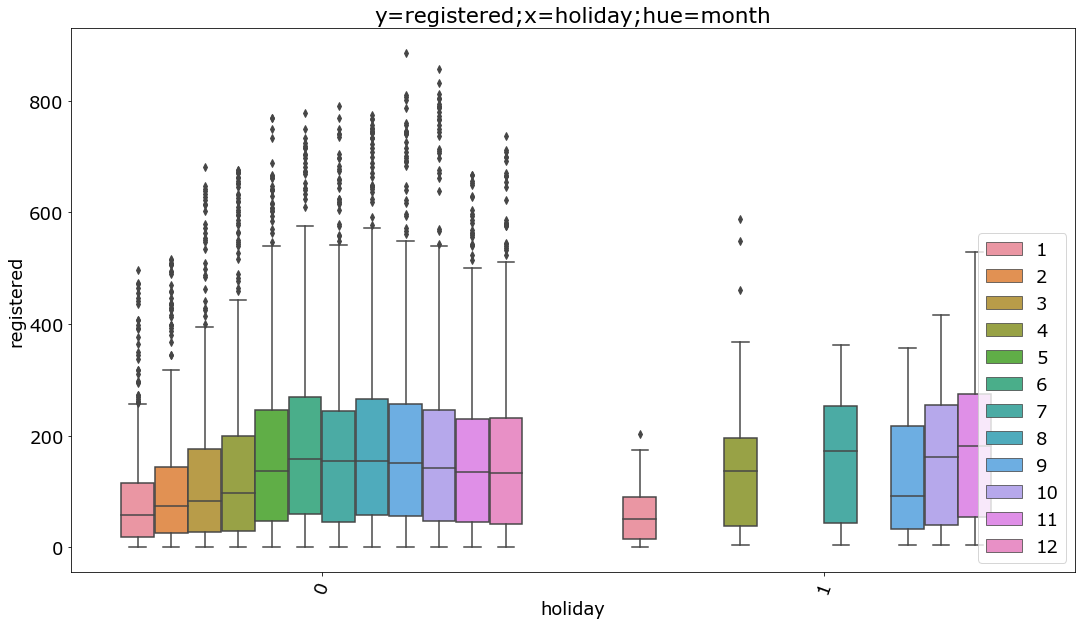

{'y': 'casual', 'x': 'temp_cat', 'hue': 'month'}


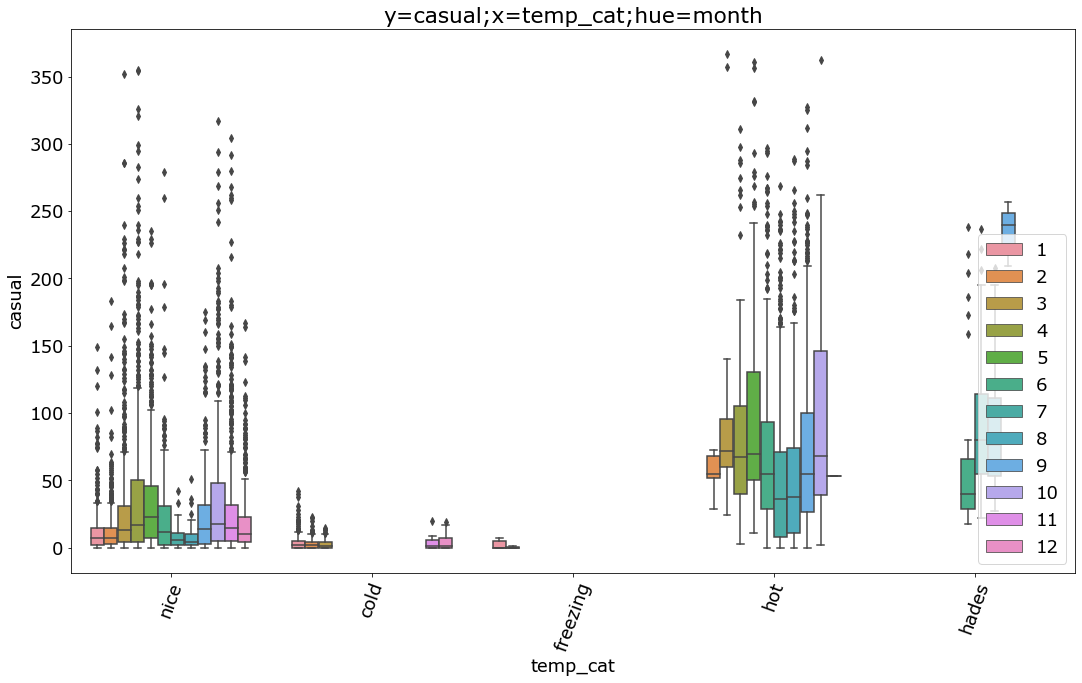

{'y': 'registered', 'x': 'temp_cat', 'hue': 'month'}


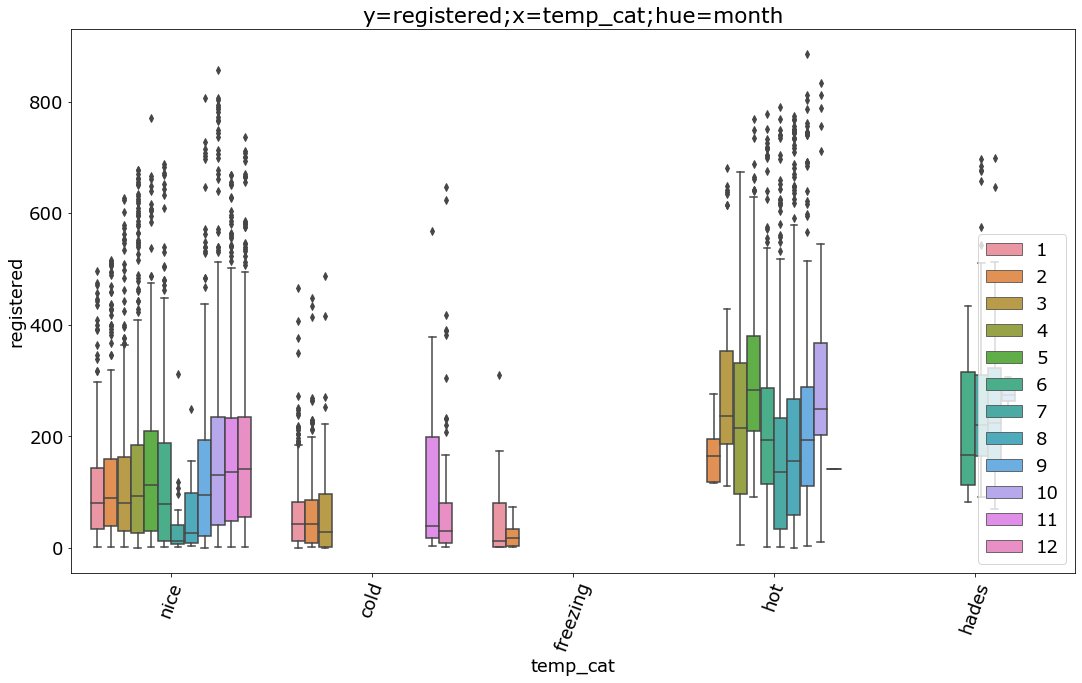

In [24]:
import datetime

def get_dt(dt):
    return datetime.datetime.fromisoformat(dt)

dx = dd.copy()

season_mapper = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

weekday_mapper = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thurday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
    
}

def temp_mapper(temp=None, 
                low=12, 
                high=29):

    if temp is None:
        raise ValueError(f'temp must be a number. got {temp}')

    if temp<low//2:
        return 'freezing'
    elif temp<low:
        return 'cold'
    elif temp>=high*1.33:
        return 'hades'
    elif temp <= high:
        return 'nice'
    else:
        return 'hot'
    
    
# dx['season'] = [ season_mapper[s] for s in dx.season ]
# dx['year'] = [ str((get_dt(x).year - 2011)%2011+1) for x in dx.datetime ]
# dx['hour'] = [ str(get_dt(x).time().hour) for x in dx.datetime ]
# dx['month'] = [ str(get_dt(x).month) for x in dx.datetime ]
dx['tempcat'] = list(map(temp_mapper, dx.temp))

dts = df['datetime'].copy()
dx['hour'] = dts.apply(func= lambda x: get_datetime(x).hour)
dx['weekday'] = dts.apply(func= lambda x: get_datetime(x).weekday())
dx['weekday'] = dx.weekday.apply(func=lambda x: weekday_mapper[x])
dx['year'] = dts.apply(func= lambda x: (get_datetime(x).year - 2011)%2011+1)
dx['month'] = dts.apply(func=lambda x: get_datetime(x).month )
dx['approx_temp'] = df.temp.apply(func=lambda x: round(x,1))
low_temp_F, high_temp_F=49,78
dx['temp_cat'] = dx.temp.apply(func=lambda x : temp_mapper(temp=x,low=convert_temperature(low_temp_F,'f','c'),high=convert_temperature(high_temp_F,'f','c')))
dx['season'] = dx.season.apply(func=lambda x: season_mapper[x])



def format_title(**kwargs):
    return ';'.join([ f'{k}={v}' for k,v in kwargs.items() ])
    
def do_plot(x,y,hue,data=dx):
    dx_=data.copy()
    make_big()
    sns.boxplot(x=dx_[x],y=dx_[y],hue=dx_[hue])
    plt.xticks(rotation=70)
    plt.title(format_title(y=y, x=x, hue=hue))
    plt.legend(loc=4)
    plt.show()

    

hues = ['hour','temp_cat','weekday','month']
xs = ['workingday',
      'weekday',
      'temp_cat',
      'temp',
      #'month',
      'holiday',
      'temp_cat']



plots = []


for h in hues:
    for x in xs:
        for y in ['casual', 'registered']:
            if h==x:
                continue
            this = {
                'y':y,
                'x':x,
                'hue':h}
            plots.append(this)
            

for i, plot in enumerate(plots):
    print(plot)
    do_plot(**plots[i])

## accounting for linear + cyclic relationships

* As time goes on (see below), the number of rentals increases
* The number of rentals is also cyclic in the season 
* cyclic time will require weekday, month, hour
* can account for interactions

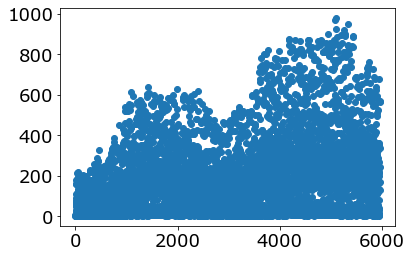

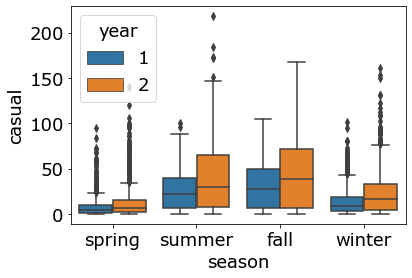

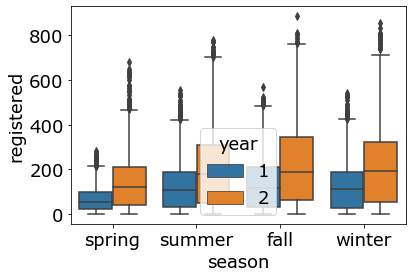

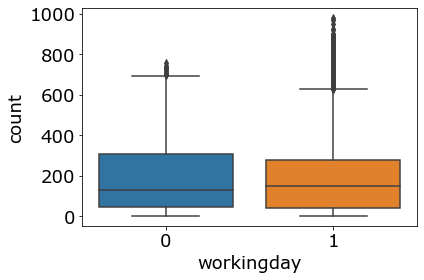

In [31]:

d = dx[dx.workingday==1]

plt.scatter(range(len(d.index)), d['count'])
plt.show()

# plt.hist(d.temp_cat)
# plt.title('temp categories')

for yy in ['casual','registered']:
    sns.boxplot(y=yy,x='season', hue='year', data=dx[dx.workingday==1])
    plt.show()

sns.boxplot(y='count',x='workingday',data=dd)
plt.show()


season  holiday  workingday  weather   temp  humidity  windspeed  \
0     spring        0           0        1   9.84        81     0.0000   
1     spring        0           0        1   9.84        75     0.0000   
2     spring        0           0        1   9.02        80     0.0000   
3     spring        0           0        1   8.20        86     0.0000   
4     spring        0           0        1   9.84        75     0.0000   
...      ...      ...         ...      ...    ...       ...        ...   
8703  winter        0           1        1  15.58        50    23.9994   
8704  winter        0           1        1  15.58        50    26.0027   
8705  winter        0           1        1  14.76        57    15.0013   
8706  winter        0           1        1  13.94        61    15.0013   
8707  winter        0           1        1  13.94        61     6.0032   

      casual  registered  count             datetime tempcat  hour    weekday  \
0          3          13     16  2011-01-01 00:00:00    cold     0   saturday   
1          0           1      1  2011-01-01 04:00:00    cold     4   saturday   
2          2           0      2  2011-01-01 06:00:00    cold     6   saturday   
3          1           2      3  2011-01-01 07:00:00    cold     7   saturday   
4          1           7      8  2011-01-01 08:00:00    cold     8   saturday   
...      ...         ...    ...                  ...     ...   ...        ...   
8703      23         546    569  2012-12-19 18:00:00    nice    18  wednesday   
8704       7         329    336  2012-12-19 19:00:00    nice    19  wednesday   
8705      10         231    241  2012-12-19 20:00:00    nice    20  wednesday   
8706       4         164    168  2012-12-19 21:00:00    nice    21  wednesday   
8707      12         117    129  2012-12-19 22:00:00    nice    22  wednesday   

      year  month  approx_temp temp_cat  
0        1      1          9.8     nice  
1        1      1          9.8     nice  
2        1      1          9.0     cold  
3        1      1          8.2     cold  
4        1      1          9.8     nice  
...    ...    ...          ...      ...  
8703     2     12         15.6     nice  
8704     2     12         15.6     nice  
8705     2     12         14.8     nice  
8706     2     12         13.9     nice  
8707     2     12         13.9     nice  

[8708 rows x 18 columns]

In [16]:
## adding interactions, cyclic

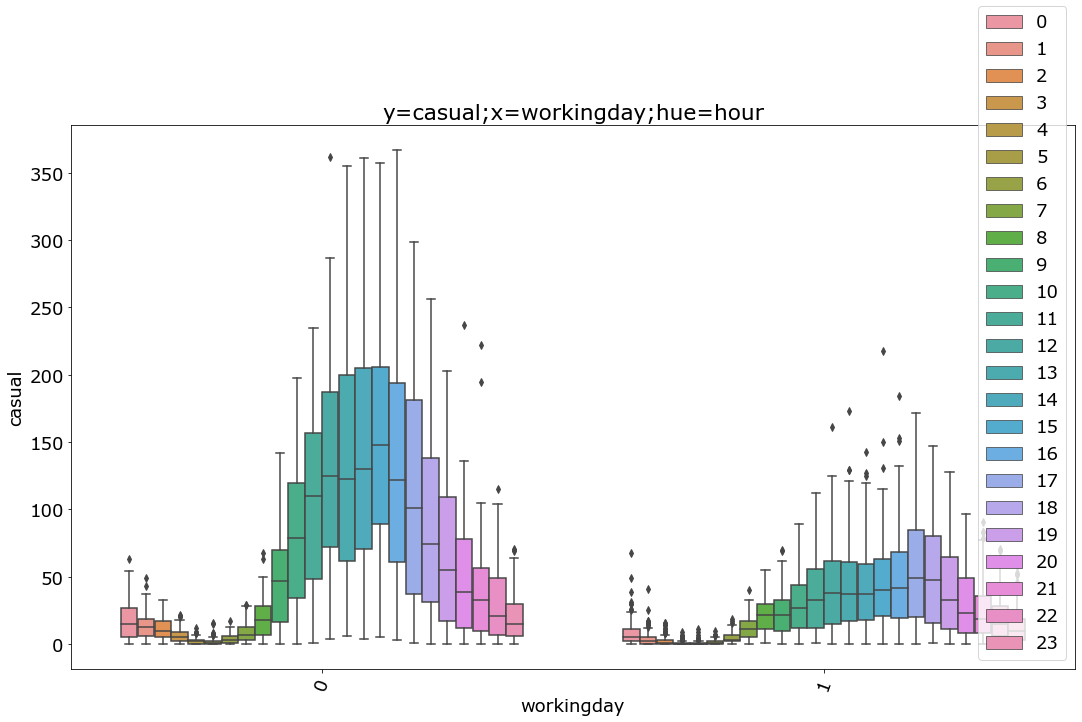

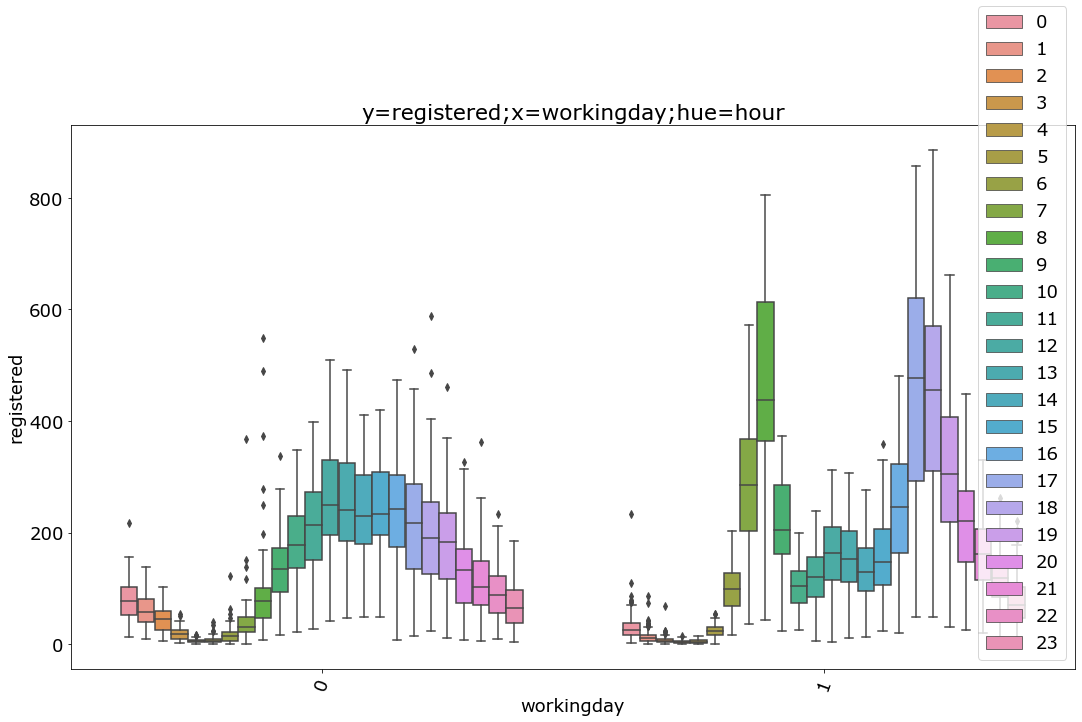

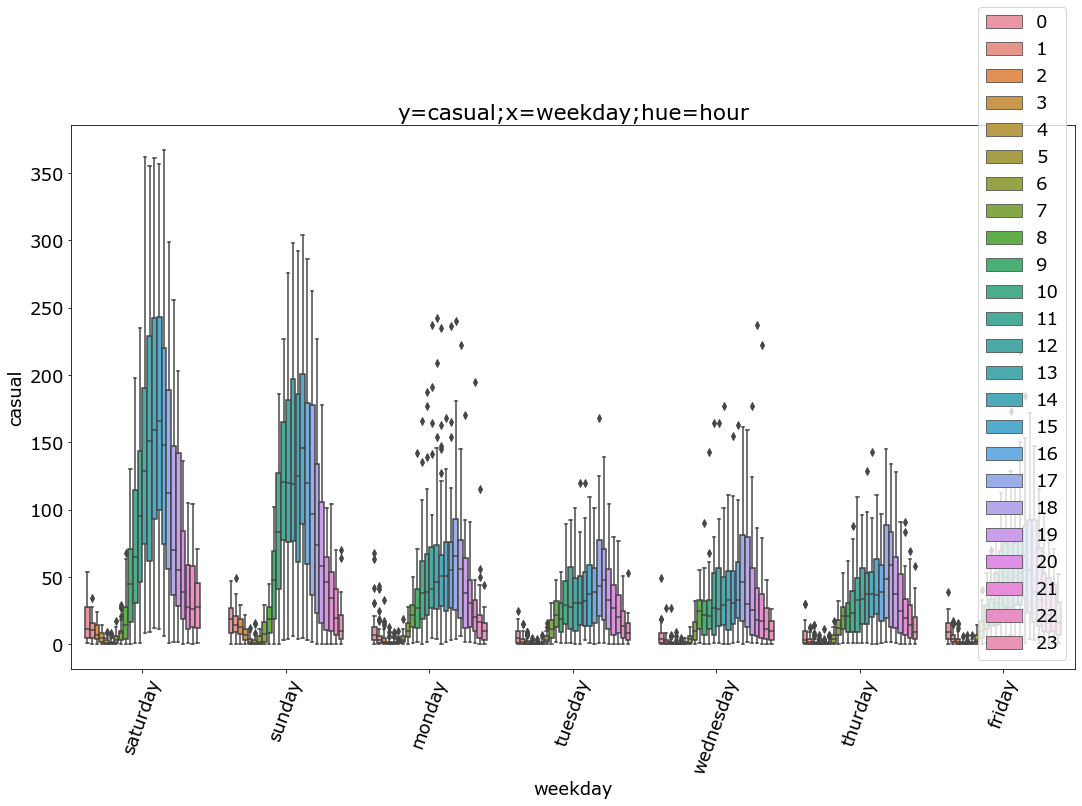

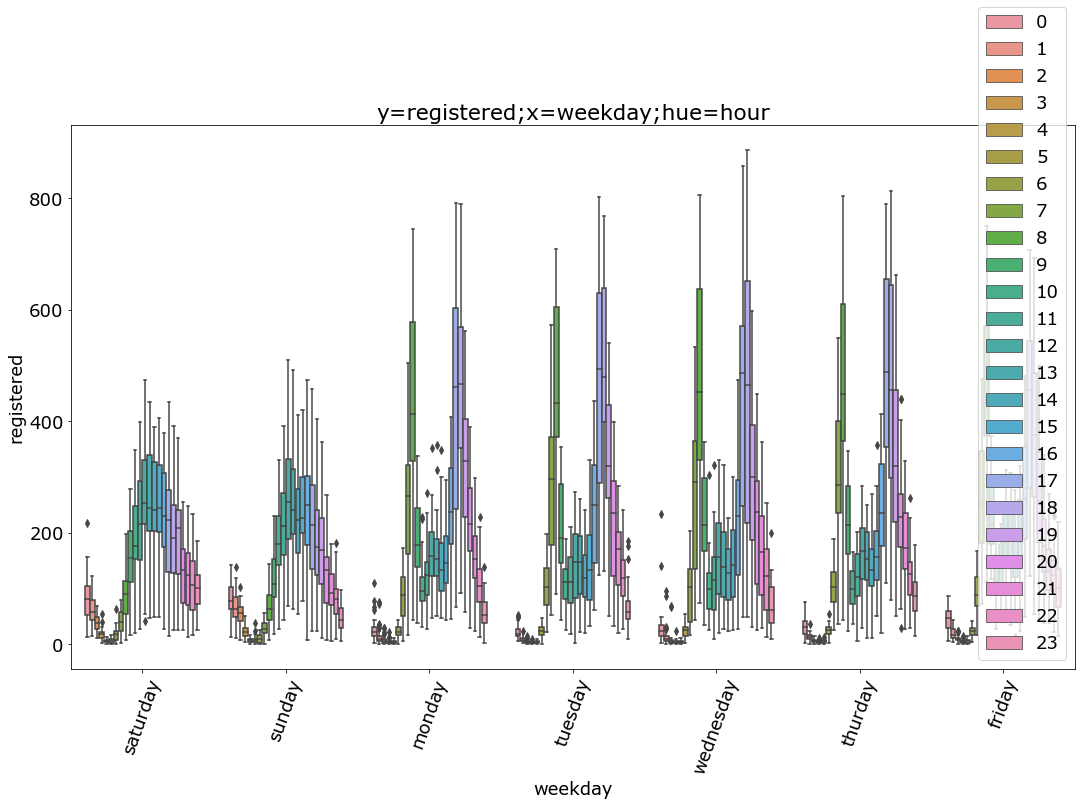

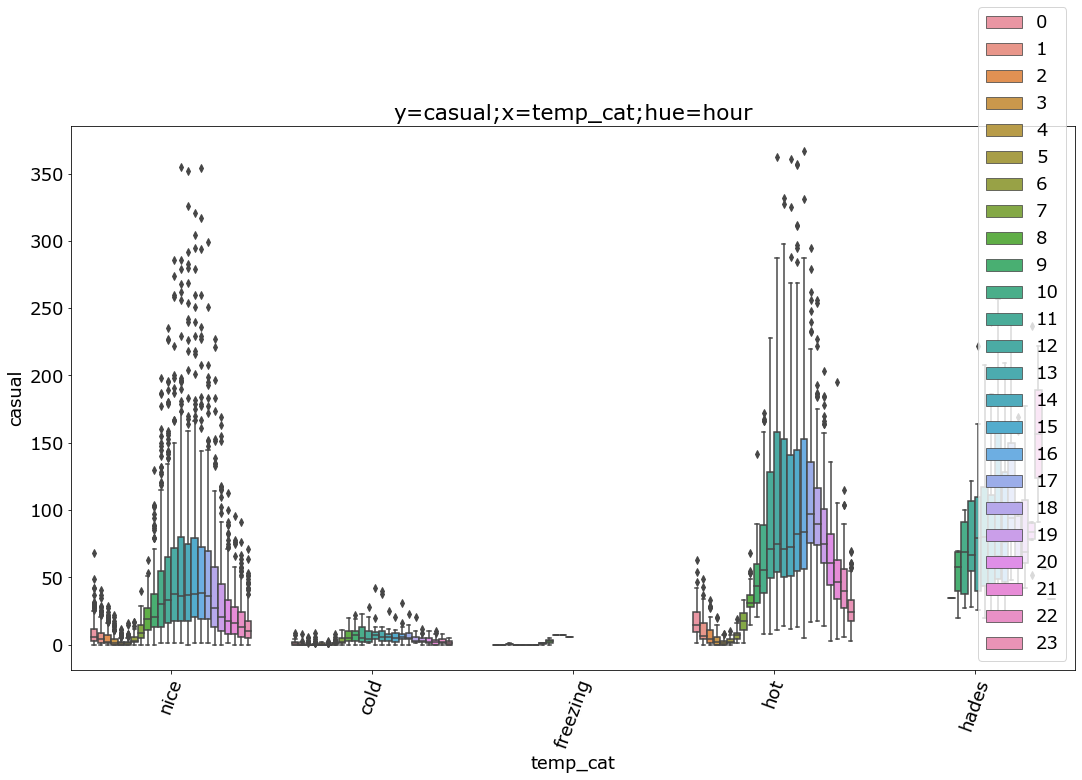

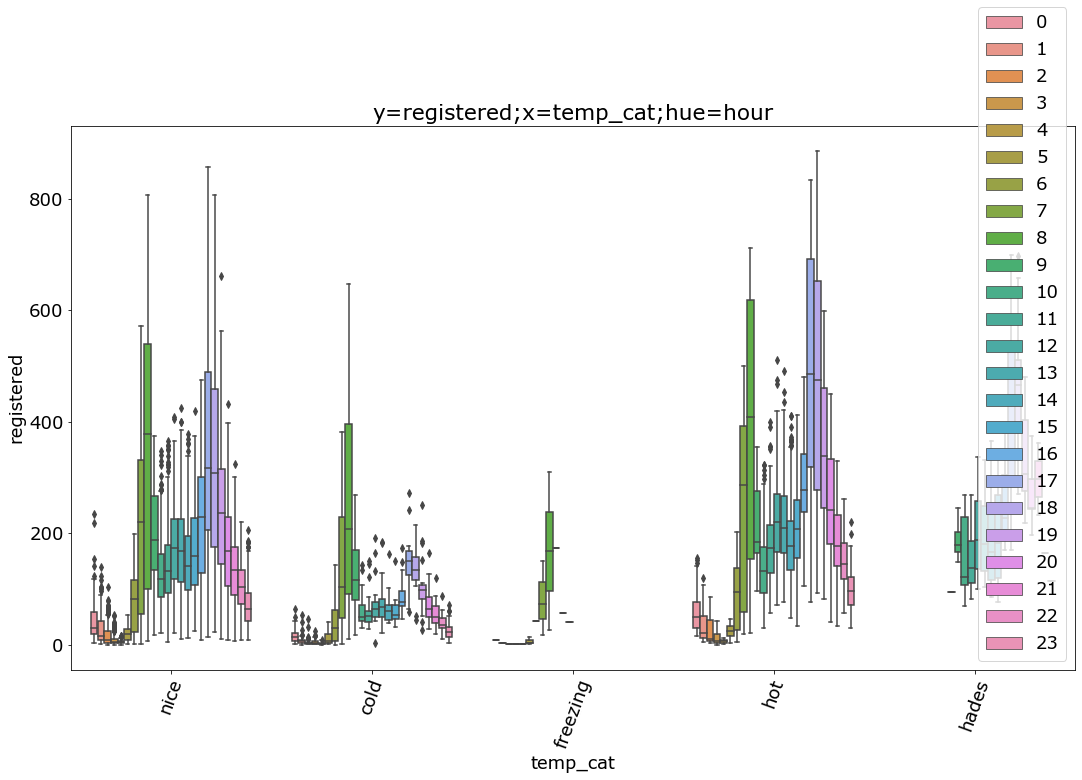

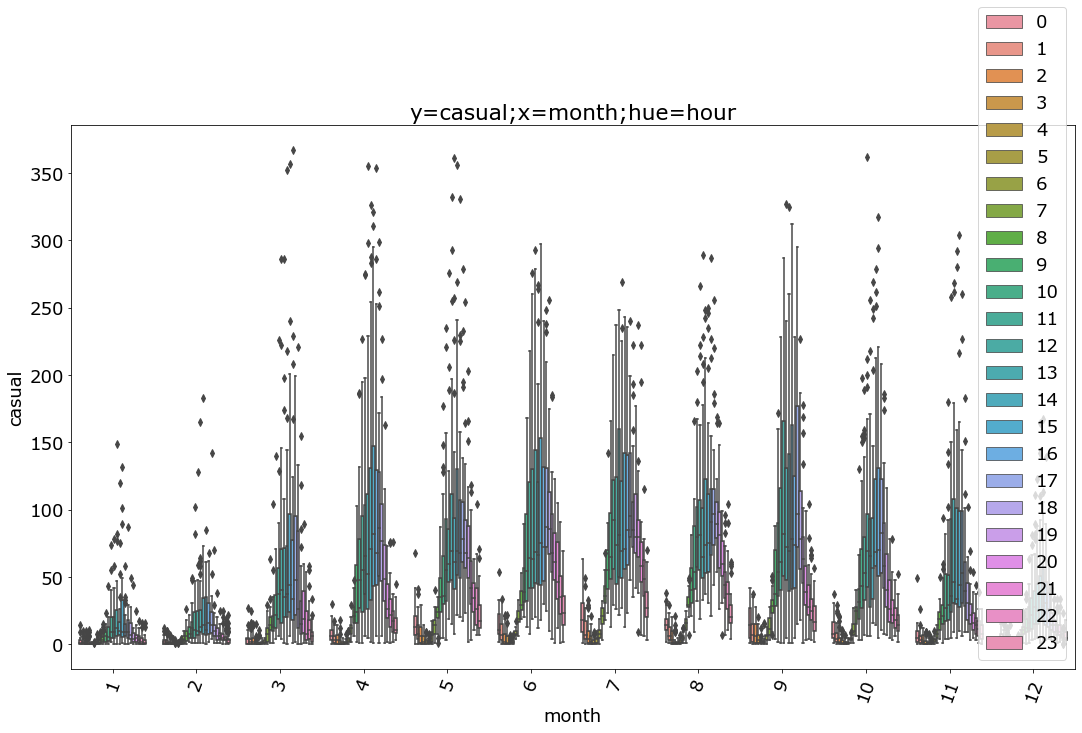

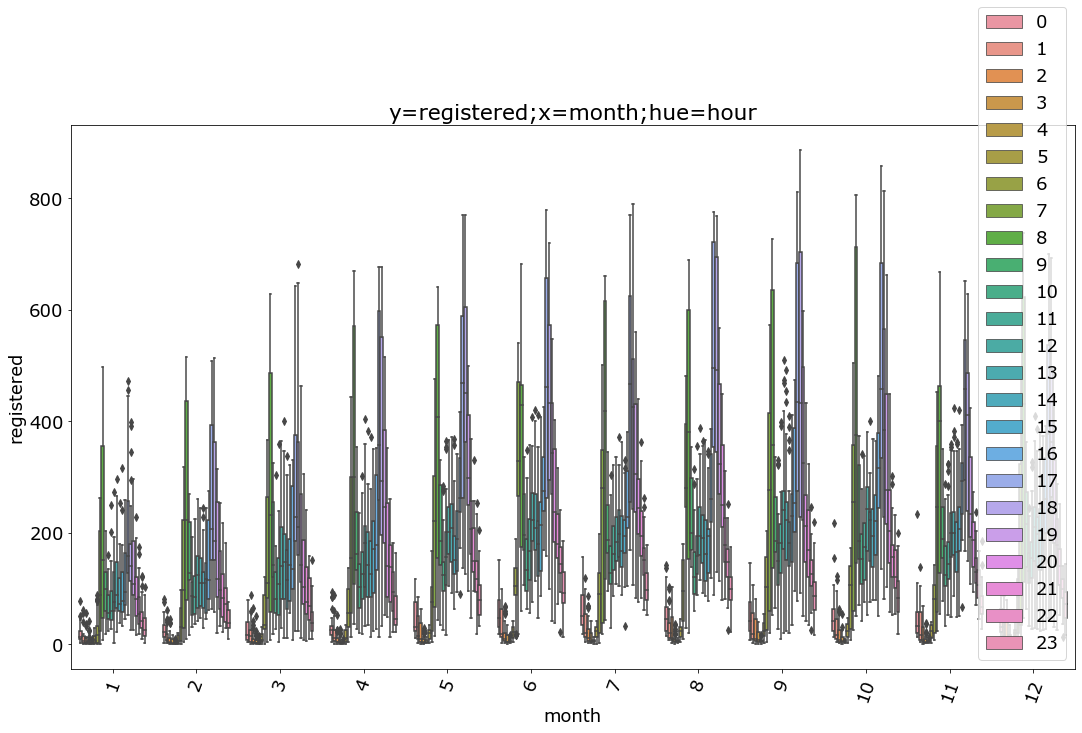

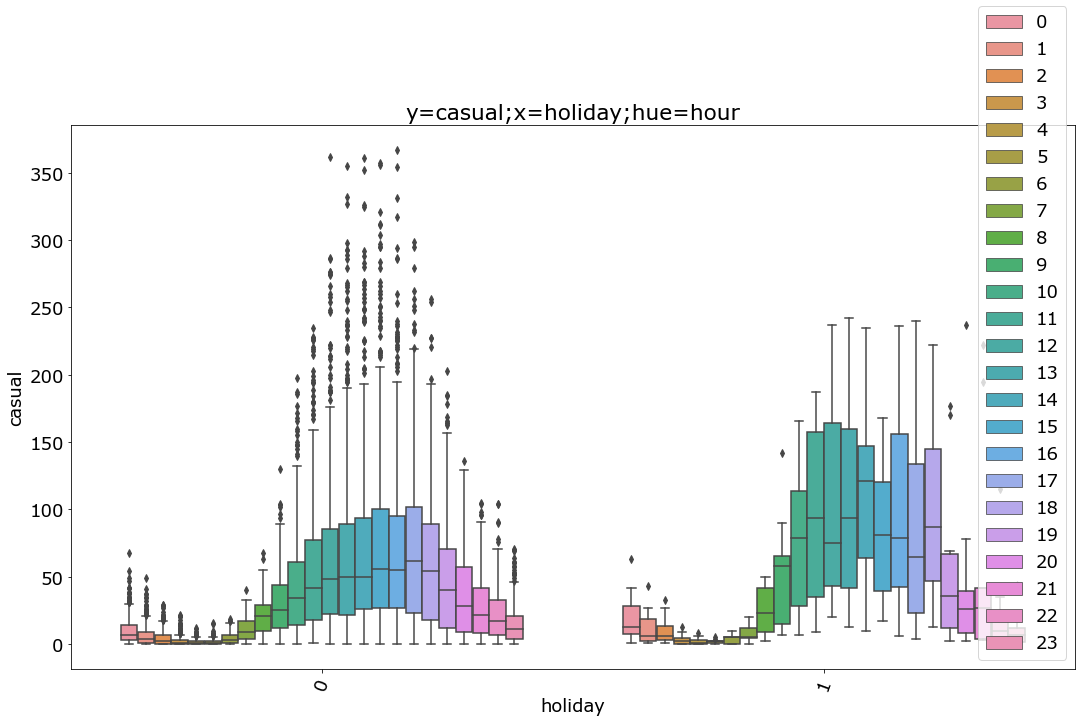

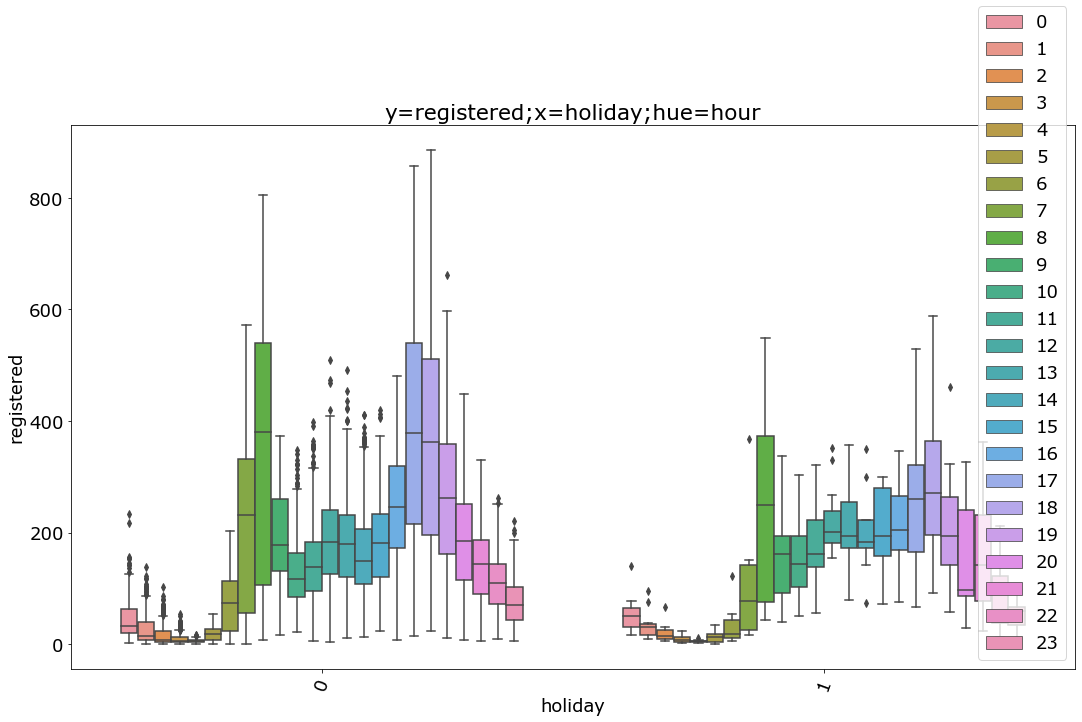

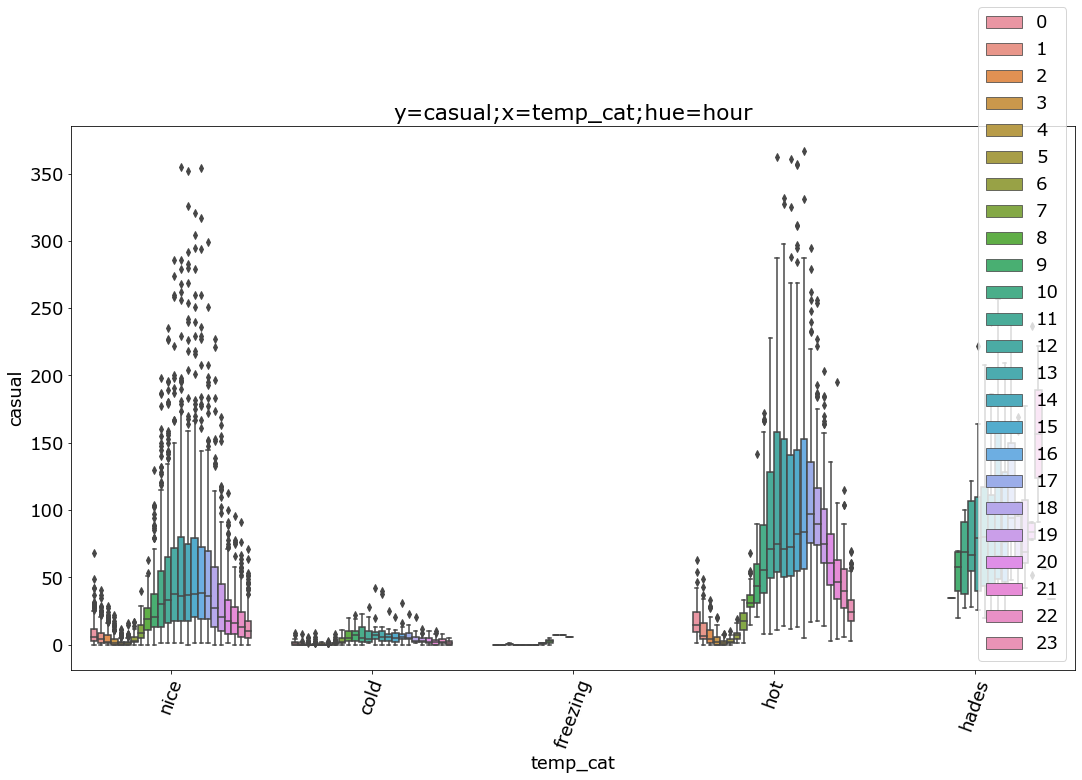

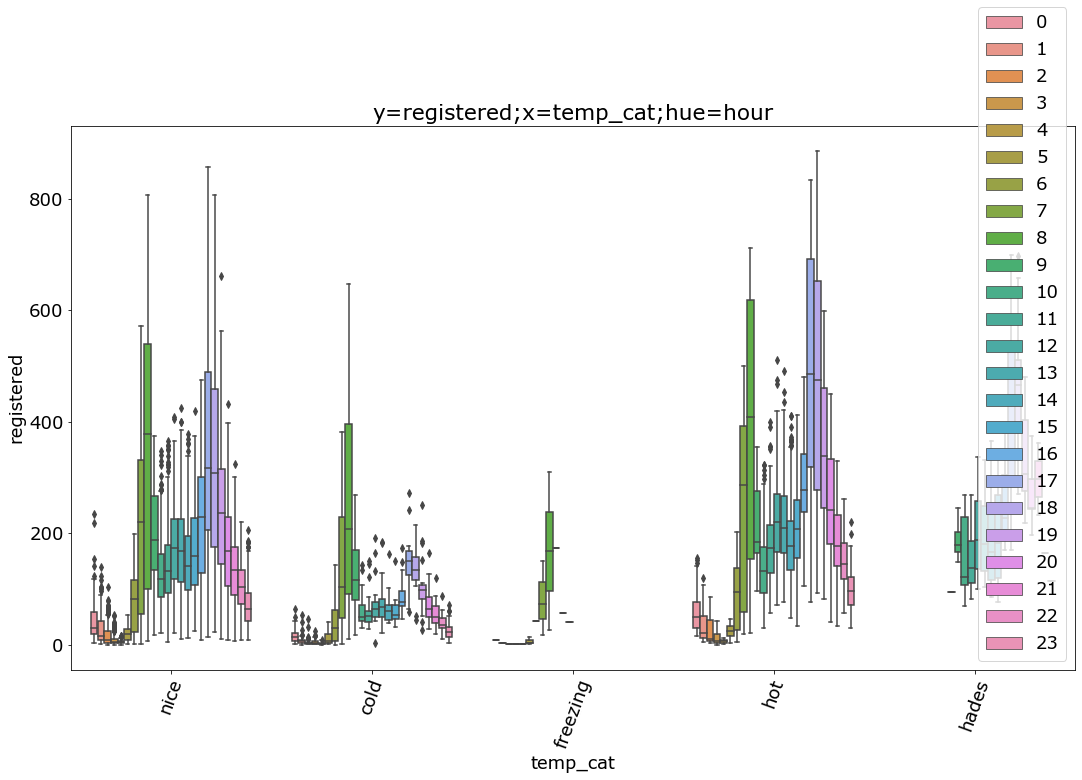

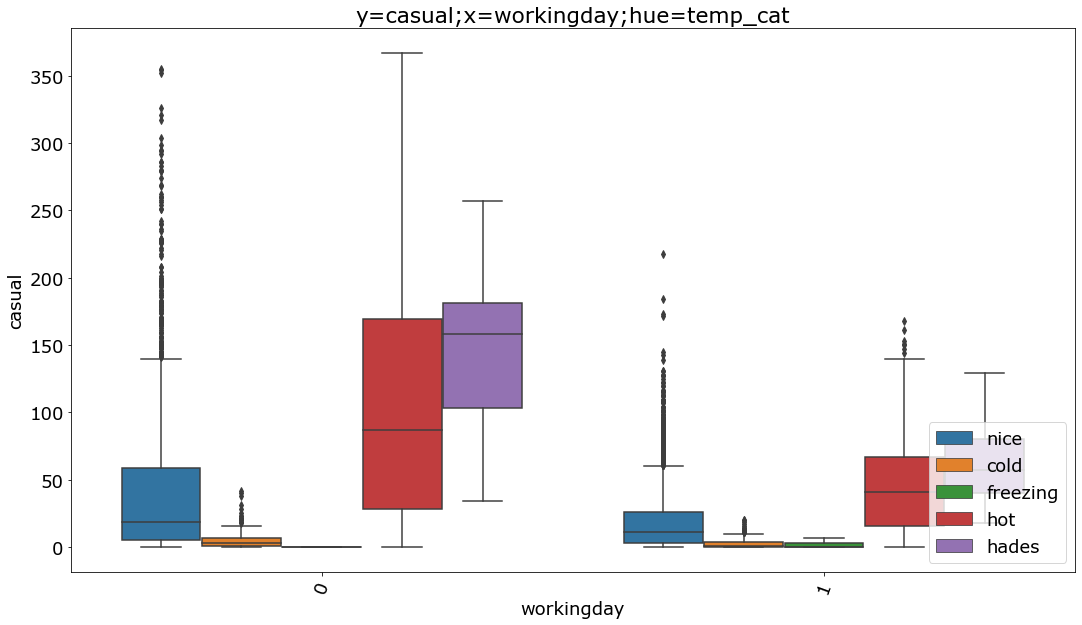

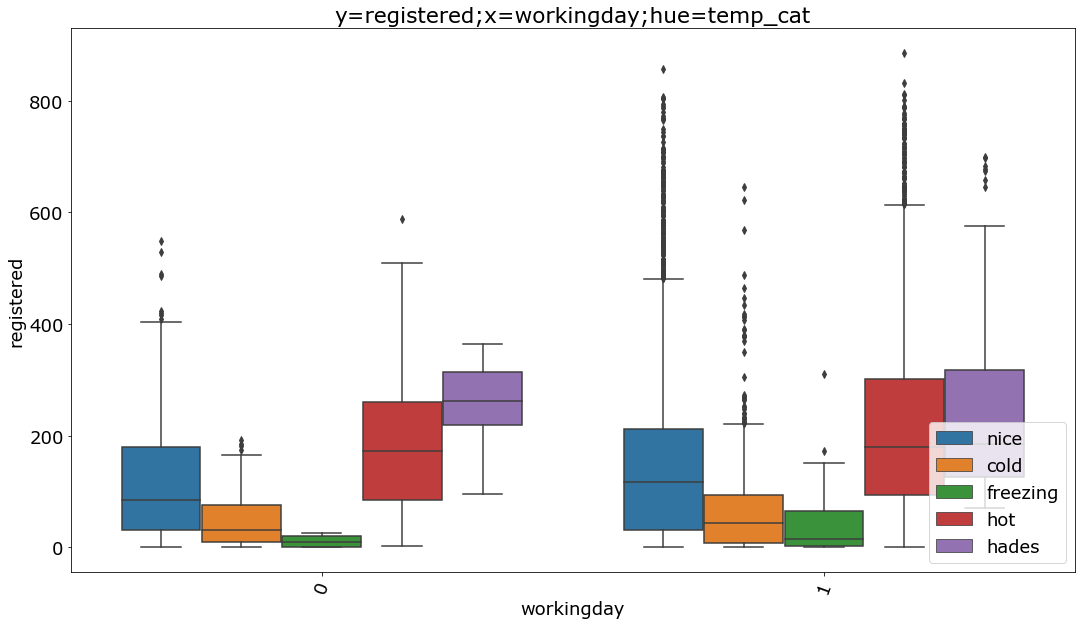

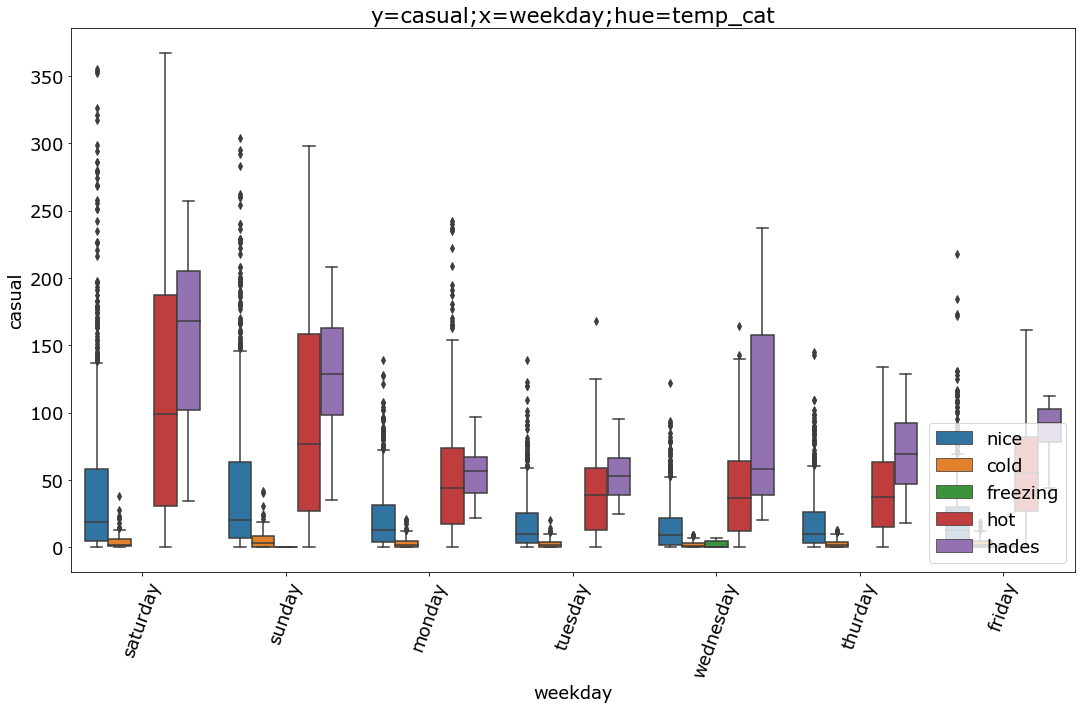

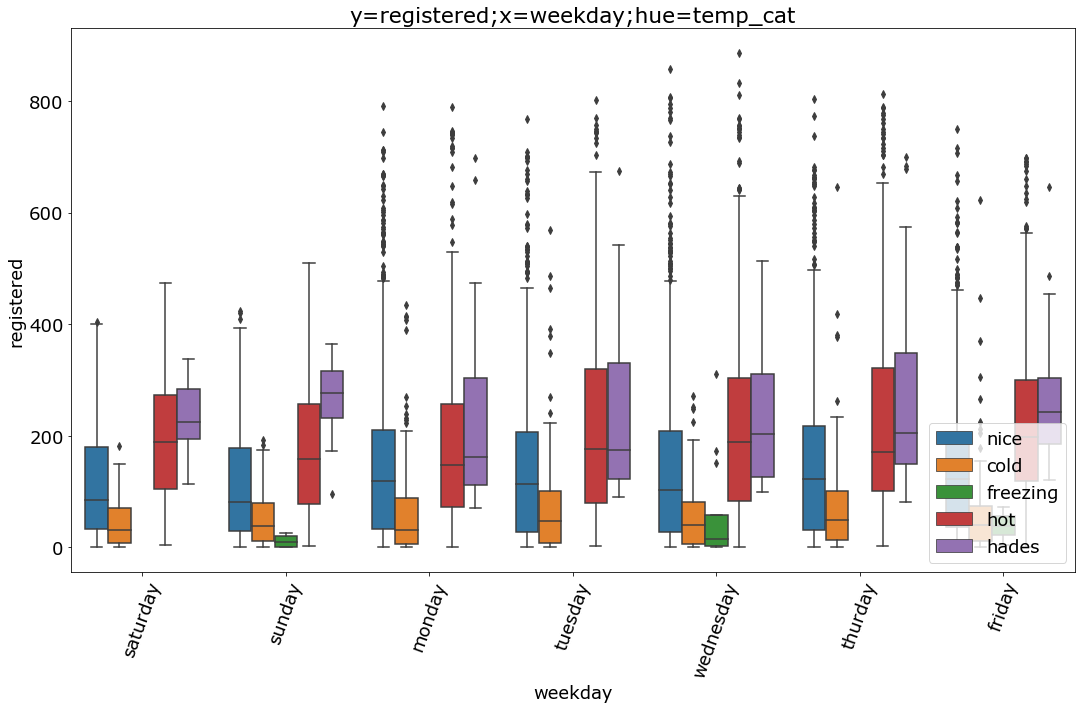

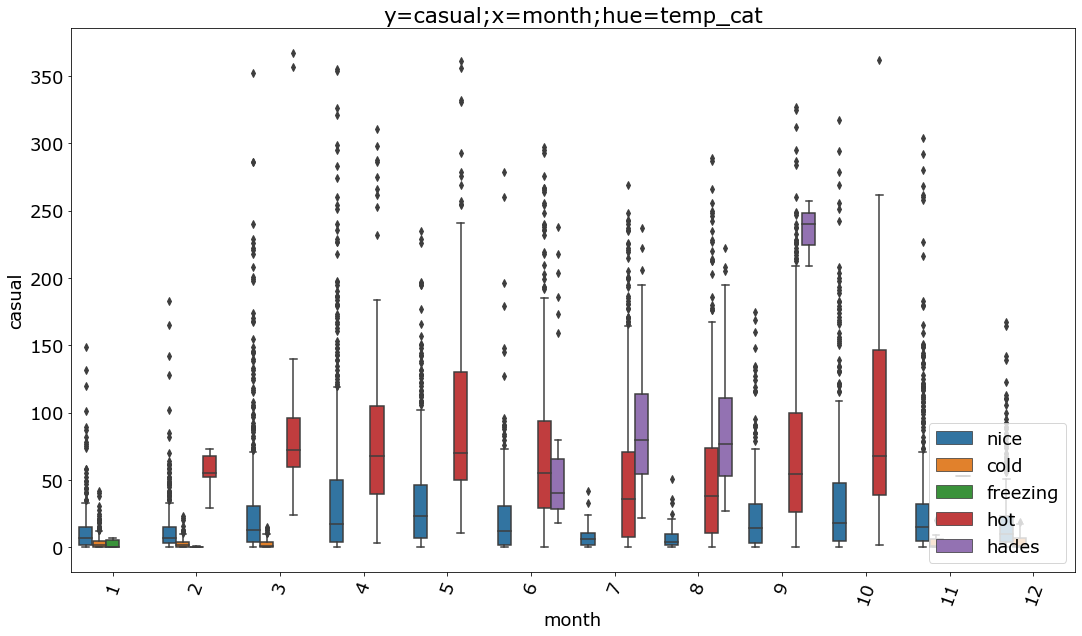

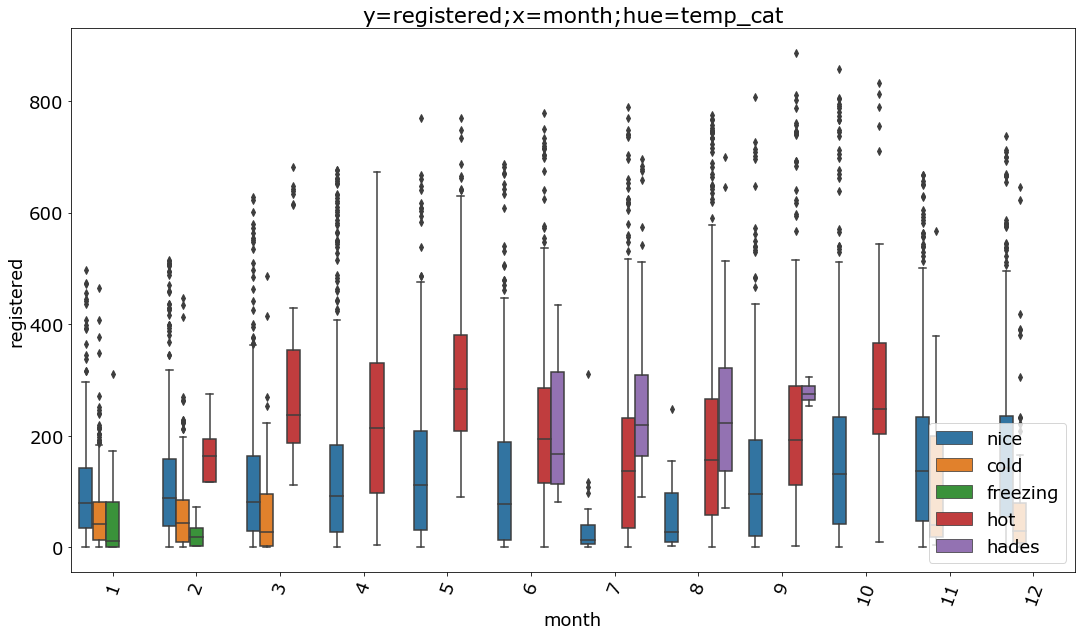

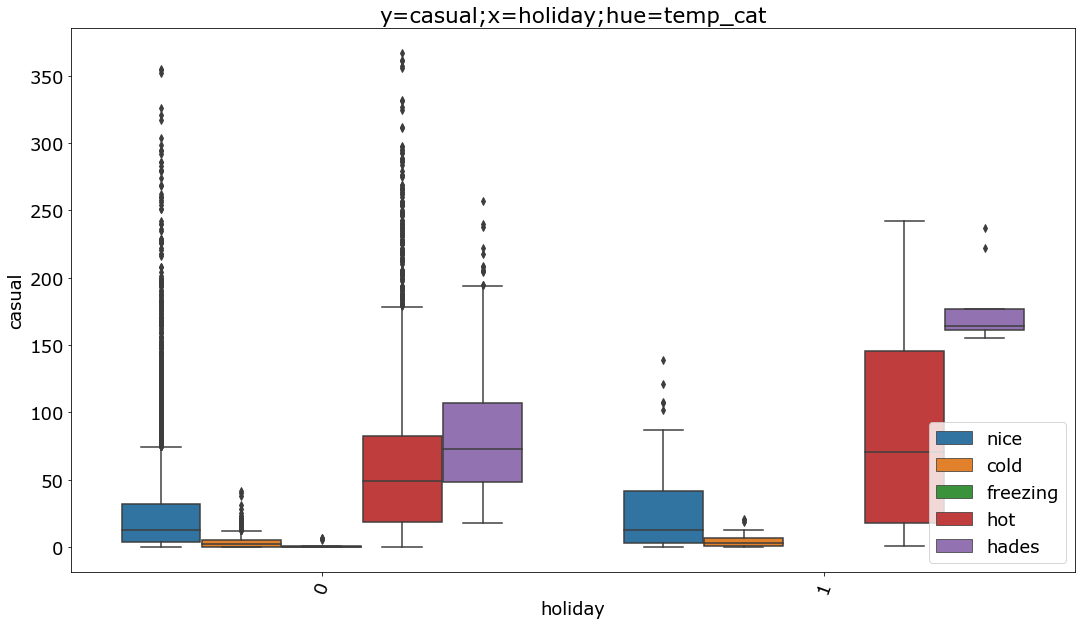

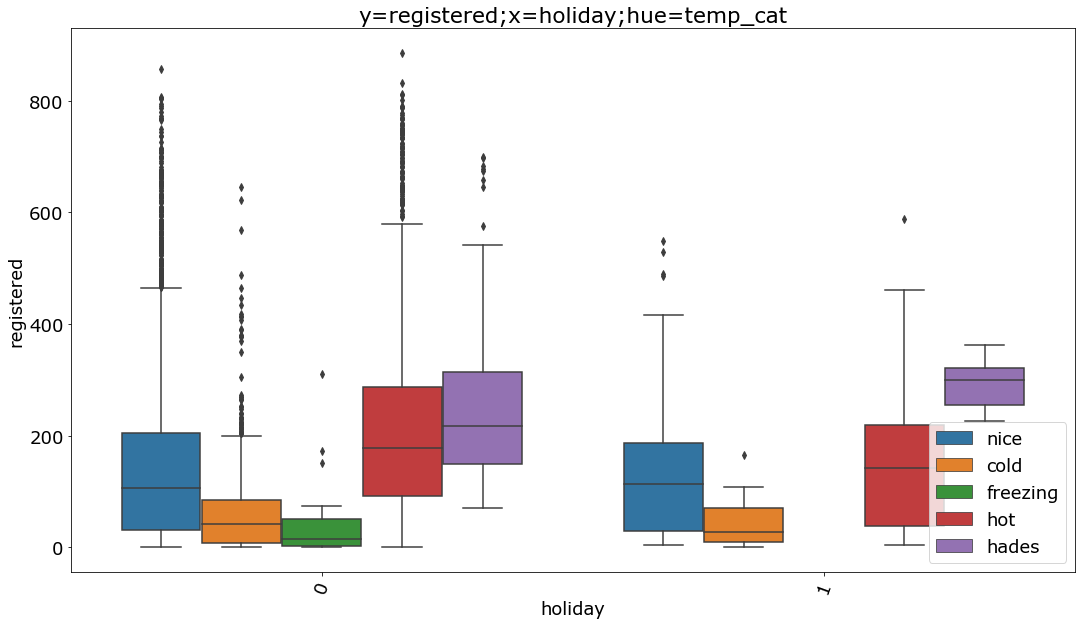

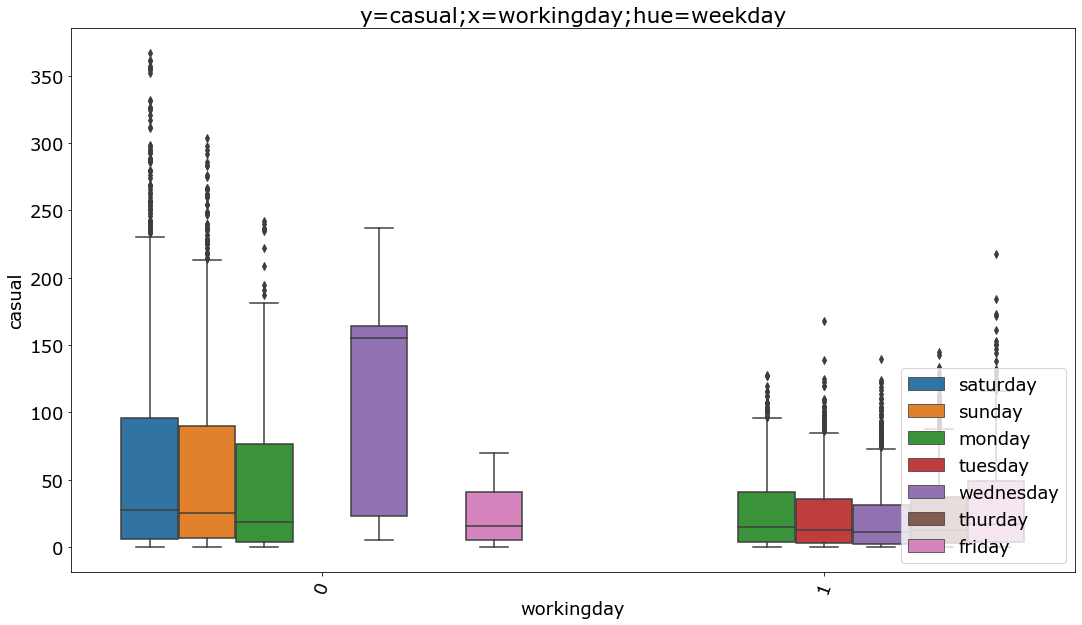

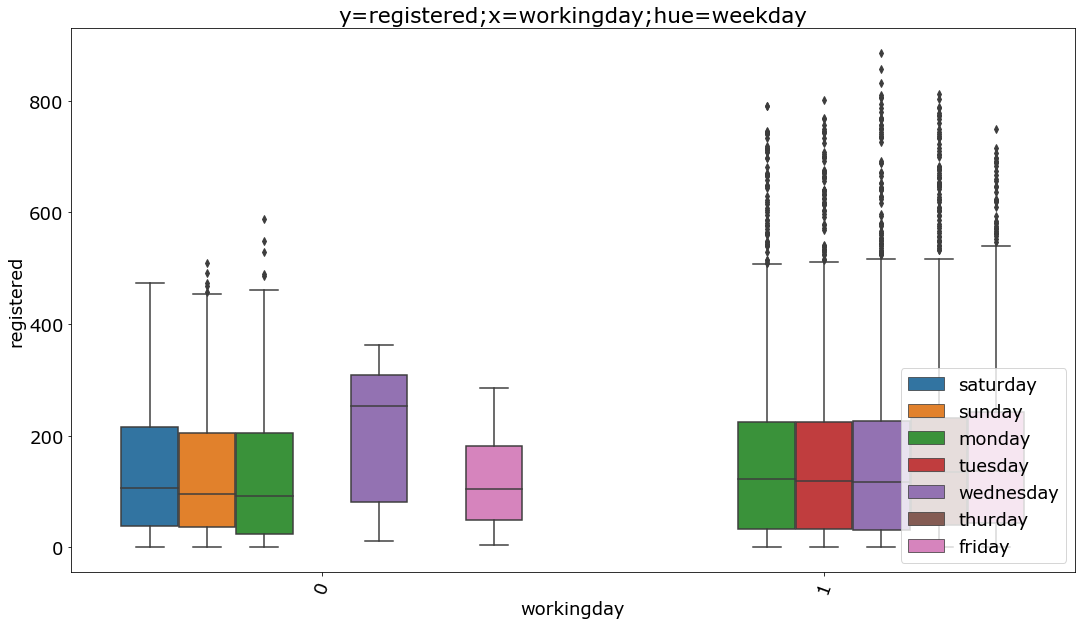

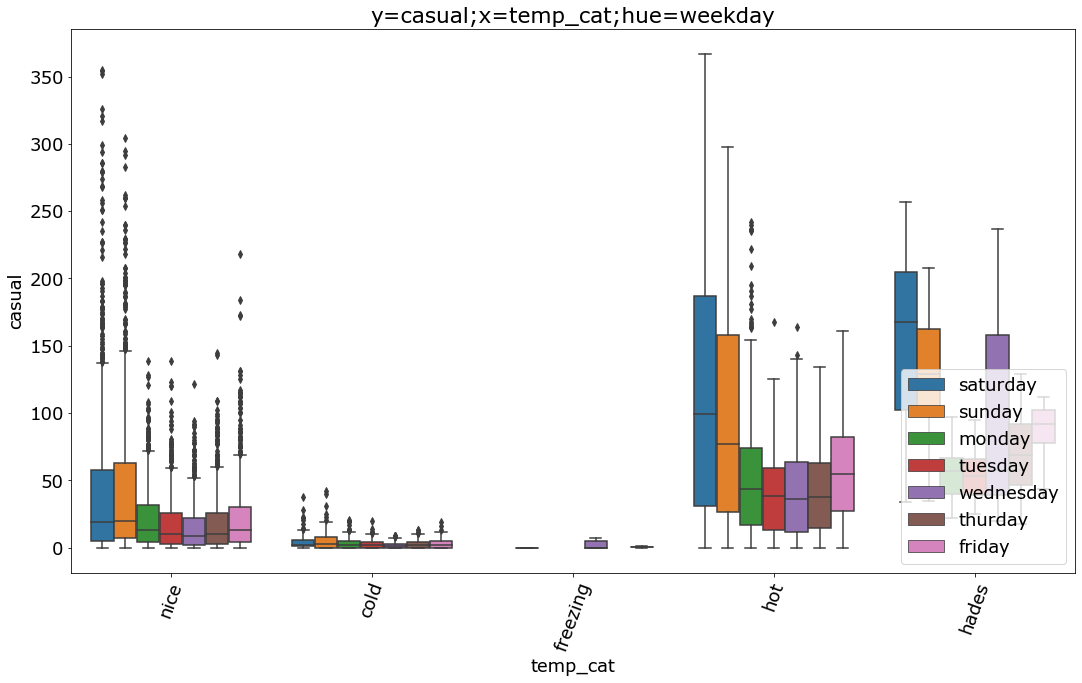

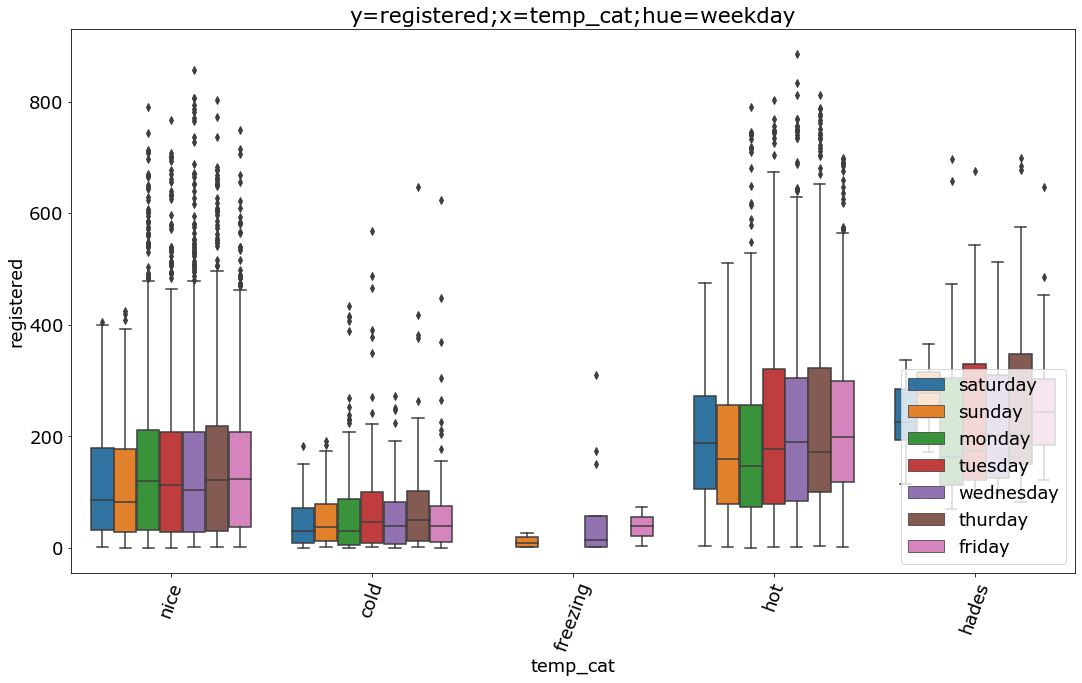

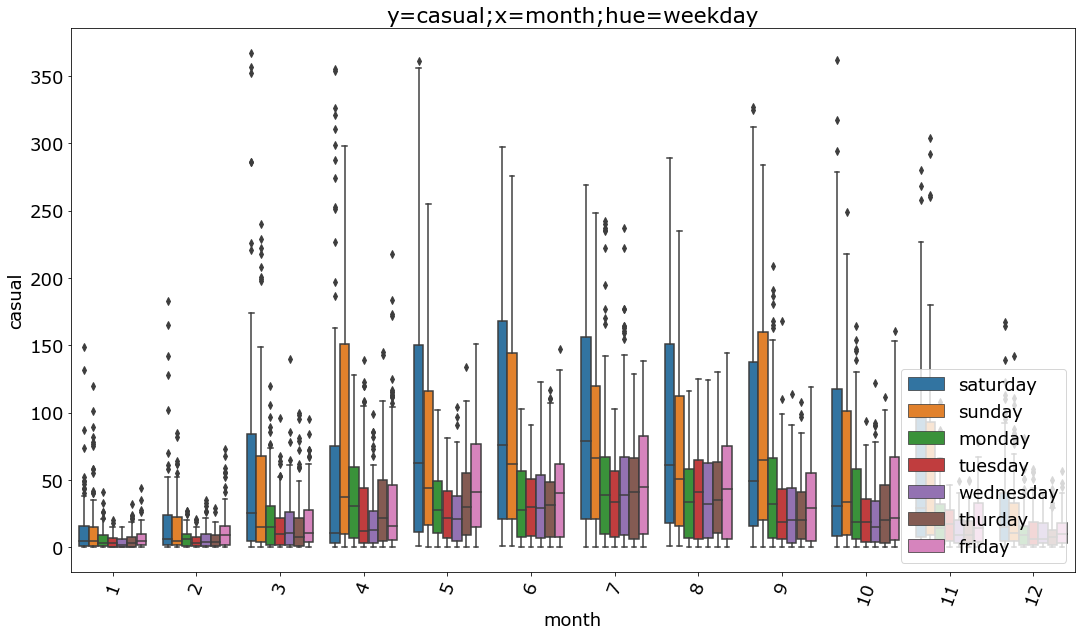

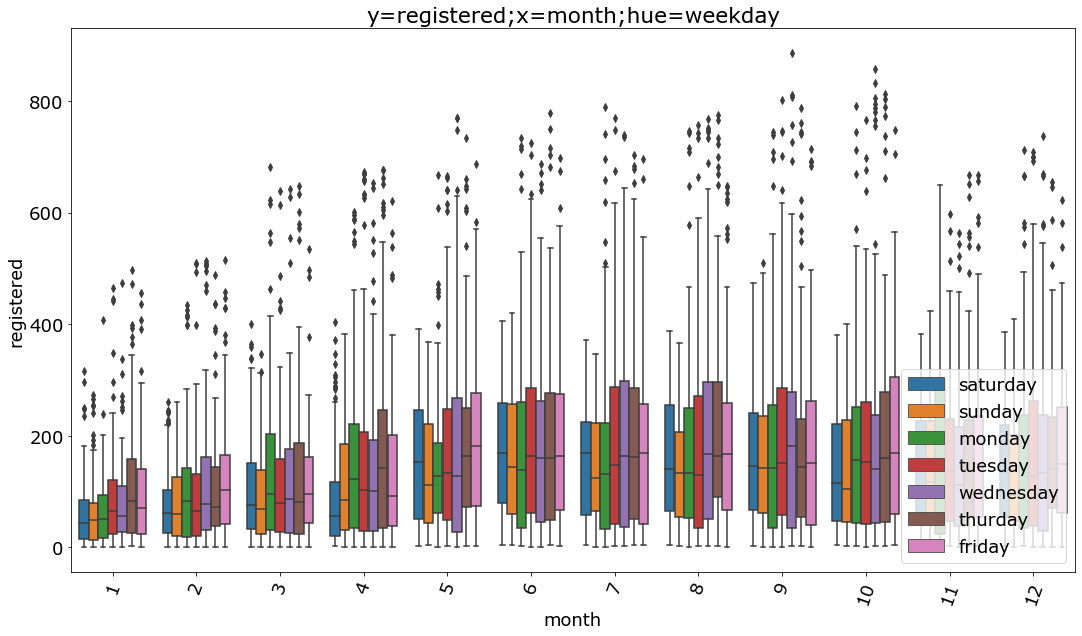

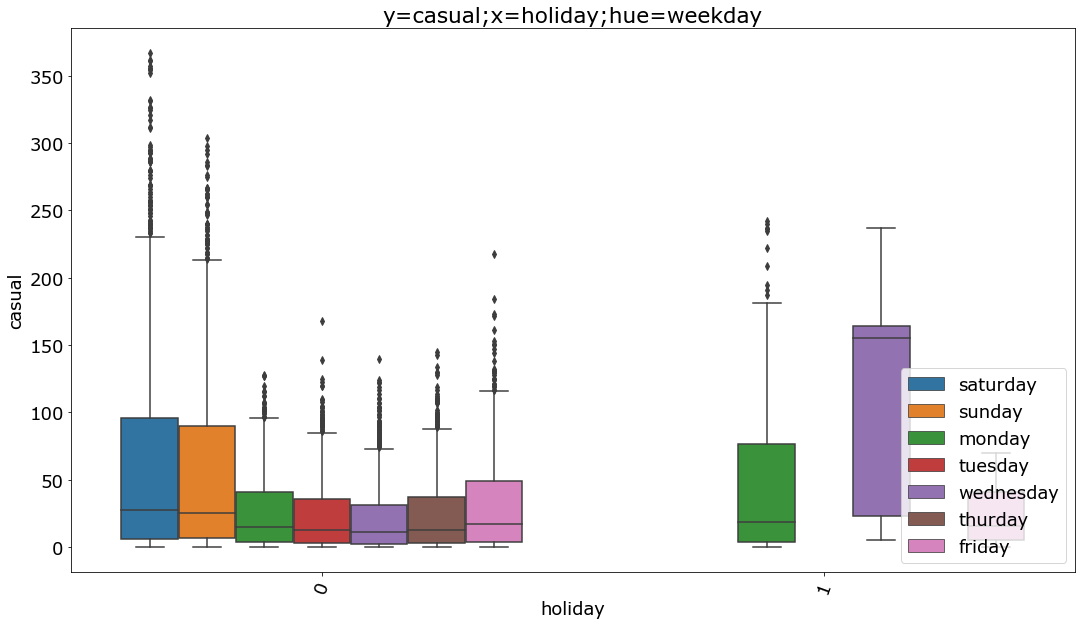

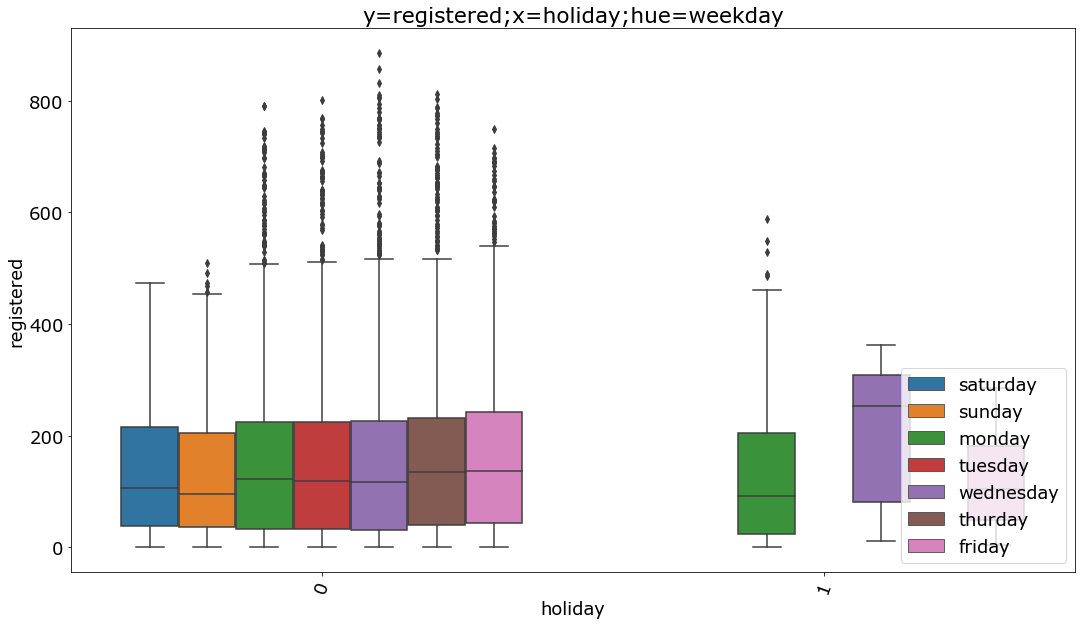

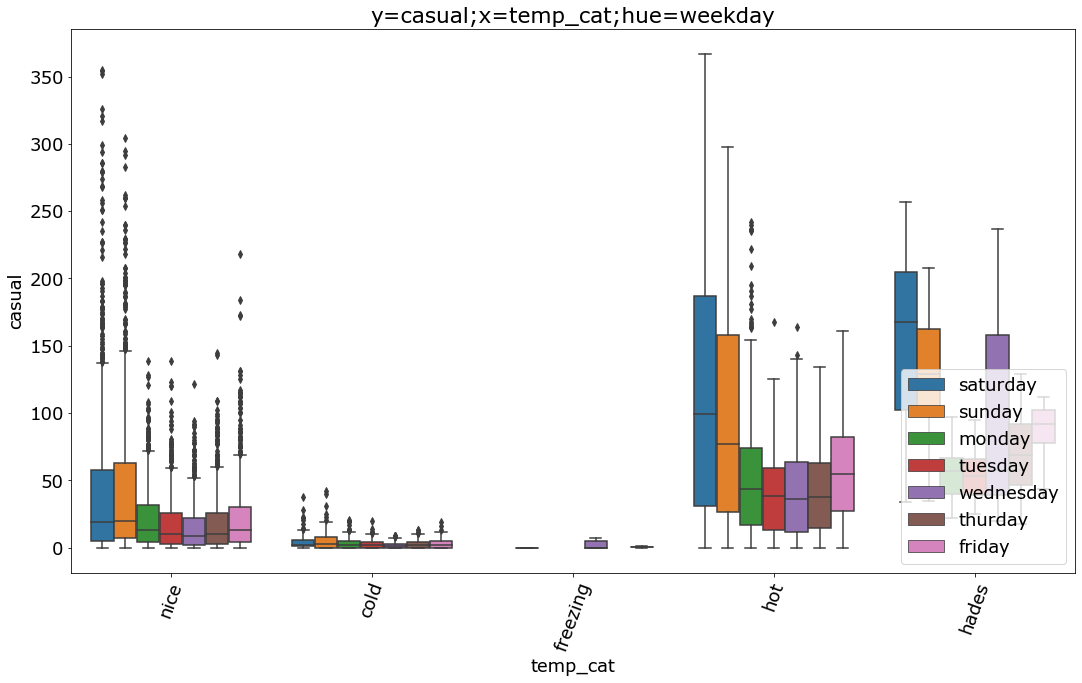

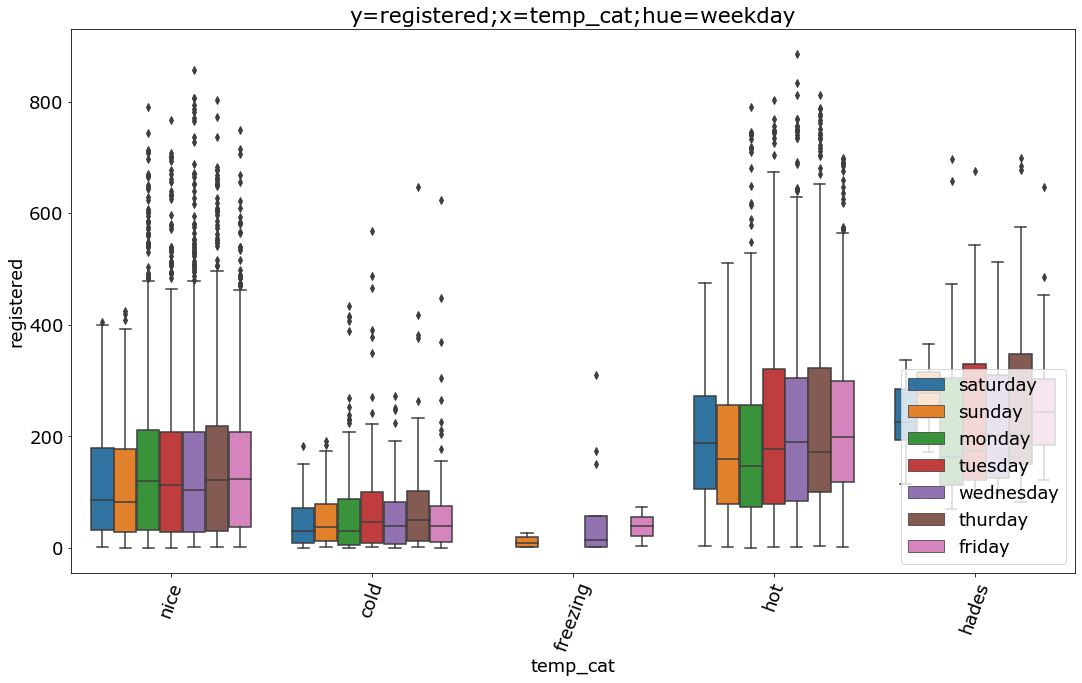

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
from scipy.constants import convert_temperature

def get_datetime(x):
    return datetime.datetime.fromisoformat(x)


season_mapper = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

weekday_mapper = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thurday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
    
}


    
def temp_mapper(temp=None, 
                low=12, 
                high=29):

    if temp is None:
        raise ValueError(f'temp must be a number. got {temp}')

    if temp<low//2:
        return 'freezing'
    elif temp<low:
        return 'cold'
    elif temp>=high*1.33:
        return 'hades'
    elif temp <= high:
        return 'nice'
    else:
        return 'hot'
    
# dx['season'] = [ season_mapper[s] for s in dx.season ]
# dx['year'] = [ str((get_dt(x).year - 2011)%2011+1) for x in dx.datetime ]
# dx['hour'] = [ str(get_dt(x).time().hour) for x in dx.datetime ]
# dx['month'] = [ str(get_dt(x).month) for x in dx.datetime ]
# dx['tempcat'] = list(map(temp_mapper, dx.temp))

# making cyclic time variables hour, weekday, year, month
dts = df['datetime'].copy()
df['hour'] = dts.apply(func= lambda x: get_datetime(x).hour)
df['weekday'] = dts.apply(func= lambda x: get_datetime(x).weekday())
df['weekday'] = df.weekday.apply(func=lambda x: weekday_mapper[x])
df['year'] = dts.apply(func= lambda x: (get_datetime(x).year - 2011)%2011+1)
df['month'] = dts.apply(func=lambda x: get_datetime(x).month )
# df['temp_C'] = df.temp
# df['temp_F'] = df.temp.apply(func=lambda x: convert_temperature(x, 'c', 'f'))
df['approx_temp'] = df.temp.apply(func=lambda x: round(x,1))

# temperature categories
low_temp_F, high_temp_F=49,78


df['temp_cat'] = df.temp.apply(func=lambda x : temp_mapper(temp=x,
                                                              low=convert_temperature(low_temp_F,'f','c'),
                                                              high=convert_temperature(high_temp_F,'f','c'))
                                 )
df['season'] = df.season.apply(func=lambda x: season_mapper[x])



def format_title(**kwargs):
    return ';'.join([ f'{k}={v}' for k,v in kwargs.items() ])
    
def do_plot(x,y,hue):
    dx=df.copy()
    make_big()
    sns.boxplot(x=dx[x],y=dx[y],hue=dx[hue])
    plt.xticks(rotation=70)
    plt.title(format_title(y=y, x=x, hue=hue))
    plt.legend(loc=4)
    plt.show()

    

hues = ['hour','temp_cat', 'weekday']
xs = ['workingday','weekday','temp_cat','month','holiday','temp_cat']



plots = []


for h in hues:
    for x in xs:
        for y in ['casual', 'registered']:
            if h==x:
                continue
            this = {
                'y':y,
                'x':x,
                'hue':h}
            plots.append(this)
[ do_plot(**plots[i]) for i in range(len(plots)) ]

## encoding interactions `weekday*time`,`workday*hour`,`month*year`, etc

Create three new interesting features combining year, month, hour, season

* hr_season
    - the time of sunup, sundown is probably relevant to the impact of time of day on the counts
    - here we encode "{hour},{season}" as a feature

* yr_month
    - the month alone is not as helpful because of the ever increasing popularity of the scooter
    - it is relevant if it is the first or second May, for example
    - here we encode "{year},{month}" as a feature
    
* yr_season
    - likewise, to separate season from the upward popularity, encode "{year},{season}"
    - could also try "{month},{season}" but dont want to overfit for a first pass

In [18]:


dx['hr_season'] = [ str(get_dt(dx.iloc[idx].datetime).time().hour) + ','+str(dx.iloc[idx].season) for idx in range(len(dx))]
dx['yr_month'] = [ str(get_dt(x).year) + ','+str(get_dt(x).month) for x in dx.datetime ]
dx['yr_season'] = [ str(get_dt(dx.iloc[idx].datetime).year) + ','+str(dx.iloc[idx].season) for idx in range(len(dx)) ]

dx['weekday'] = [ weekday_mapper[datetime.datetime.fromisoformat(dx.iloc[idx].datetime).weekday()] for idx in range(len(dx)) ]
dx['yr_season_weekday']= [ row.yr_season+','+str(row.weekday) for idx, row in dx.iterrows() ] 
dx['season_weekday'] = [ ','.join(x.split(',')[1:]) for x in dx.yr_season_weekday ]

dx['hr_weekday'] = [ ','.join(list(map(str,[row.hour,row.weekday]))) for idx, row in dx.iterriows() ]
dx['yr_season_weekday_hr'] = [ row.yr_season_weekday+','+str(row.hour) for idx,row in dx.iterrows() ]

dx['season_weekday_hr'] =  [ ','.join(x.split(',')[1:]) for x in dx['yr_season_weekday_hr'] ]
dx['workday_hr'] = [ ','.join([str(row.workday), str(row.hour)]) for idx, row in dx.iterrows() ]

print(dx[['datetime','year','hour','month','hr_season','yr_month','yr_season', 'weekday']])
print()
print('feature name,','number of disctint values')
print('set of distinct values')
print('='*80)
for time_var in [#'datetime',
                 'season',
                 'year',
                 'hour',
                 'month',
                 'hr_season',
                 'yr_month',
                 'yr_season',
                 'weekday']:
    print()
    print(time_var,len(list(sorted(list(set(dx[time_var]))))))
    print(list(sorted(list(set(dx[time_var])))))

dx=dx.drop(columns='index')

AttributeError: 'DataFrame' object has no attribute 'iterriows'

In [ ]:
# df = pd.read_csv('training_data.csv').drop(columns='Unnamed: 0').reset_index(drop=True)


    

In [ ]:
dx.columns

In [ ]:
# set_fig_size()
# set_font_size(13)
# sns.boxplot(x=
# plt.xticks(rotation=70)

## finding high and low rider counts

In [ ]:

high_cnts = dict()
low_cnts = dict()

for cnt in ['casual', 'registered', 'count']:
    for tolerance in [1,5,10,15,20,30,50,100,200]:
        key = f'{cnt},{tolerance}'
        tol=tolerance
        high_cnts[key] = dx[abs(dx[cnt] - max(dx[cnt])) <= tol ]
        low_cnts[key] = dx[abs(dx[cnt] - min(dx[cnt])) <= tol ]
#dx[abs(df.temp - max(df.temp)) <= 5 ]

In [ ]:
from pprint import pprint
pprint({ key:len(val) for key, val in high_cnts.items() })
pprint({ key:len(val) for key, val in low_cnts.items() })


In [ ]:
len(set(dx.yr_season_weekday))

In [ ]:
d0 = dx[dx.yr_month.str.startswith('2011')]
d1 = dx[dx.yr_month.str.startswith('2012')]

# sns.boxplot(data=d1[['casual','registered']])

used = []

def format_title(**kwargs):
    return ';'.join([ f'{k}={v}' for k,v in kwargs.items() ])
    
def do_plot(x,y,hue):
    make_big()
    sns.boxplot(x=dx[x],y=dx[y],hue=dx[hue])
    plt.xticks(rotation=70)
    plt.title(format_title(y=y, x=x, hue=hue))
    plt.show()


dep_vars = ['casual','registered']
indep_vars = ['hour','weekday','month','season','year','workingday','weekday','holiday']
time_vars = ['
hue_vars = xvars[:len(xvars)//2]+xvars[len(xvars)//2:]

print(len(xvars),len(x2vars))


for hue in xvars:
    for x in x2vars:
        for y in ['casual','registered']:
            # used.append({y,x,hue})
            print(len(used))
            opt1 = {'y':y,
                    'x':x,
                    'hue':hue}
            
            opt2 = {'y':y,
                    'x':opt1['hue'],
                    'hue': opt1['x']}
            
            
            
            for this in [opt1,opt2]:
               
                if this in used:
                    continue
                    
                used.append(this)
                do_plot(**this)


# make_big()
# sns.boxplot(x=dx.workingday,y=dx.casual,hue=dx.hour)


In [ ]:
o1 = {'a':2,'b':1,'c':0}
o2 = {'a':2, 'b':o1['c'], 'c':o1['b']}

u = []

u.append(o1)
u.append(o2)

{'a':2,'b':o1['c'],'c':o1['b']} in u

In [ ]:
dx[

In [ ]:
sns.boxplot?

In [ ]:
dx[abs(dx.temp - max(dx.temp)) <= 5 ]

In [ ]:
dd = dx.copy()
dd['year_'] = [ x.split(',')[0] for x in dd.yr_season ]
dw = dd[dd.workingday==1]
dn = dd[dd.workingday==0]

for year in ['2011','2012']:
    for Y in ['registered','casual']:
        for workingday in ['0','1']:
            if workingday=='1':
                working='working'
                d=dw
            else:
                working='not working'
                d=dn
            sns.boxplot(y=Y,x='yr_season',data=d[d.year_==year])
            
            #sns.boxplot(y='casual',x='yr_season',data=dd[dd.year_==year])
            plt.title(f'{Y}, {year}, {working}')
            plt.show()

sns.boxplot(y='casual',x='yr_season',data=dd)

In [ ]:
dd[dd.year_=='2011'].describe().T

In [ ]:
dd[dd.year_=='2012'].describe().T

### break up into dataframes for continuous/categorical X, y

* Y data:
    - all continuous
    - columns: `['casual', 'registered', 'count']`
    - name: `d_y`
    - name of scaled data: `d_ycont_scaled`
    - scaler: `x_cont_scaler`

* X_data
    - continuous:
        - columns: `['temp', 'humidity', 'windspeed']`
        - name: `d_xcont`
        - name of scaled data: `d_xcont_scaled`
        - scaler: `y_cont_scaler`
 
    - categorical:
    
        - columns: `['holiday', 'workingday', 'weather', 'hr_season', 'yr_month', 'yr_season']`
        - name: `d_xcat`

In [ ]:
# all columns:
#          [ #'datetime', 
#           #'season', 
#           'holiday', 
#           'workingday', 
#           'weather', 
#           #'temp',
#           #'humidity', 
#           #'windspeed', 
#           #'casual', 
#           #'registered', 
#           #'count', 
#           'year', 
#           'hr',
#           'month', 
#           'hr_season', 
#           'yr_month', 
#           'yr_season', 
#           'hour']

dx = dx.reset_index(drop=True)

y_vars = [
        'casual', 
        'registered', 
        'count']

x_continuous = [
        'temp',
        'humidity',
        'windspeed']

drop_timevars = [
        'datetime',
        'index',
        'season',
        'year',
        'hour',
        'month']

x_categorical = [ col for col in dx.columns if col not in y_vars+x_continuous+drop_timevars ] 

print('Y:', y_vars)
print('X_cont:', x_continuous)
print('X_cat:', x_categorical)
print('All:', dx.columns)

d_y = dx[y_vars]
d_xcat = dx[x_categorical]
d_xcont = dx[x_continuous]



### examime

In [ ]:
d_xcat

## use MinMaxScaler() on the x_continuous, and Y data

### X scaler:

* X continuous data: `d_xcont`
* scaler: `x_cont_scaler`
* transformed data: `d_xcont_scaled`

### Y scaler:
* y data: `d_y`
* scaler: `y_cont_scaler`
* transformed data: `d_ycont_scaled`

### Apply MinMaxScaler to continuous X

In [ ]:
x_cont_scaler = MinMaxScaler()
x_cont_scaled = x_cont_scaler.fit_transform(d_xcont.to_numpy())
d_xcont_scaled = pd.DataFrame(columns=d_xcont.columns,
                              data=x_cont_scaled)

d_xcont_scaled

### checking the inverse transform

In [ ]:
pd.DataFrame(columns=d_xcont_scaled.columns,
             data=x_cont_scaler.inverse_transform(d_xcont_scaled.to_numpy()))

In [ ]:
d_xcont

### apply MinMaxScaler to Y

In [ ]:
d_y

In [ ]:
y_cont_scaler = MinMaxScaler()
y_cont_scaled = x_cont_scaler.fit_transform(d_y.to_numpy())
d_ycont_scaled = pd.DataFrame(columns=d_y.columns,
                              data=y_cont_scaled)

d_ycont_scaled

### Vectorize categories

In [ ]:


def get_dict_vectorized(data, sparse=False, filter_data=False):
    if filter_data:
        data = data[filter_data]
    return DictVectorizer(sparse=sparse).fit_transform(data.to_dict('records'))

# cats = [ #'datetime', 
#           #'season', 
#           'holiday', 
#           'workingday', 
#           'weather', 
#           #'temp',
#           #'humidity', 
#           #'windspeed', 
#           #'casual', 
#           #'registered', 
#           #'count', 
#           'year', 
#           'hr',
#           'month', 
#           'hr_season', 
#           'yr_month', 
#           'yr_season', 
#           'hour']

# this function also works
def get_dummies(data, drop_first=False, filter_data=False):
    if filter_data:
        data = data[filter_data]
    return pd.get_dummies(data, drop_first=drop_first)



In [ ]:
get_dict_vectorized(d_xcat)

In [ ]:
get_dict_vectorized(d_xcat).shape==get_dummies(d_xcat).shape

In [ ]:
d_xcat

In [ ]:
# for colname in d_xcat.columns:
#     print(colname, Counter(d_xcat[colname]))

In [ ]:
# dtest = pd.read_csv('test_data.csv').drop(columns='Unnamed: 0').sort_values(by='datetime').reset_index(drop=True)

# dtest

### run models

In [ ]:
from collections import Counter
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LogisticRegressionCV, LassoCV
from sklearn.svm import SVR



# import warnings
# warnings.filterwarnings('ignore')


def read_input(infile):    
    return pd.read_csv(infile).drop(columns='Unnamed: 0').sort_values(by='datetime').reset_index(drop=True)


def process_input(infile, 
                  kind='train',
                  verbose=False):
    print('Processing:', infile, 'kind:', kind, 'filename:', infile)
                                  
    if kind not in ('train', 'test'):
        raise ValueError(f'kind must be set to either "train" or "test"; got {kind}')
        
    
    def get_dt(dt):
        return datetime.datetime.fromisoformat(dt)

    data = read_input(infile)
    dd = data.drop(columns='atemp')
    dx = dd.copy()

    # print
    dx['year'] = [ str((get_dt(x).year - 2011)%2011+1) for x in dx.datetime ]
    dx['hour'] = [ str(get_dt(x).time().hour) for x in dx.datetime ]
    dx['month'] = [ str(get_dt(x).month) for x in dx.datetime ]
    dx['hr_season'] = [ str(get_dt(dx.iloc[idx].datetime).time().hour) + ','+str(dx.iloc[idx].season) for idx in range(len(dx))]
    dx['yr_month'] = [ str(get_dt(x).year) + ','+str(get_dt(x).month) for x in dx.datetime ]
    dx['yr_season'] = [ str(get_dt(dx.iloc[idx].datetime).year) + ','+str(dd.iloc[idx].season) for idx in range(len(dx)) ]

    if verbose:
        print(dx[['datetime','year','hour','month','hr_season','yr_month','yr_season']])
        print()
        print('feature name,','number of disctint values')
        print('set of distinct values')
        print('='*80)
        for time_var in [#'datetime',
                         'season',
                         'year',
                         'hour',
                         'month',
                         'hr_season',
                         'yr_month',
                         'yr_season']:
            print()
            print(time_var,len(list(sorted(list(set(dx[time_var]))))))
            print(list(sorted(list(set(dx[time_var])))))

        
        # all columns:
    #          [ #'datetime', 
    #           #'season', 
    #           'holiday', 
    #           'workingday', 
    #           'weather', 
    #           #'temp',
    #           #'humidity', 
    #           #'windspeed', 
    #           #'casual', 
    #           #'registered', 
    #           #'count', 
    #           'year', 
    #           'hr',
    #           'month', 
    #           'hr_season', 
    #           'yr_month', 
    #           'yr_season', 
    #           'hour']

    dx = dx.reset_index(drop=True)

    # print('HEY!',dx.columns)
    if kind == 'train':
        y_vars = [
            'casual', 
            'registered', 
            'count']
    elif kind == 'test':
        y_vars = []

    x_continuous = [
            'temp',
            'humidity',
            'windspeed']

    drop_timevars = [
            'datetime',
            'index',
            'season',
            'year',
            'hour',
            'month']

    x_categorical = [ col for col in dx.columns if col not in y_vars+x_continuous+drop_timevars ] 

    if verbose:
        print('Y:', y_vars)
        print('X_cont:', x_continuous)
        print('X_cat:', x_categorical)
        print('All:', dx.columns)

    d_y = dx[y_vars]
    d_xcat = dx[x_categorical]
    d_xcont = dx[x_continuous]

    
    print('kind:', kind)
    if kind == 'train':
        verbose and print('return d_y, d_xcat, d_xcont')
        return d_y, d_xcat, d_xcont
    else:
        verbose and print('return d_xcat, d_xcont')
        return d_xcat, d_xcont

    
def copy_columns(to_=None, from_=None):
    
    _to, _from= to_.copy(),from_.copy()
    
    if to_ is None:
        raise ValueError(f'Set to_ to a destination DataFrame. Got {to_}')
    elif from_ is None:
        raise ValueError(f'Set from_ to a source DataFrame. Got {from_}')
    
    for colname in from_.columns:
        _to[colname] = from_[colname]
        
    return _to


def get_vectorized(data,
                   sparse=False,
                   filter_data=False):
    if filter_data:
        data = data[filter_data]
        
    v = DictVectorizer(sparse=sparse)
    return v, v.fit_transform(data.to_dict('records'))


def get_minmax_scaled(data:pd.DataFrame):
    data = data.copy()
    scaler = MinMaxScaler()
    return scaler, pd.DataFrame(columns = data.columns,
                 data = scaler.fit_transform(data.to_numpy()))


def get_x_train(infile='training_data.csv'):
    '''
    def get_x_train(inp='training_data.csv')->np.array
    '''
    train_y, train_xcat, train_xcont = process_input(infile=infile,
                                                     kind='train')
    vectorizer,xvectorized = get_vectorized(train_xcat)
    scaler, xscaled = get_minmax_scaled(data=train_xcont)
    return np.concatenate((xvectorized, xscaled), 
                          axis=1)

def get_x_test(infile='test_data.csv'):
    test_xcat, test_xcont = process_input('test_data.csv',
                                      kind='test')
    vectorizer,xvectorized = get_vectorized(test_xcat)
    scaler, xscaled = get_minmax_scaled(data=test_xcont)
    return np.concatenate((xvectorized, xscaled), 
                          axis=1)
    

def get_y_train(infile='training_data.csv',
                minmaxscale=False):
    
    train_y, train_xcat, train_xcont = process_input(infile=infile,
                                                     kind='train')
    return train_y

# def merge_cat_cont_inputs(cat, cont):
#     out = pd.DataFrame(columns = list(cat.columns)+list(cont.columns))
#     out = copy_columns(to_=X_TRAIN, from_=train_xcat)
#     out = copy_columns(to_=X_TRAIN, from_=train_xcont)
#     return out




In [ ]:
X_TRAIN = get_x_train()
Y_TRAIN = get_y_train()
print(X_TRAIN.shape)
print(Y_TRAIN.shape)

X_TEST = get_x_test()
print(X_TEST.shape)

In [ ]:
Y_TRAIN.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV

yscaler, y = get_minmax_scaled(Y_TRAIN)
X = X_TRAIN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import sys

models = {
    'ridge': RidgeCV, 
   # 'logistic': LogisticRegressionCV,
    'lasso': MultiTaskLassoCV,
    'svm lin': LinearSVR,
    'svm': SVR,
    'elasticnet': MultiTaskElasticNetCV
}

predictors = y_test.columns

outputs,model_outputs = [],dict()


for predictor in list(predictors)+['all']:
    if predictor == 'all':
        y_tr = y_train
    else:
        y_tr = y_train[predictor]
        
    for modelname, m in models.items():
        model = m()
        if predictor != 'all':
            if modelname == 'lasso':
                model = LassoCV()
            elif modelname == 'elasticnet':
                model = ElasticNetCV()
            y_true = y_test[predictor]
        else:
            y_true = y_test
        # y_tr = y_train[predictor]
        print(predictor, modelname, model)
        
        if predictor == 'lasso,all':
            continue
        try:
            model.fit(X_train, y_tr)
            y_pred = model.predict(X_test)

            ys = y_true, y_pred
            e1,e2,e3 = mean_absolute_error(*ys), mean_absolute_percentage_error(*ys), mean_squared_error(*ys)

            label = modelname+','+predictor
            
            this_output = {'label': label,
                           'modelname': modelname,
                           'model': model,
                           'predictor': predictor,
                           'strmodel': str(model),
                           'coefs': coefs,
                           'mean_absolute_error': float(e1),
                           'mean_absolute_percentage_error': float(e2),
                           'mean_squared_error': float(e3),
                           'y_true': y_true,
                           'y_pred': y_pred,
                           'error': ''}

            # raw_model_outputs[modelname+','+predictor] = (results)
            model_outputs[label] = this_output
            outputs.append(this_output)
            
            print(this_output)
#             print(*results)
        except:
            print(sys.exc_info())
            keys_ = ['modelname',
                     'model',
                     'predictor',
                     'strmodel',
                     'coefs',
                     'mean_absolute_error',
                     'mean_absolute_percentage_error',
                     'mean_squared_error',
                     'y_true',
                     'y_pred',
                     'error']
            this_output = { _:np.nan for _ in keys_ }
            this_output['error'] = str(sys.exc_info())
            model_outputs[label] = this_output

In [ ]:
dm = pd.DataFrame.from_records(model_outputs).T

dm['rms_error'] = [ np.power(x,1/2) for x in dm.mean_squared_error ]
dm = dm[~pd.isnull(dm.rms_error)]
errors = dm[['model','rms_error', 'mean_absolute_error','mean_squared_error']]

# dmm[['model','rms_error']]

In [ ]:
e_cols = ['rms_error']


for pred in set(dm.predictor):
    print()
    print('='*80)
    print(pred)
    print('='*80)
    


    dmm = dm[dm.predictor==pred]

    print('Min errors')
    e_min = dmm[['rms_error','modelname']].groupby(['modelname']).min('rms_error')
    print(e_min)
    print()

    print('Max errors')
    e_max = dmm[['predictor','rms_error','modelname']].groupby(['modelname']).max('rms_error')
    print(e_max)

In [ ]:

for m in dm.modelname:
    print(m,dm[dm.modelname==m].rms_error)

In [ ]:
SVR?

In [ ]:
len(dm[~pd.isnull(dm.rms_error)])

In [ ]:
for pred in ['casual','registered','count']:

    print(pred,dat[pred][['model','rms_error']])
    print()
    
    
    
modelname in dm.modelname:

    print(pred,dat[pred][['model','rms_error']])
    print()

In [ ]:
from sklearn.linear_model import MultiTaskElasticNetCV, ElasticNetCV

model = MultiTaskElasticNetCV()

model.fit(X_train, y_train)



In [ ]:
dm.mean_squred_error

In [ ]:
dm = pd.DataFrame.from_records(model_outputs).T
dm.fillna(10000)
# for idx, row in dm.iterrows():
#     try:
#         rms_error = float(row.mean_squared_error)
#         dm.at[idx, 'rms'] = np.sqrt(rms_error)
#     except:
#         print(sys.exc_info())
#         dm.at[idx, 'rms'] = np.inf

In [ ]:
dmm = dm[dm.predictor!='count']

In [ ]:
dr = dmm[dmm.predictor=='registered']
dc = dmm[dmm.predictor=='casual']

dr

In [512]:
# keys = list(model_outputs.keys())

# outs = [ model_outputs[k]['mean_absolute_error'] for i,k in enumerate(keys) ]

array([0.42481786, 0.30522318, 0.3040944 , 0.77597881, 0.15927526])

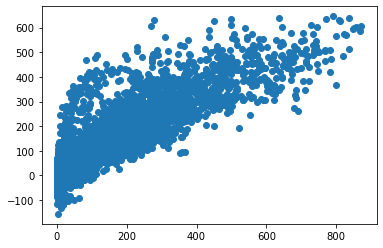

In [33]:
model = RidgeCV()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, mean_absolute_error

mean_absolute_error(y_test, y_pred)

plt.scatter(y_test, y_pred)

In [357]:
train_y, train_xcat, train_xcont = process_input('training_data.csv',
                                                kind='train')

test_xcat, test_xcont = process_input('test_data.csv',
                                      kind='test')

print(train_xcat.head())
print(train_xcont.head())
print(train_y.head())
print(test_xcat.head())
print(test_xcont.head())

Processing: training_data.csv kind: train filename: training_data.csv
HHEY! Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
                 datetime year hour month hr_season yr_month yr_season
0     2011-01-01 00:00:00    1    0     1       0,1   2011,1    2011,1
1     2011-01-01 04:00:00    1    4     1       4,1   2011,1    2011,1
2     2011-01-01 06:00:00    1    6     1       6,1   2011,1    2011,1
3     2011-01-01 07:00:00    1    7     1       7,1   2011,1    2011,1
4     2011-01-01 08:00:00    1    8     1       8,1   2011,1    2011,1
...                   ...  ...  ...   ...       ...      ...       ...
8703  2012-12-19 18:00:00    2   18    12      18,4  2012,12    2012,4
8704  2012-12-19 19:00:00    2   19    12      19,4  2012,12    2012,4
8705  2012-12-19 20:00:00    2   20    12      20,4  2012,12    2012,4
8706  2012-12-19 21:00:00    2   21    12      21,4  

array([[0.        , 1.        , 0.        , ..., 0.2244898 , 0.81      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2244898 , 0.75      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.20408163, 0.8       ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.34693878, 0.57      ,
        0.26319502],
       [0.        , 0.        , 0.        , ..., 0.32653061, 0.61      ,
        0.26319502],
       [0.        , 0.        , 0.        , ..., 0.32653061, 0.61      ,
        0.10532503]])

True

In [404]:
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. note::
        The ``like`` keyword is an experimental feature pending on
        acceptance of :ref:`NEP 35 <NEP35>`.

    .. ve

In [365]:
def get_minmax_scaled(data=train_xcont):
    data = data.copy()
    scaler = MinMaxScaler()
    return scaler, pd.DataFrame(columns = data.columns,
                 data = s.fit_transform(data.to_numpy()))

In [350]:
contcols = list(train_xcont.columns)
d = get_dummies(train_x)
catcols = [ c for c in d.columns if c not in contcols ] 
newcols = catcols+contcols
d = d[newcols]
d=d.astype(float)
scaler, d = get_min_max_scaled(d)



TypeError: float() argument must be a string or a number, not 'method'

In [347]:
pd.DataFrame(columns=

array([[0.        , 0.        , 0.        , ..., 0.2244898 , 0.81      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2244898 , 0.75      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.20408163, 0.8       ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.34693878, 0.57      ,
        0.26319502],
       [0.        , 1.        , 0.        , ..., 0.32653061, 0.61      ,
        0.26319502],
       [0.        , 1.        , 0.        , ..., 0.32653061, 0.61      ,
        0.10532503]])

In [269]:
train_x = pd.DataFrame()
train_x = copy_columns(to_=train_x, from_=train_xcat)
train_x = copy_columns(to_=train_x, from_=train_xcont)

train_x


holiday  workingday  weather hr_season yr_month yr_season   temp  \
0           0           0        1       0,1   2011,1    2011,1   9.84   
1           0           0        1       4,1   2011,1    2011,1   9.84   
2           0           0        1       6,1   2011,1    2011,1   9.02   
3           0           0        1       7,1   2011,1    2011,1   8.20   
4           0           0        1       8,1   2011,1    2011,1   9.84   
...       ...         ...      ...       ...      ...       ...    ...   
8703        0           1        1      18,4  2012,12    2012,4  15.58   
8704        0           1        1      19,4  2012,12    2012,4  15.58   
8705        0           1        1      20,4  2012,12    2012,4  14.76   
8706        0           1        1      21,4  2012,12    2012,4  13.94   
8707        0           1        1      22,4  2012,12    2012,4  13.94   

      humidity  windspeed  
0           81     0.0000  
1           75     0.0000  
2           80     0.0000  
3           86     0.0000  
4           75     0.0000  
...        ...        ...  
8703        50    23.9994  
8704        50    26.0027  
8705        57    15.0013  
8706        61    15.0013  
8707        61     6.0032  

[8708 rows x 9 columns]

In [270]:
x_train_vectorizer, x_train_vectorized = get_vectorized(train_x)

In [273]:
x_train_vectorized

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [215]:
get_vectorized(train_xcat)[66]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [214]:
get_dummies(train_xcat).to_numpy()[66]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

1 1.0
97 0.81
98 0.22448979591836735
102 1.0
126 1.0
